In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table
import os

In [2]:
pd.set_option('display.max_columns', None)


df = pd.read_csv("../../../Datasets/Flows/iomt_flows.csv")

display(df)

/project/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id.orig_h  id.orig_p       id.resp_h  id.resp_p proto service  \
0          10.10.10.252      33540     224.0.0.251       5353   udp     dns   
1          10.10.10.252      50435     224.0.0.251       5353   udp     dns   
2          10.10.10.252      47976     224.0.0.251       5353   udp     dns   
3          10.10.10.252      37995      10.10.10.0        137   udp     dns   
4          10.10.10.252      38680     224.0.0.251       5353   udp     dns   
...                 ...        ...             ...        ...   ...     ...   
4325373    42.32.107.34      32572   148.94.193.65      52545   tcp       -   
4325374    101.16.71.87      24711   140.132.36.68      64950   tcp       -   
4325375  180.167.106.59      42487  233.22.169.101      42090   tcp       -   
4325376  233.188.148.20      60383   198.201.14.75      61891   tcp       -   
4325377     21.95.75.42      35597     79.22.74.54      59677   tcp       -   

        duration orig_bytes resp_bytes conn_state local_orig local_resp  \
0              -          -          -         S0          T          F   
1              -          -          -         S0          T          F   
2              -          -          -         S0          T          F   
3              -          -          -         S0          T          T   
4              -          -          -         S0          T          F   
...          ...        ...        ...        ...        ...        ...   
4325373        -          -          -        OTH          F          F   
4325374        -          -          -        OTH          F          F   
4325375        -          -          -        OTH          F          F   
4325376        -          -          -        OTH          F          F   
4325377        -          -          -        OTH          F          F   

         missed_bytes history  orig_pkts  orig_ip_bytes  resp_pkts  \
0                   0       D          1             73          0   
1                   0       D          1             74          0   
2                   0       D          1             57          0   
3                   0       D          1             78          0   
4                   0       D          1             67          0   
...               ...     ...        ...            ...        ...   
4325373             0       -          0              0          0   
4325374             0       -          0              0          0   
4325375             0       -          0              0          0   
4325376             0       -          0              0          0   
4325377             0       -          0              0          0   

         resp_ip_bytes tunnel_parents  flow_duration  fwd_pkts_tot  \
0                    0              -            0.0             1   
1                    0              -            0.0             1   
2                    0              -            0.0             1   
3                    0              -            0.0             1   
4                    0              -            0.0             1   
...                ...            ...            ...           ...   
4325373              0              -            0.0             1   
4325374              0              -            0.0             1   
4325375              0              -            0.0             1   
4325376              0              -            0.0             1   
4325377              0              -            0.0             1   

         bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
0                   0                  1                  0               0.0   
1                   0                  1                  0               0.0   
2                   0                  1                  0               0.0   
3                   0                  1                  0               0.0   
4                   0                  1                  0               0.0

In [3]:
# Function to Fix Dataframe Mixed Types

def fix_data_mixed_types(df, mixed_columns):    
    # Loop over the mixed columns and clean them
    for col_idx in mixed_columns:
        col_name = df.columns[col_idx]
        dtype_before = df[col_name].dtype
        
        # Convert non-numeric values to NaN and replace with mean
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')
        mean = df[col_name].mean()
        df[col_name].fillna(mean, inplace=True)
        
        dtype_after = df[col_name].dtype
        print(f"[INFO] Before: {dtype_before} | After: {dtype_after}")
        
    return df

In [4]:
# Fix Datatype Issue
fix_data_mixed_types(df, [6, 7, 8])

[INFO] Before: object | After: float64
[INFO] Before: object | After: float64
[INFO] Before: object | After: float64


id.orig_h  id.orig_p       id.resp_h  id.resp_p proto service  \
0          10.10.10.252      33540     224.0.0.251       5353   udp     dns   
1          10.10.10.252      50435     224.0.0.251       5353   udp     dns   
2          10.10.10.252      47976     224.0.0.251       5353   udp     dns   
3          10.10.10.252      37995      10.10.10.0        137   udp     dns   
4          10.10.10.252      38680     224.0.0.251       5353   udp     dns   
...                 ...        ...             ...        ...   ...     ...   
4325373    42.32.107.34      32572   148.94.193.65      52545   tcp       -   
4325374    101.16.71.87      24711   140.132.36.68      64950   tcp       -   
4325375  180.167.106.59      42487  233.22.169.101      42090   tcp       -   
4325376  233.188.148.20      60383   198.201.14.75      61891   tcp       -   
4325377     21.95.75.42      35597     79.22.74.54      59677   tcp       -   

         duration     orig_bytes    resp_bytes conn_state local_orig  \
0        1.162909  114573.222356  40850.366877         S0          T   
1        1.162909  114573.222356  40850.366877         S0          T   
2        1.162909  114573.222356  40850.366877         S0          T   
3        1.162909  114573.222356  40850.366877         S0          T   
4        1.162909  114573.222356  40850.366877         S0          T   
...           ...            ...           ...        ...        ...   
4325373  1.162909  114573.222356  40850.366877        OTH          F   
4325374  1.162909  114573.222356  40850.366877        OTH          F   
4325375  1.162909  114573.222356  40850.366877        OTH          F   
4325376  1.162909  114573.222356  40850.366877        OTH          F   
4325377  1.162909  114573.222356  40850.366877        OTH          F   

        local_resp  missed_bytes history  orig_pkts  orig_ip_bytes  resp_pkts  \
0                F             0       D          1             73          0   
1                F             0       D          1             74          0   
2                F             0       D          1             57          0   
3                T             0       D          1             78          0   
4                F             0       D          1             67          0   
...            ...           ...     ...        ...            ...        ...   
4325373          F             0       -          0              0          0   
4325374          F             0       -          0              0          0   
4325375          F             0       -          0              0          0   
4325376          F             0       -          0              0          0   
4325377          F             0       -          0              0          0   

         resp_ip_bytes tunnel_parents  flow_duration  fwd_pkts_tot  \
0                    0              -            0.0             1   
1                    0              -            0.0             1   
2                    0              -            0.0             1   
3                    0              -            0.0             1   
4                    0              -            0.0             1   
...                ...            ...            ...           ...   
4325373              0              -            0.0             1   
4325374              0              -            0.0             1   
4325375              0              -            0.0             1   
4325376              0              -            0.0             1   
4325377              0              -            0.0             1   

         bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
0                   0                  1                  0               0.0   
1                   0                  1                  0               0.0   
2                   0                  1                  0               0.0   
3                   0                  1                  0   

In [5]:
# Function to save table as an image
def save_table_as_image(table_data, filename, table_scale=1.2, table_head=7):
    table_data_head = table_data.head(table_head)
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('off')
    ax.axis('tight')
    table = ax.table(cellText=table_data_head.values, colLabels=table_data_head.columns, loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(table_scale, table_scale)
    plt.savefig(filename, bbox_inches='tight')

In [6]:
# Group by attack
df.groupby(['traffic'])['traffic'].count().reset_index(name='count').sort_values(['count'], ascending=True)

traffic    count
5        normal      407
3   mqttmalaria     4012
1   arpspoofing     5049
8      slowread    19514
7     slowloris    37851
0  apachekiller    86103
6     rudeadyet   138469
4       netscan  1636587
2   camoverflow  2397386

/project/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


KeyboardInterrupt: 

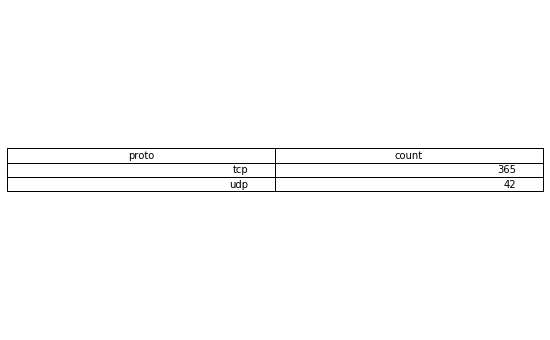

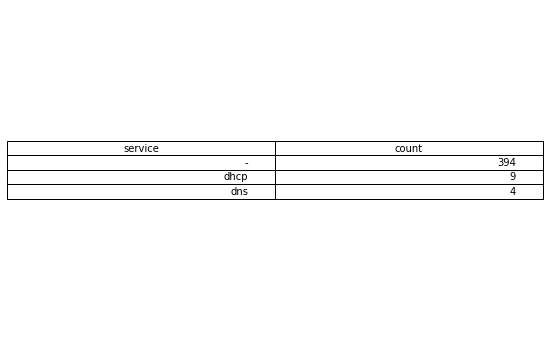

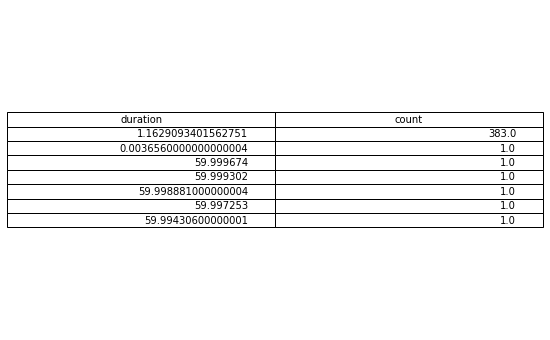

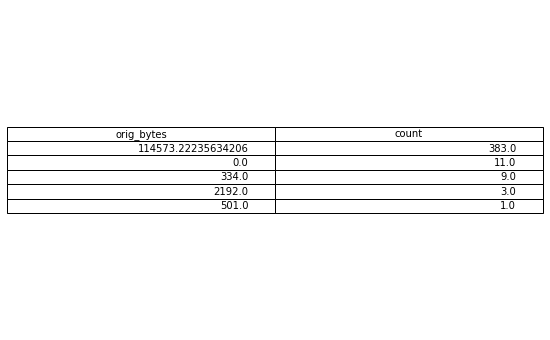

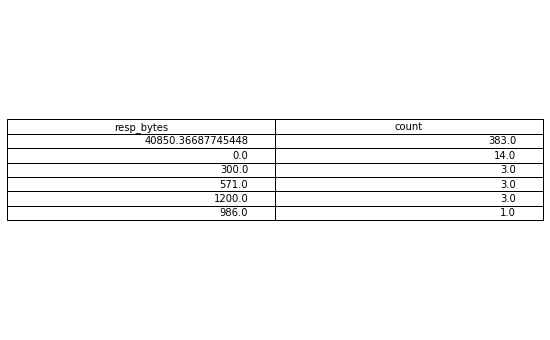

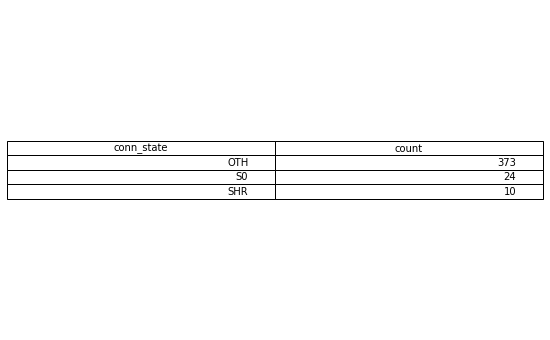

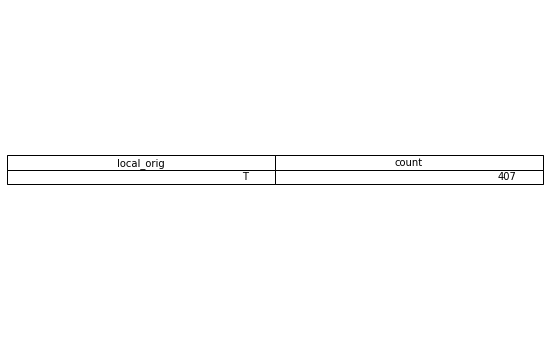

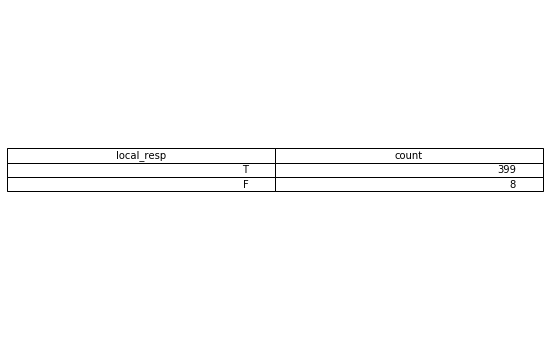

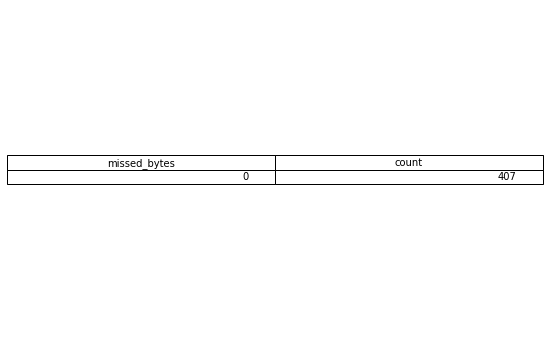

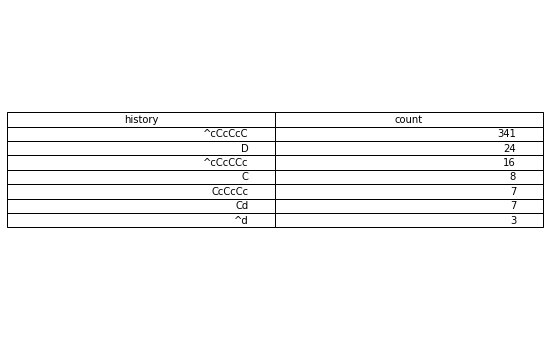

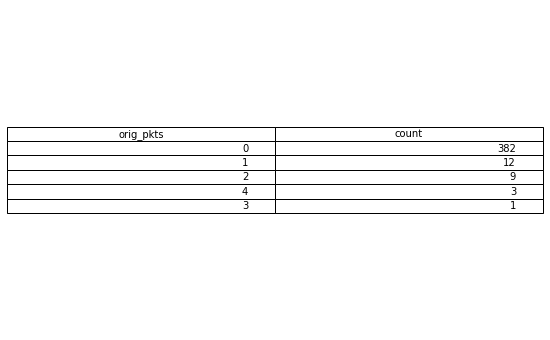

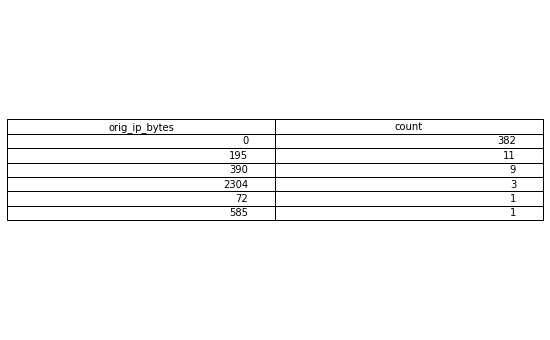

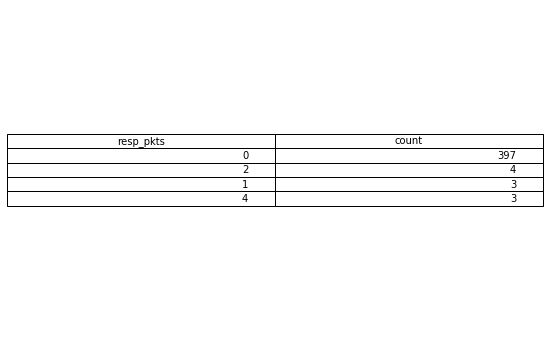

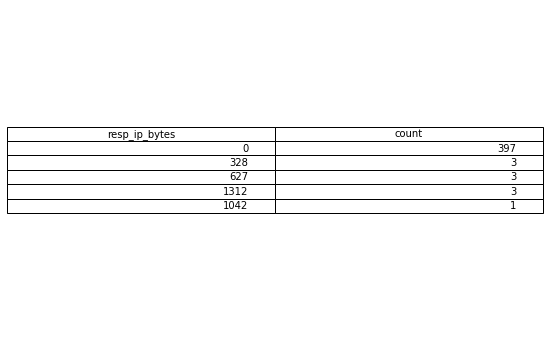

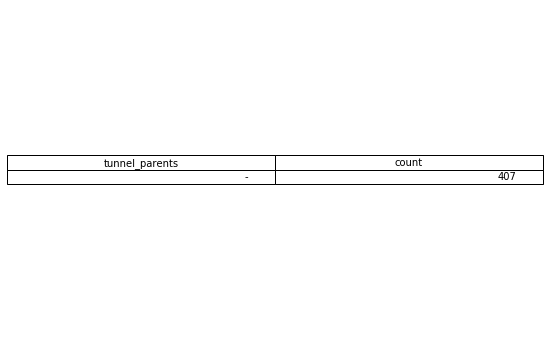

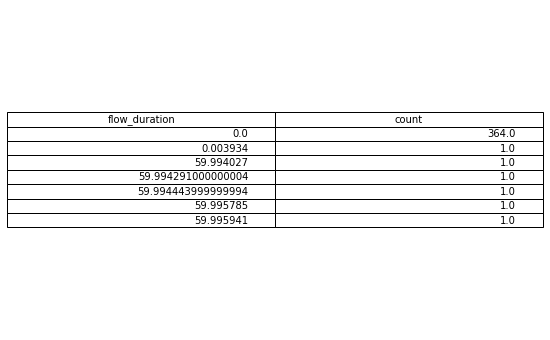

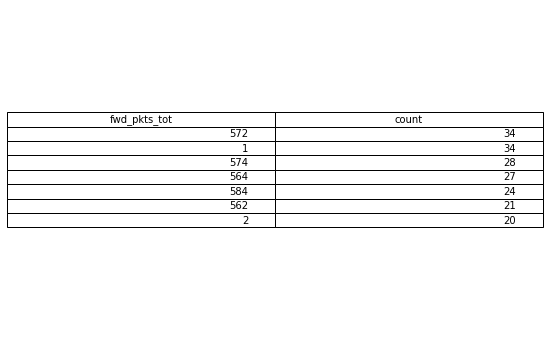

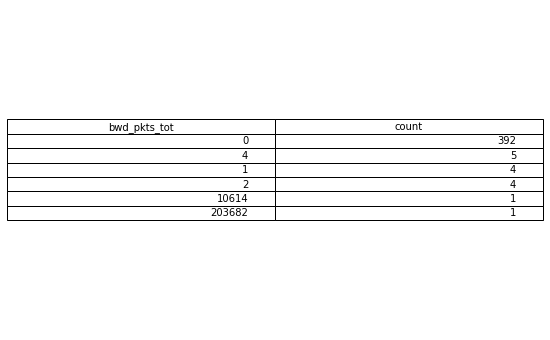

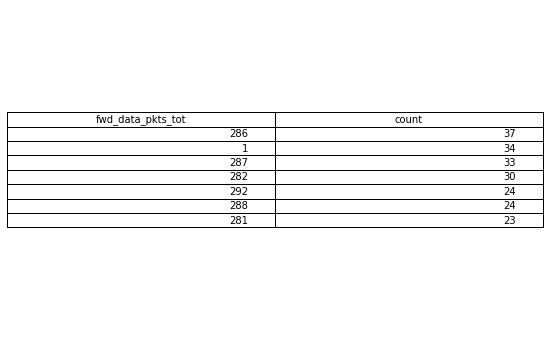

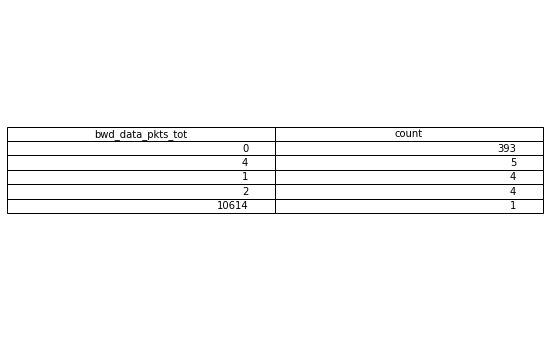

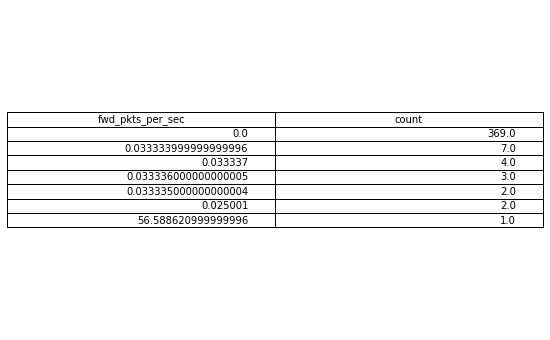

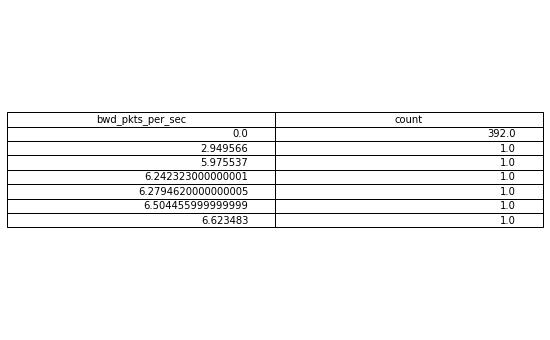

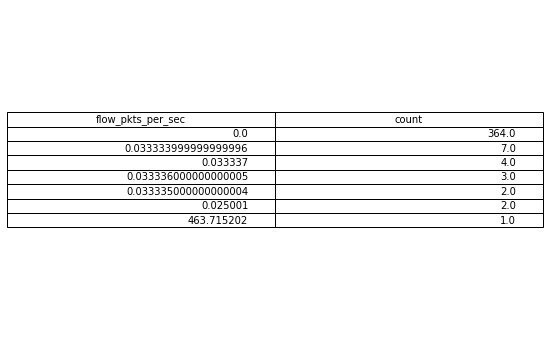

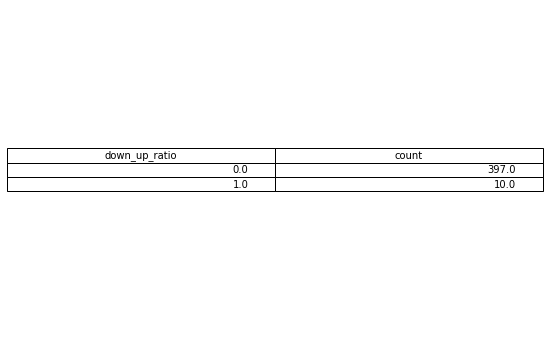

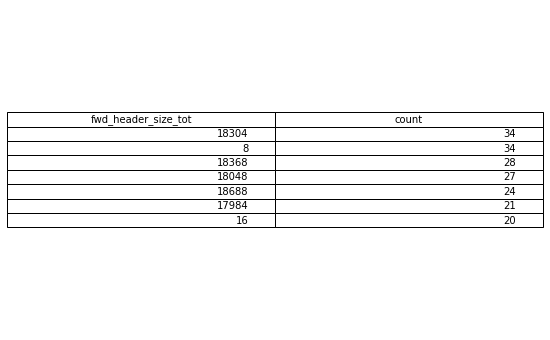

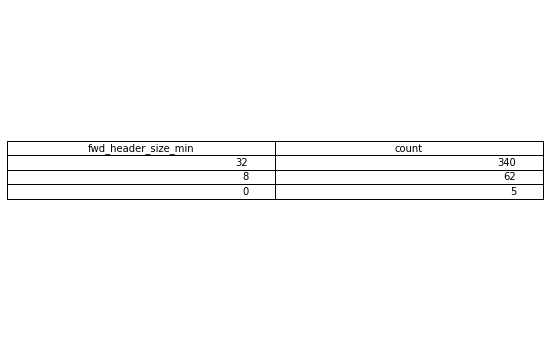

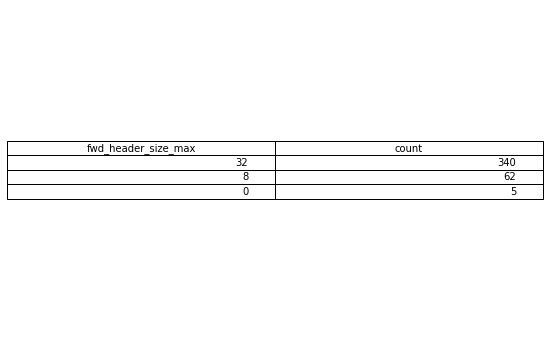

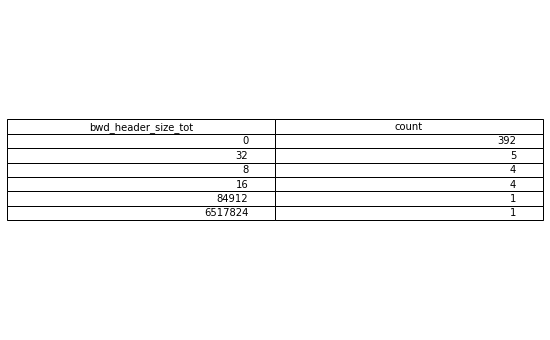

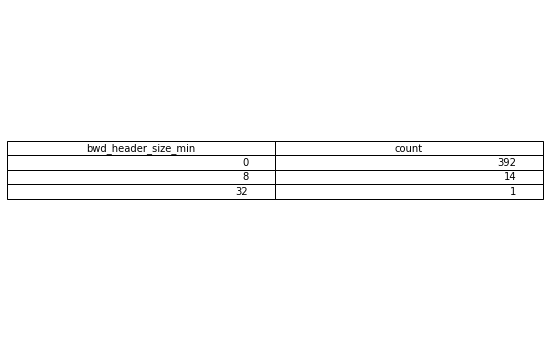

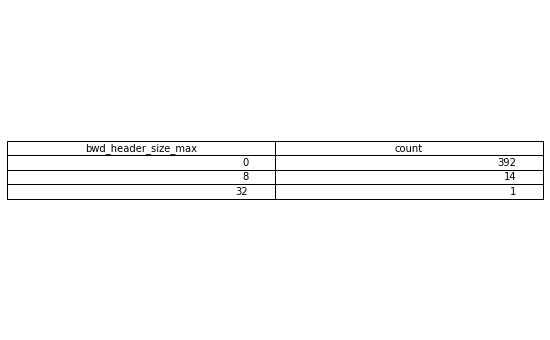

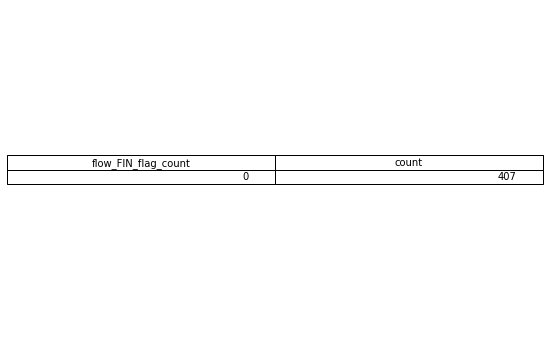

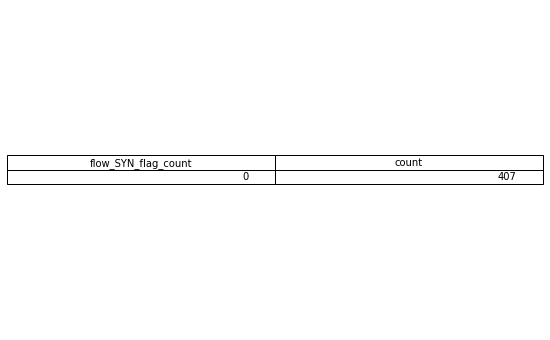

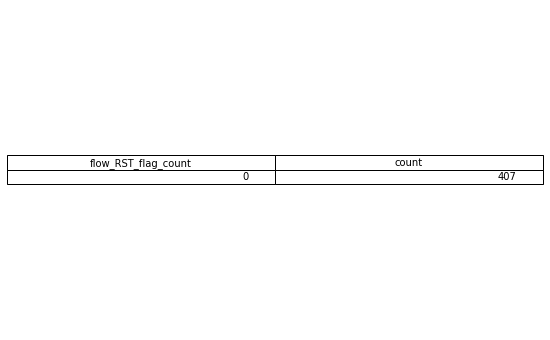

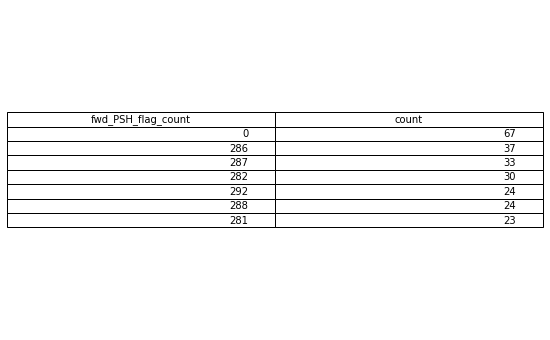

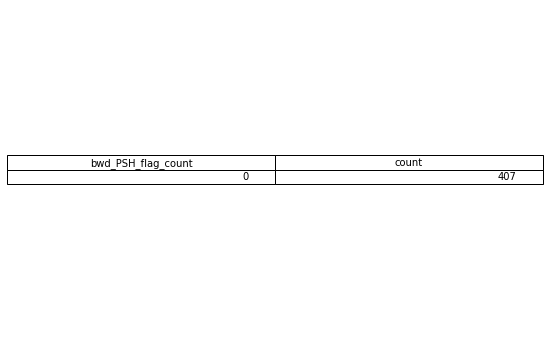

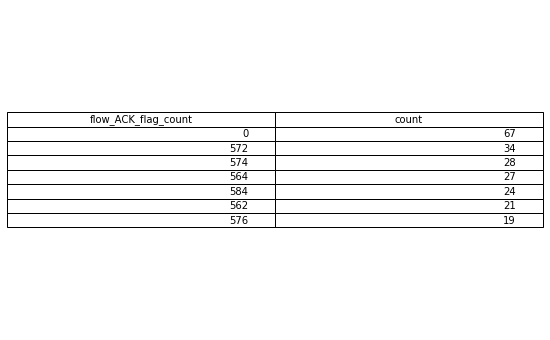

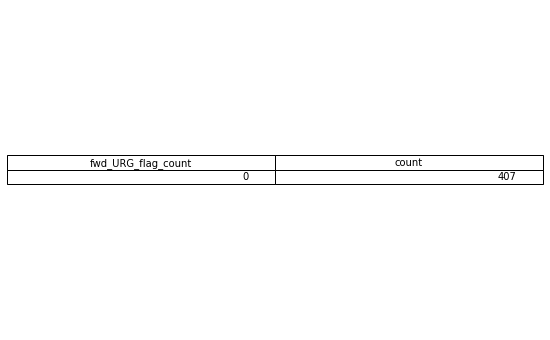

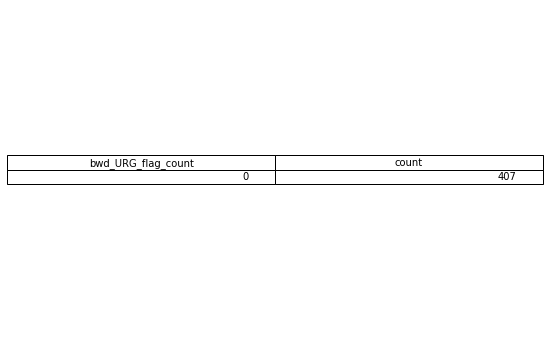

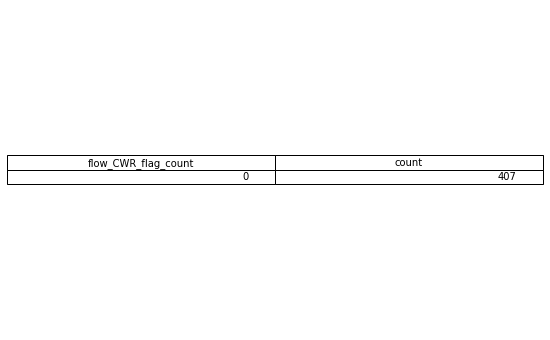

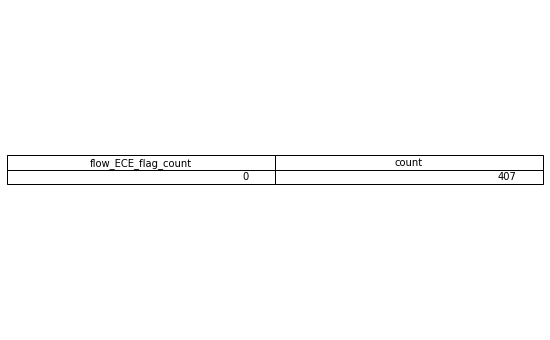

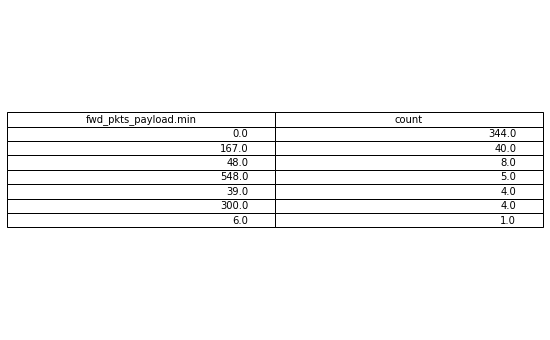

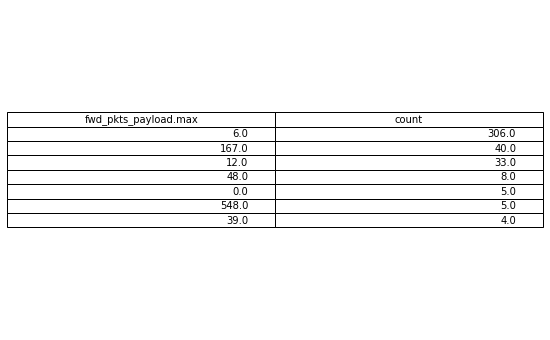

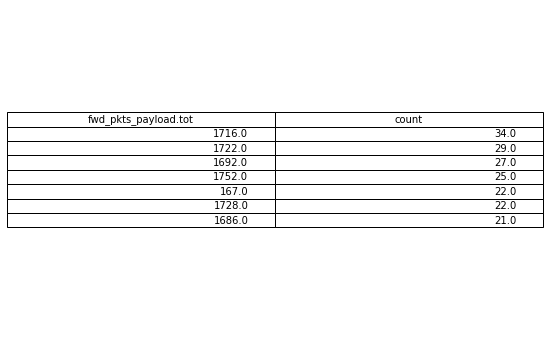

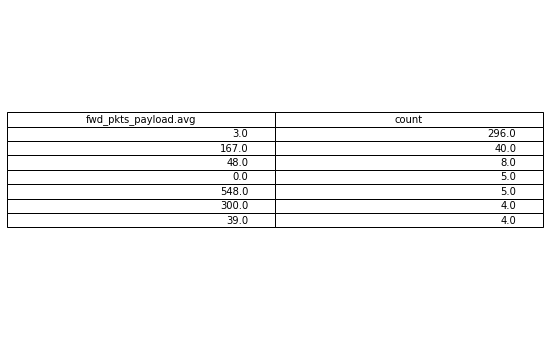

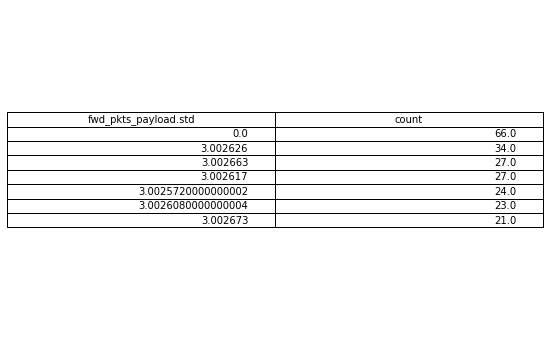

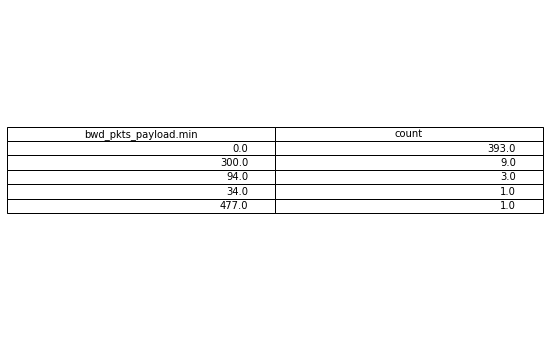

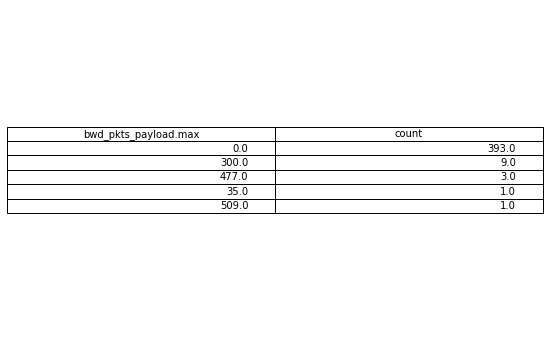

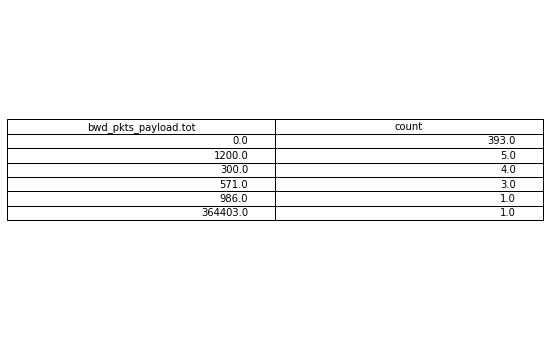

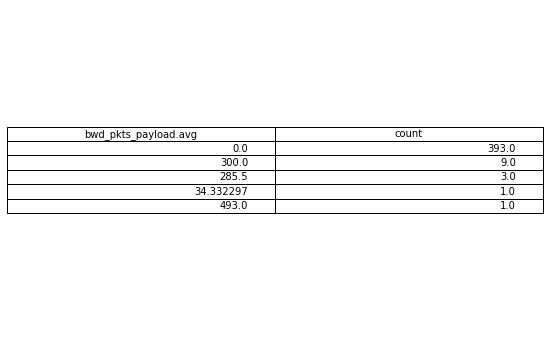

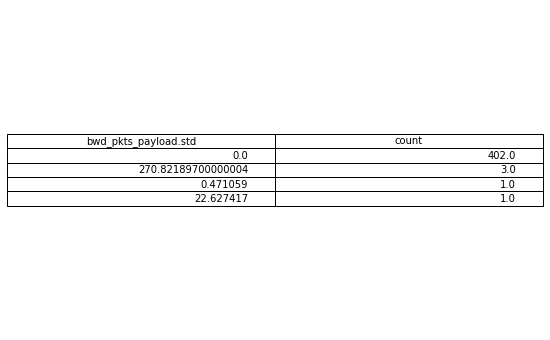

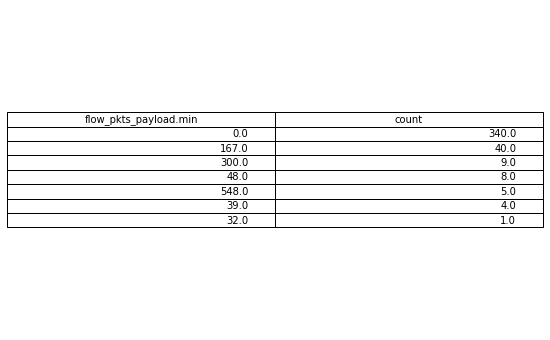

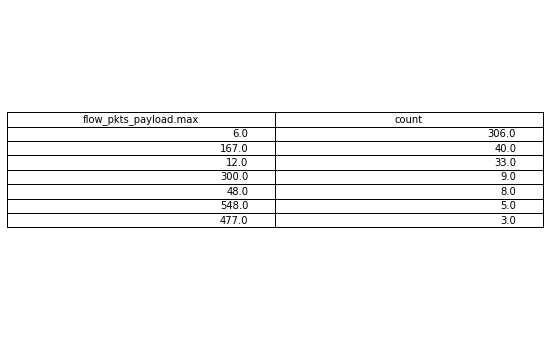

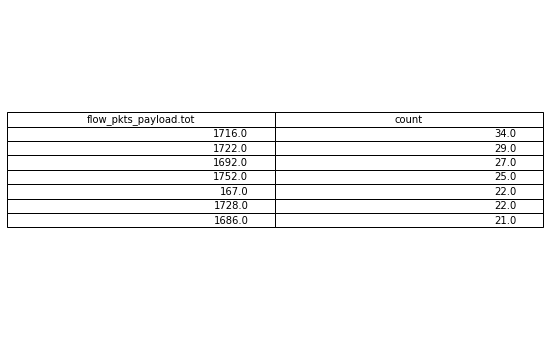

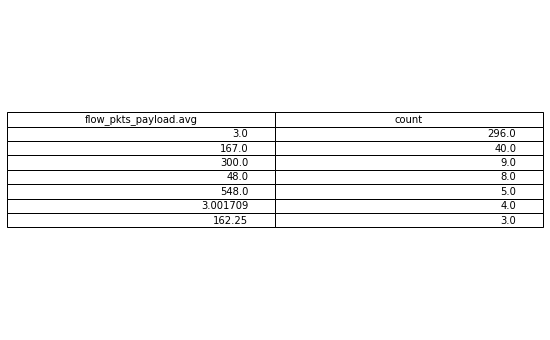

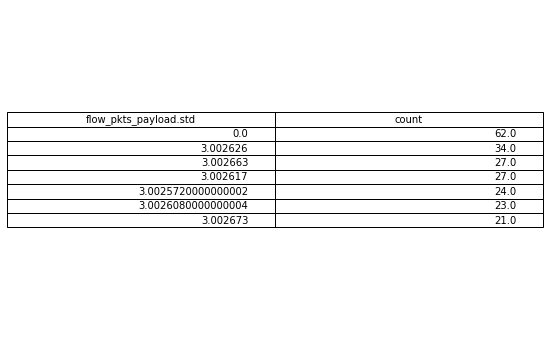

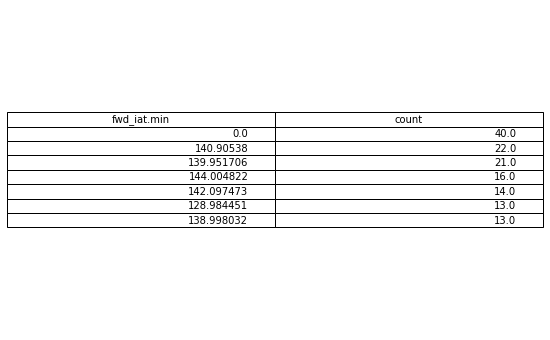

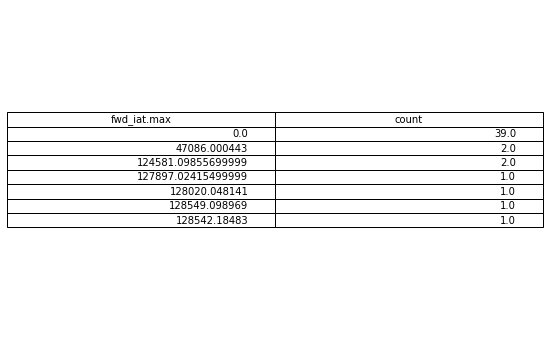

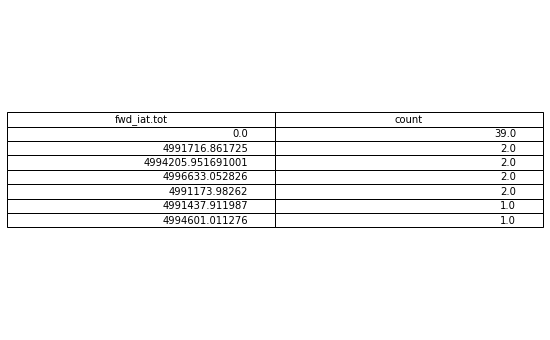

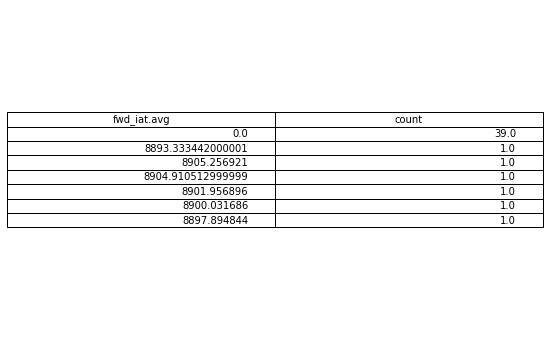

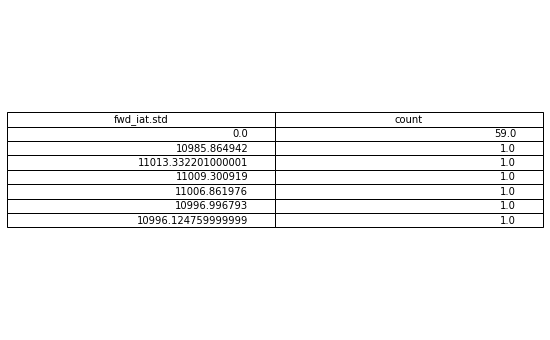

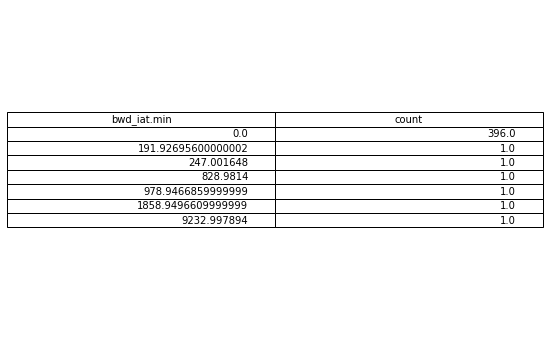

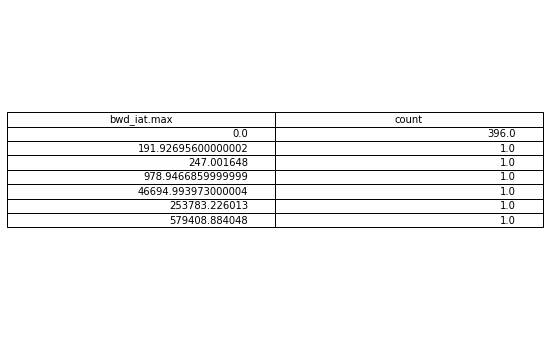

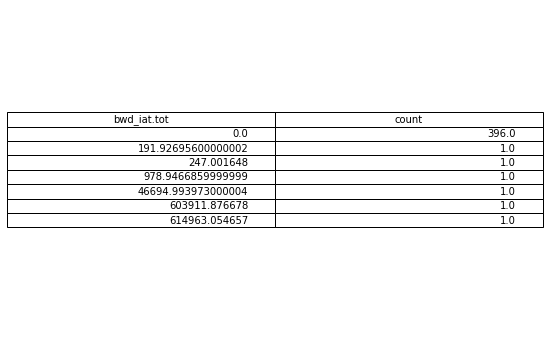

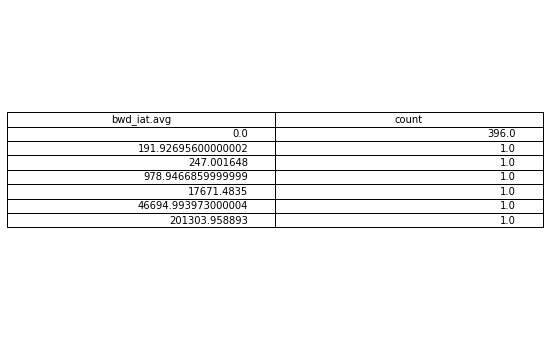

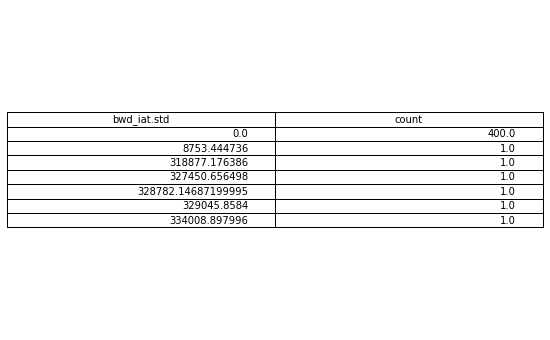

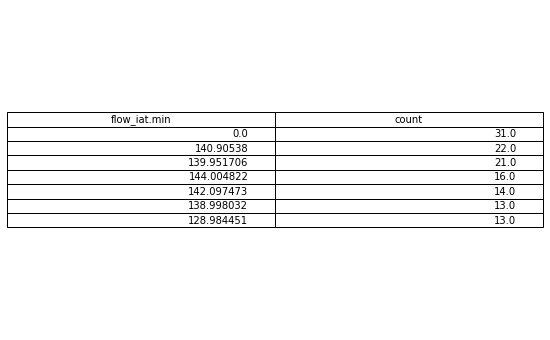

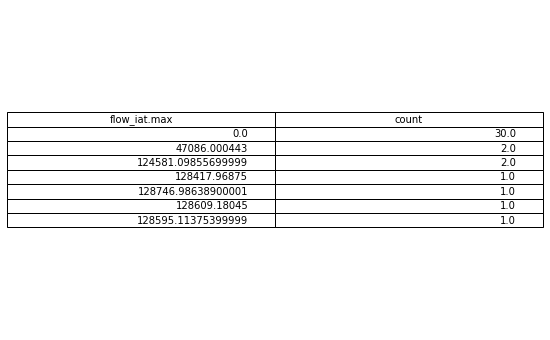

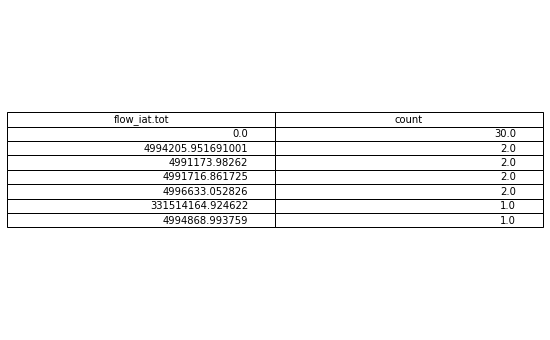

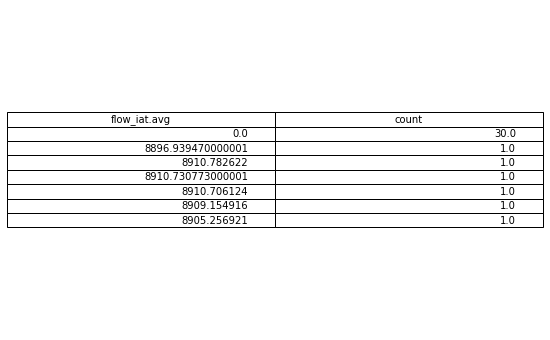

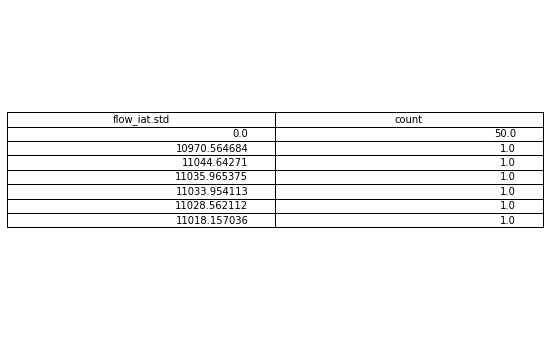

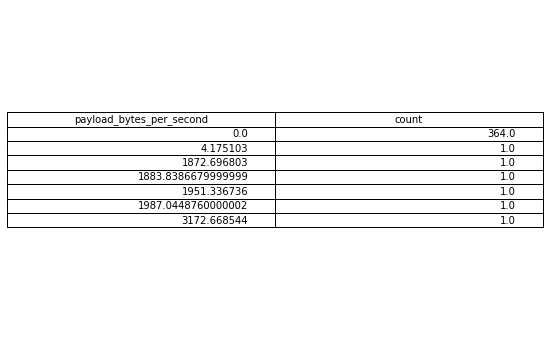

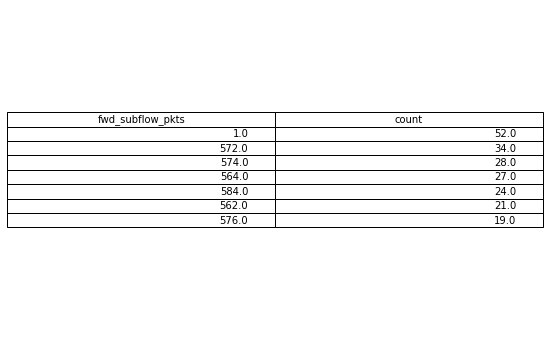

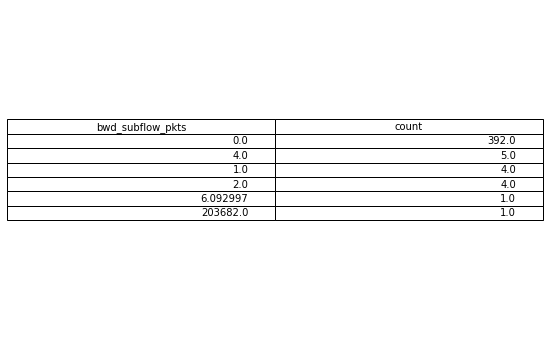

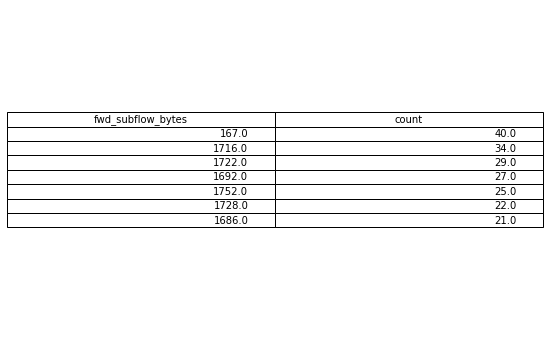

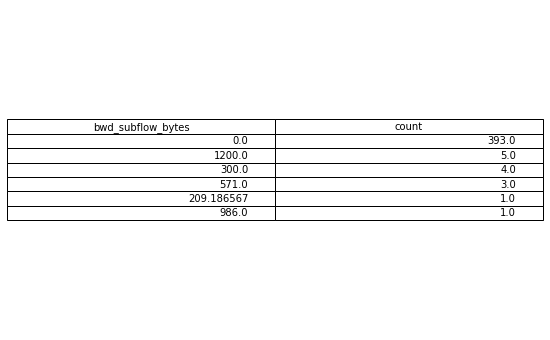

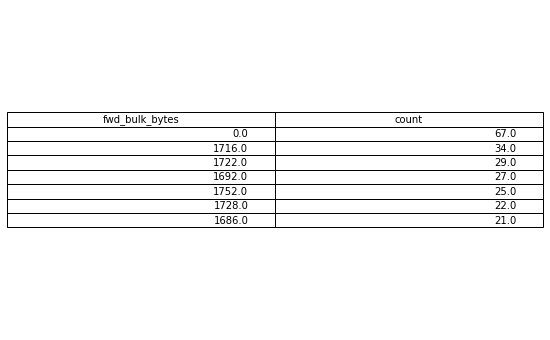

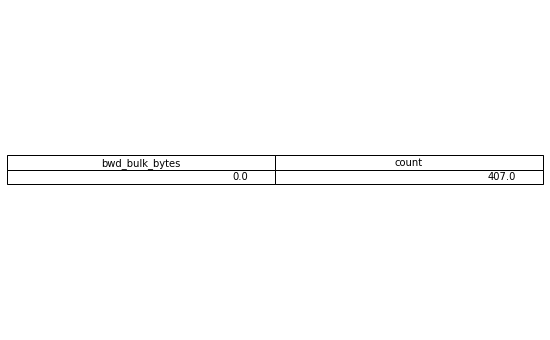

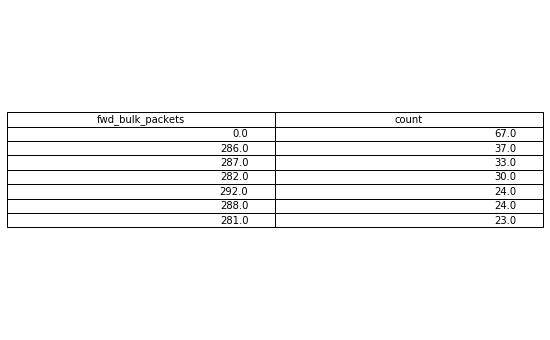

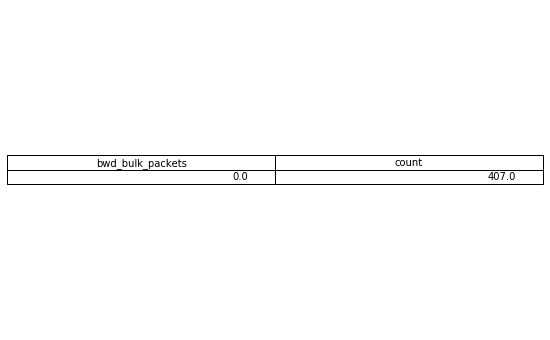

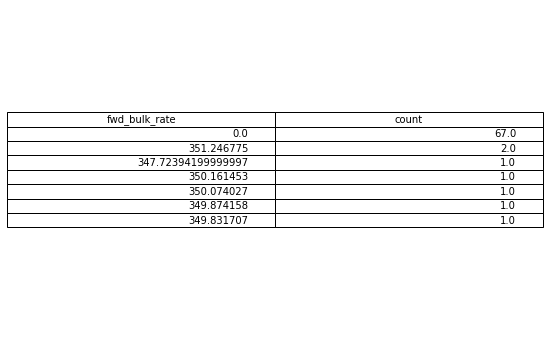

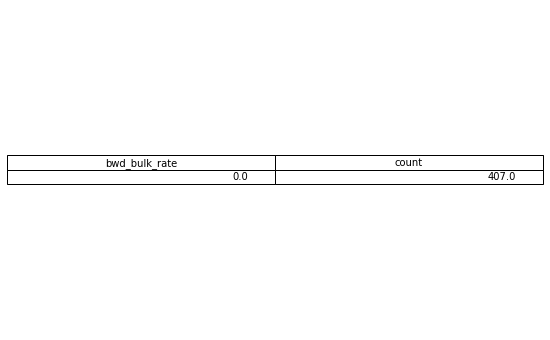

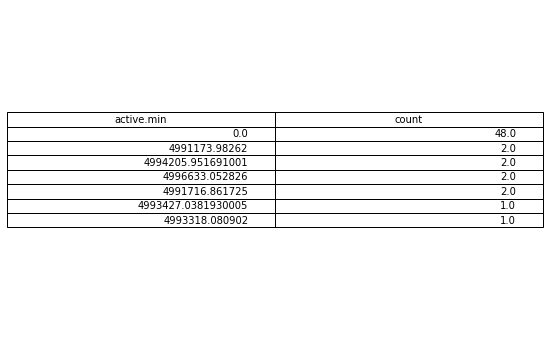

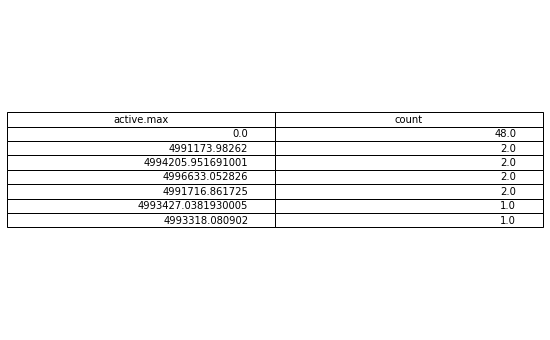

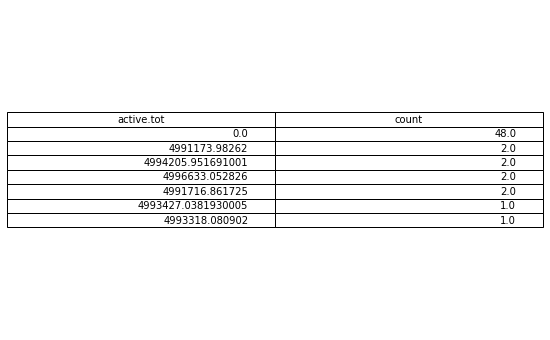

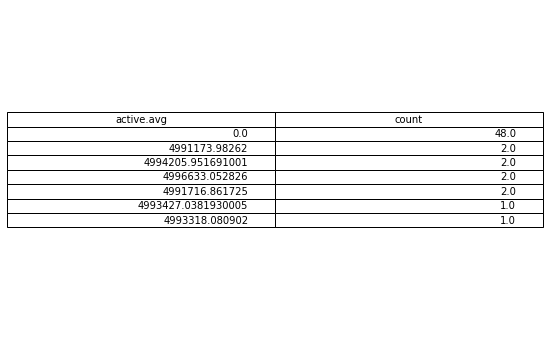

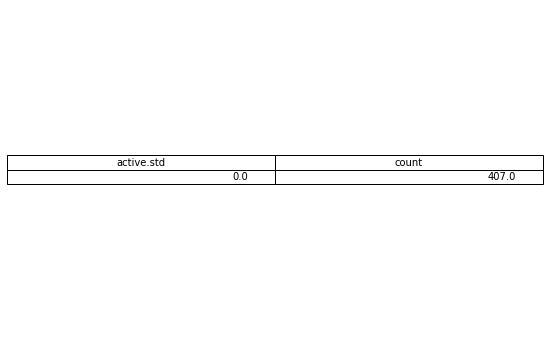

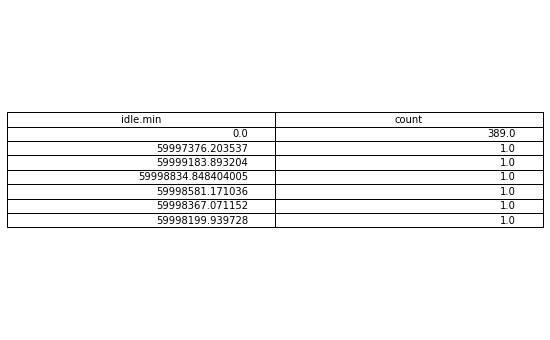

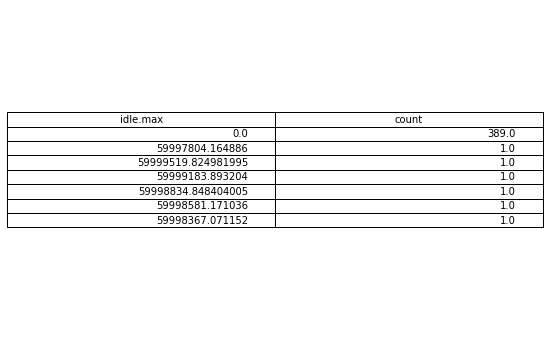

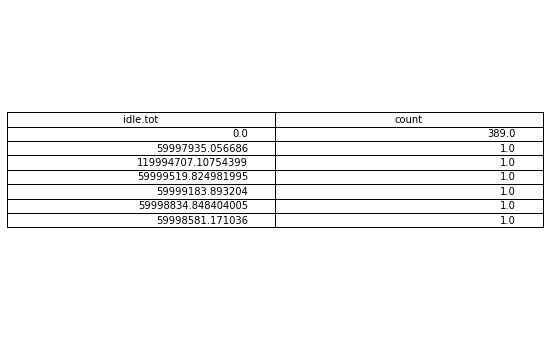

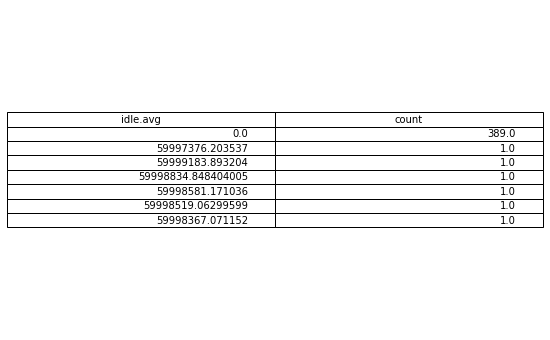

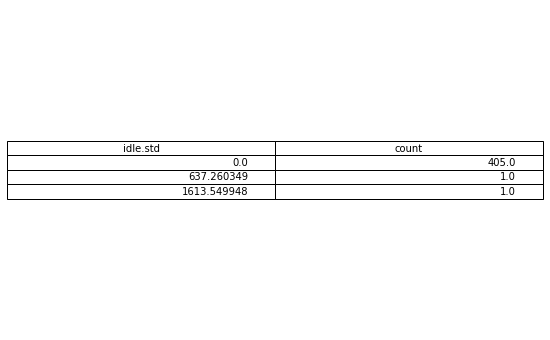

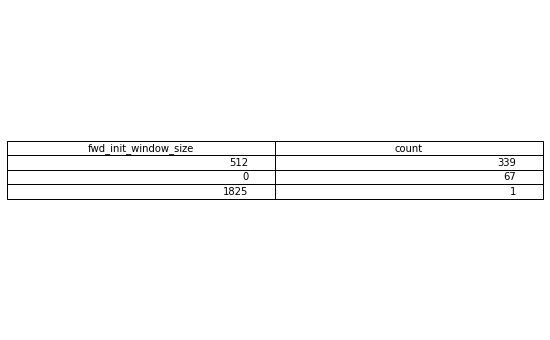

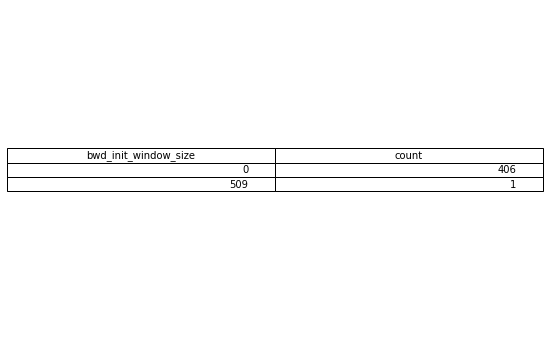

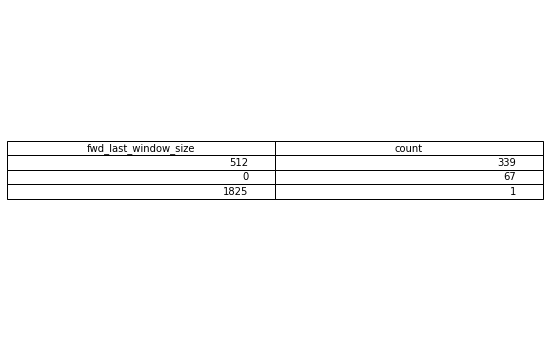

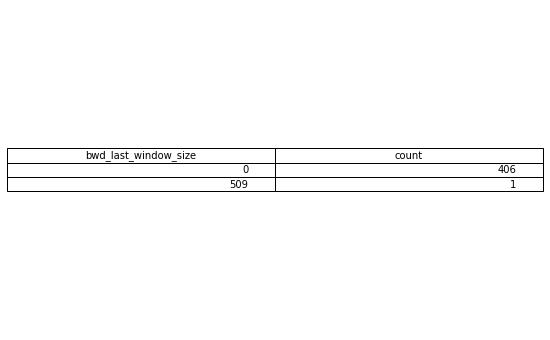

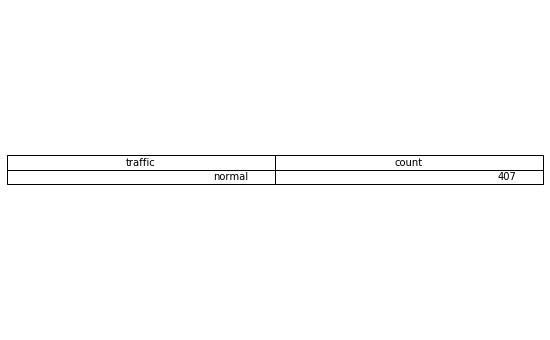

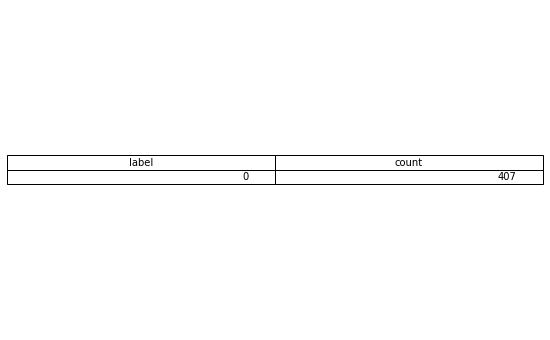

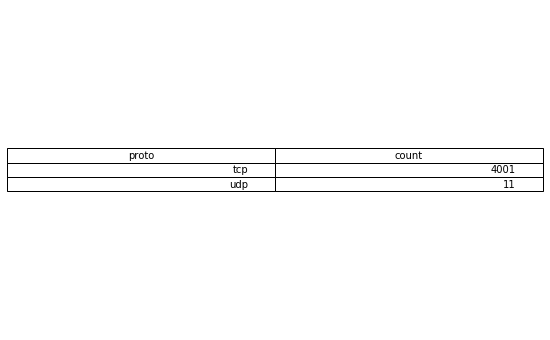

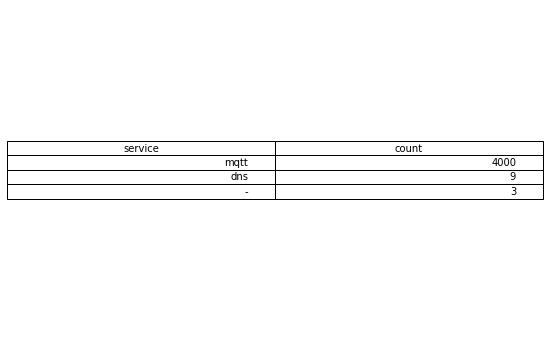

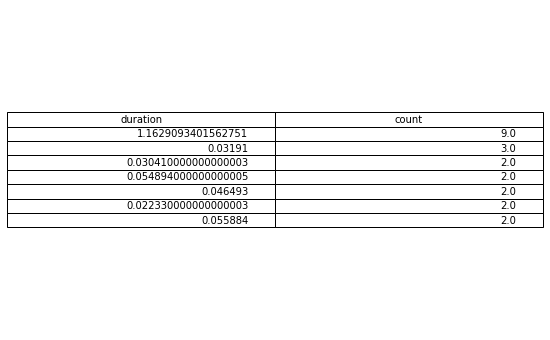

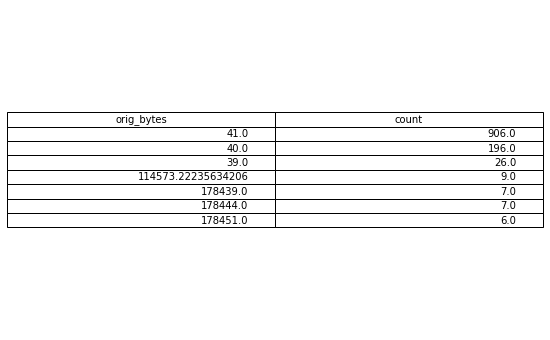

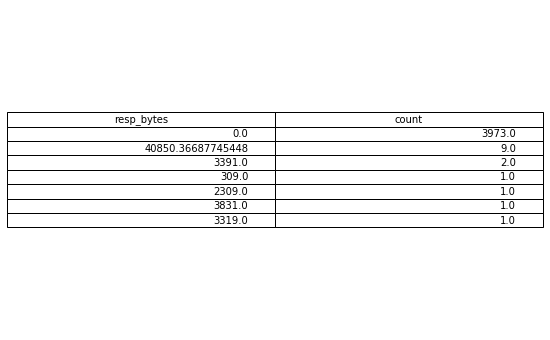

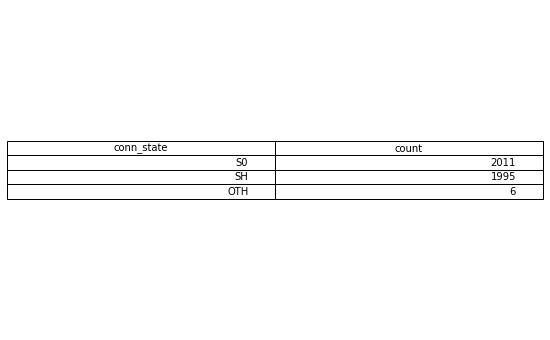

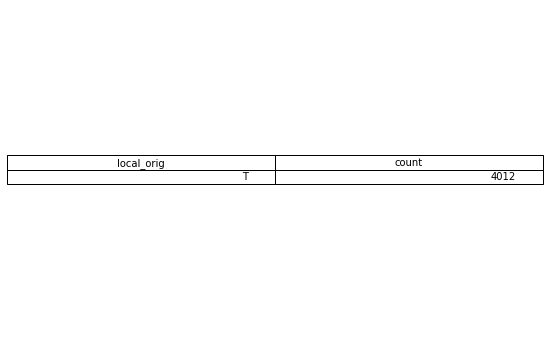

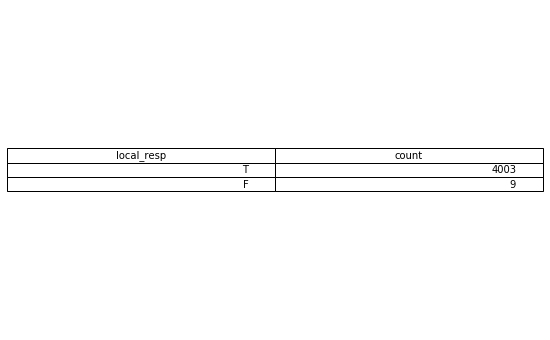

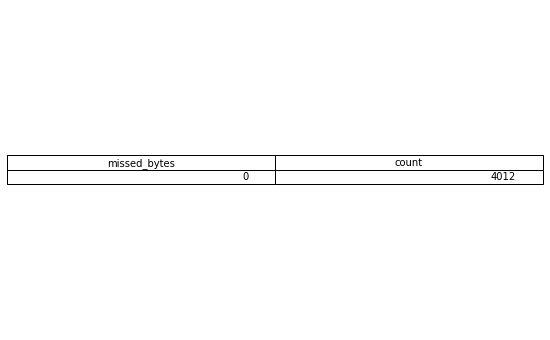

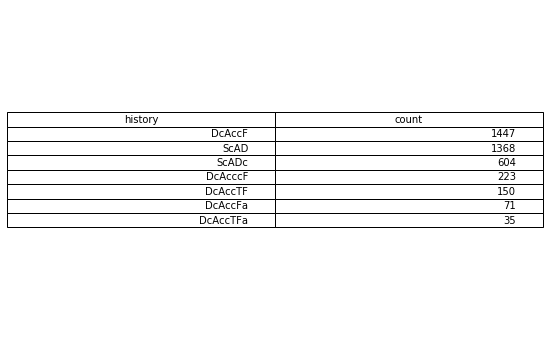

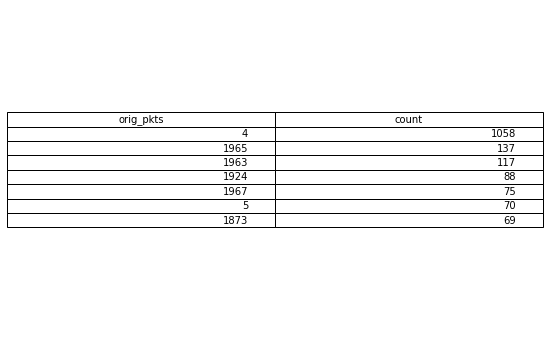

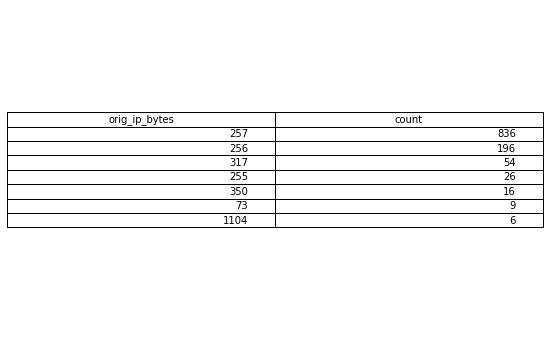

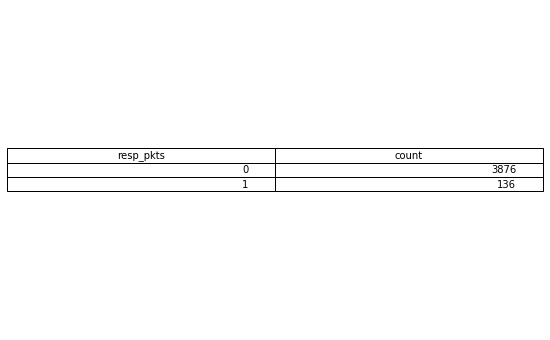

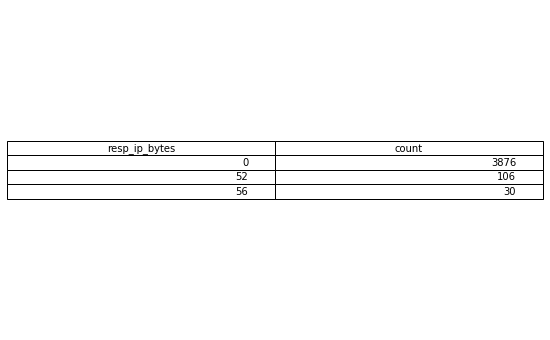

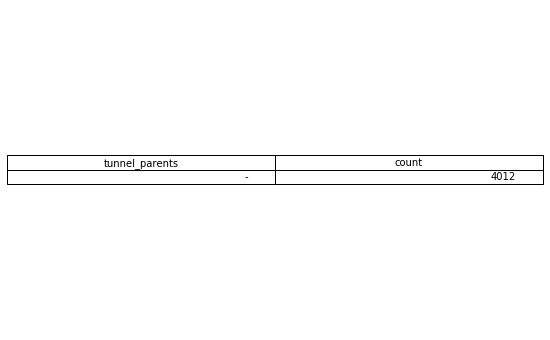

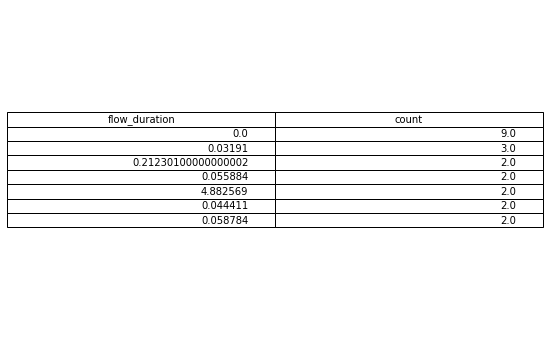

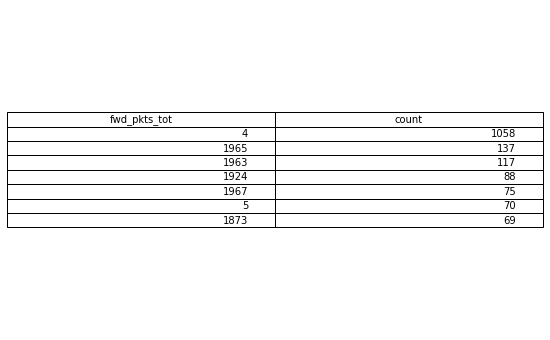

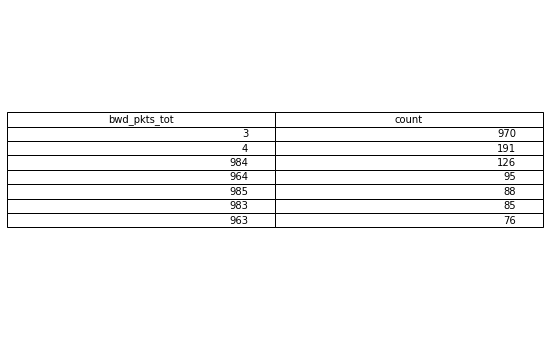

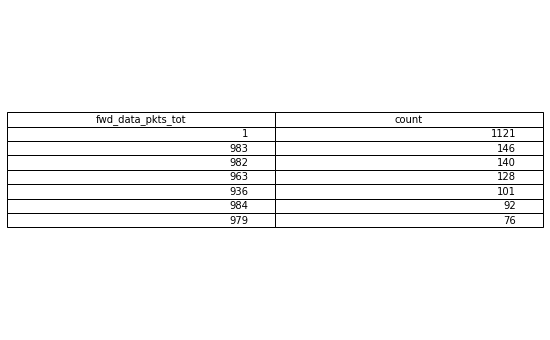

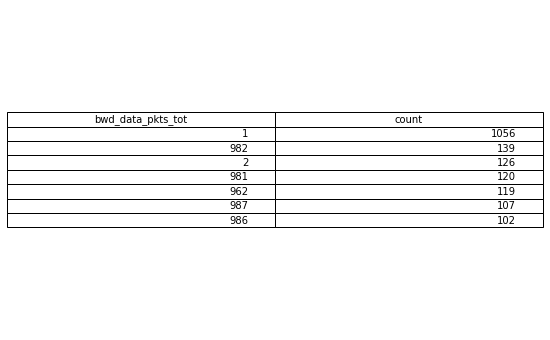

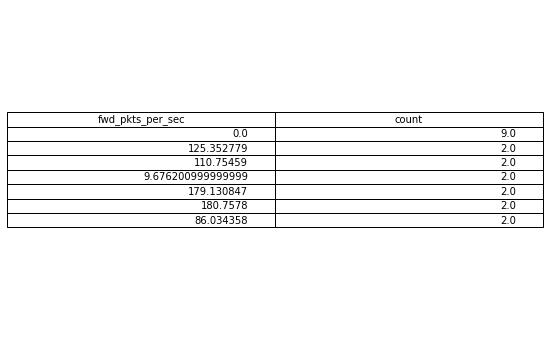

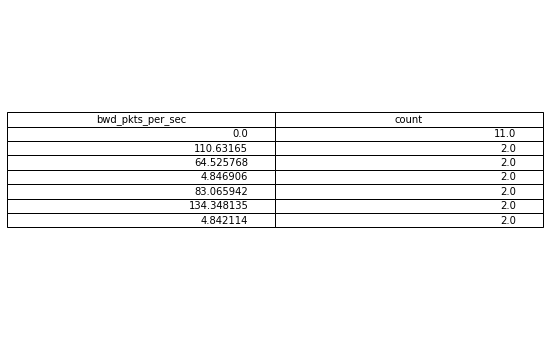

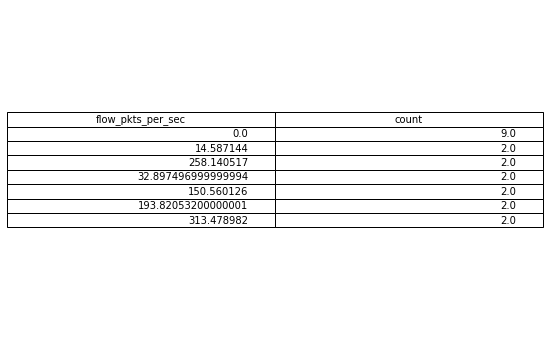

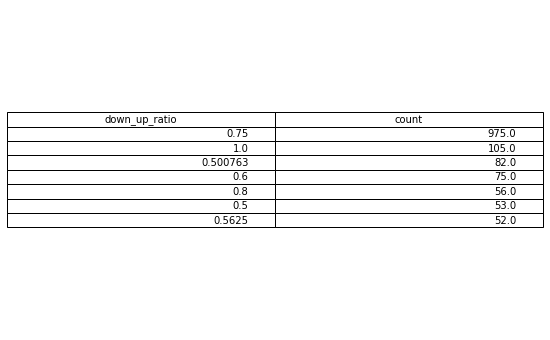

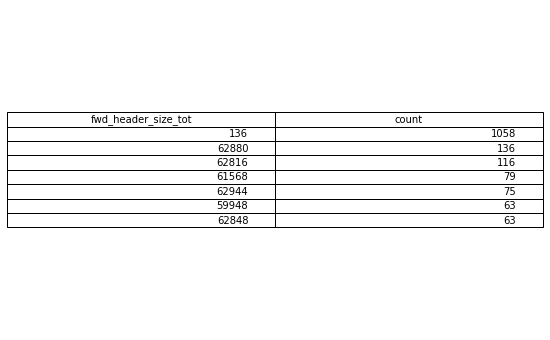

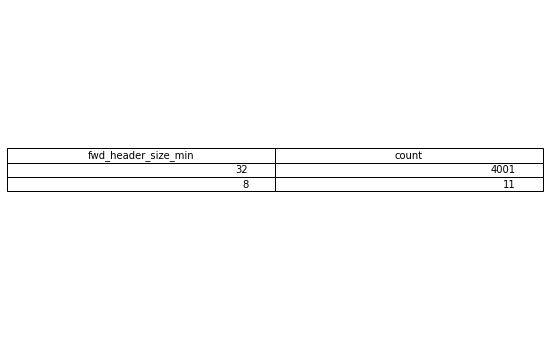

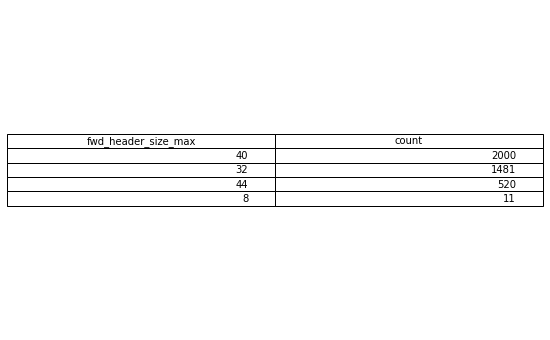

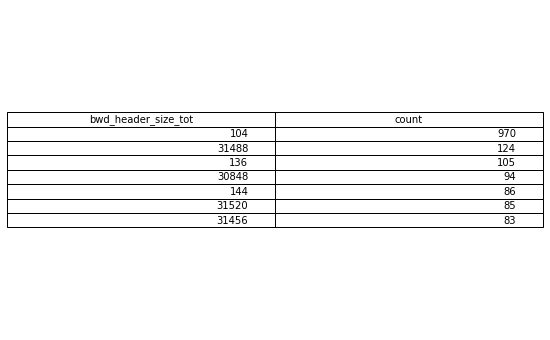

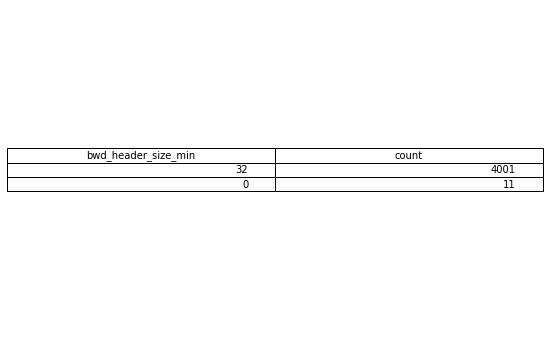

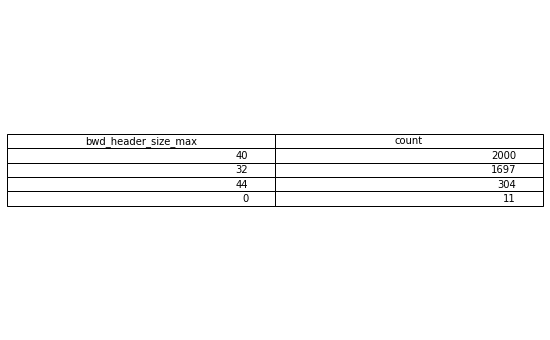

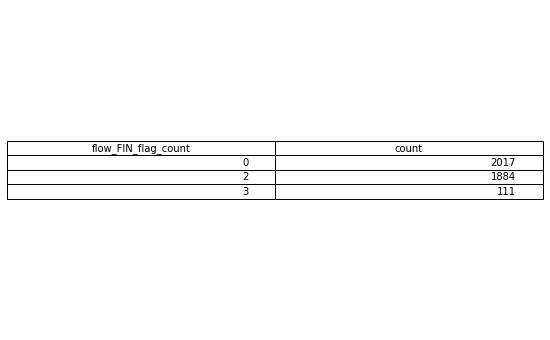

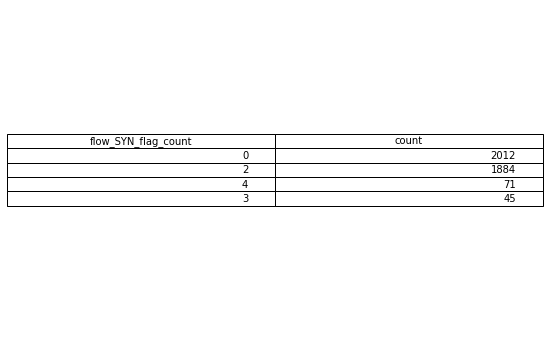

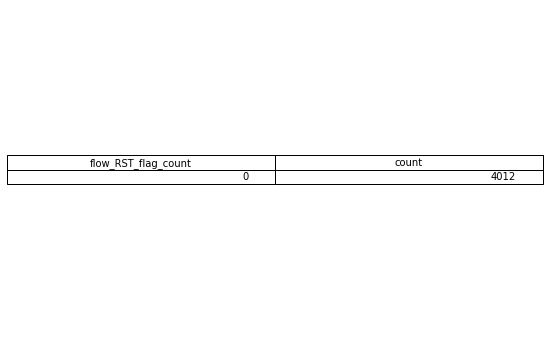

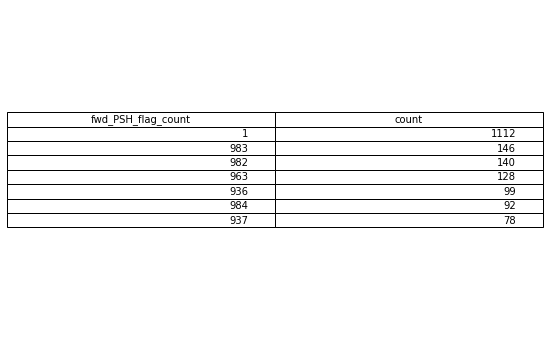

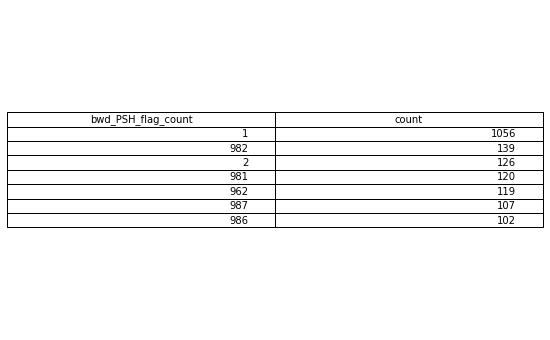

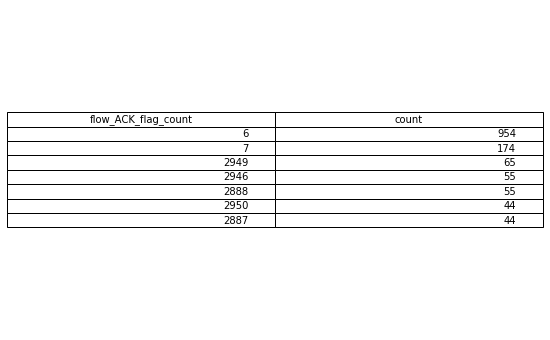

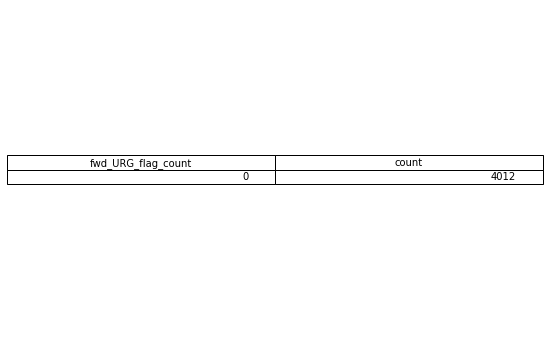

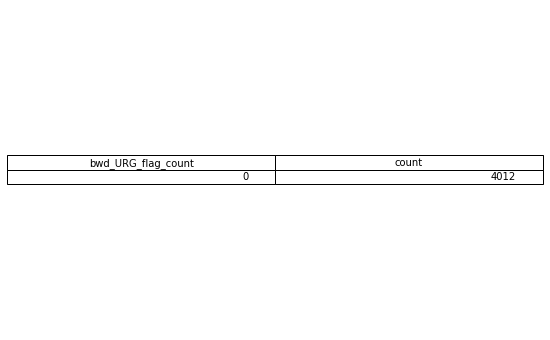

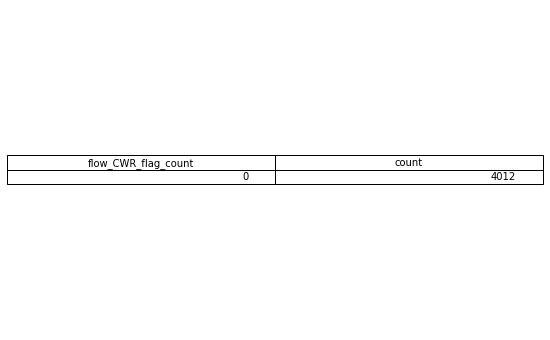

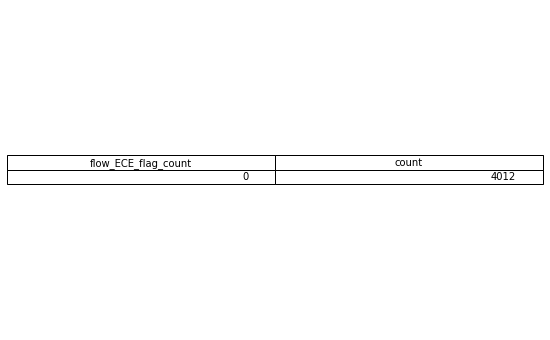

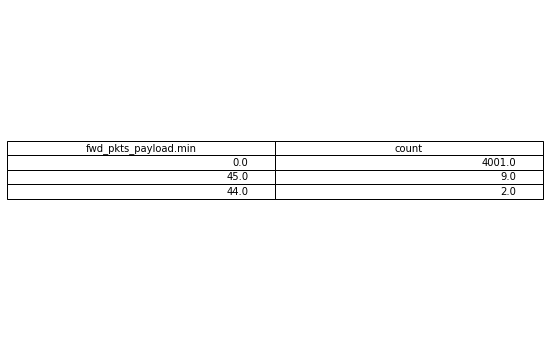

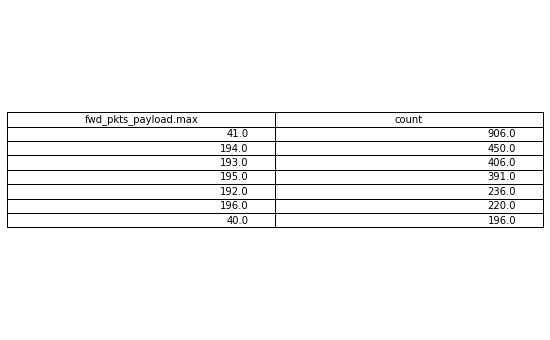

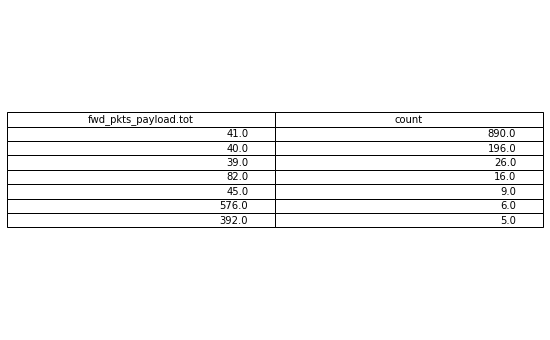

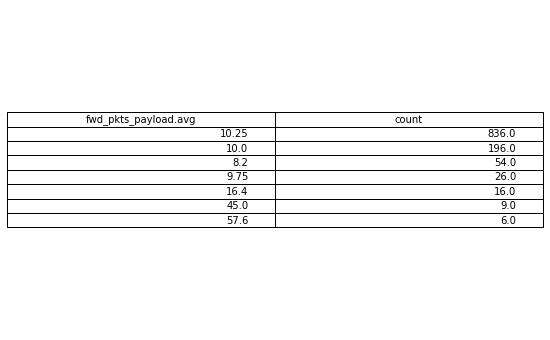

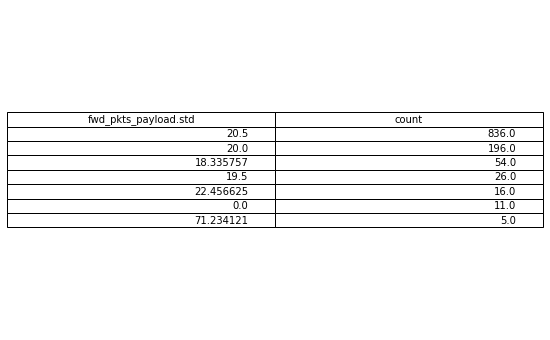

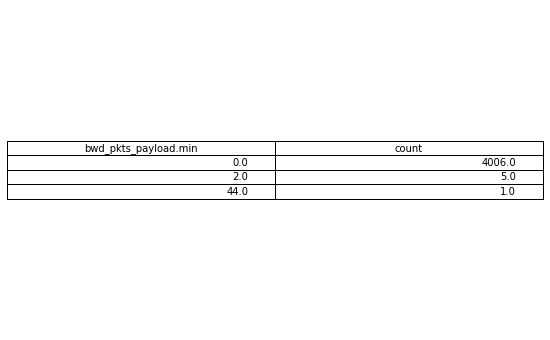

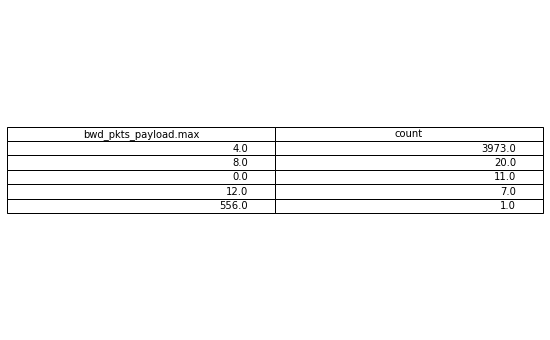

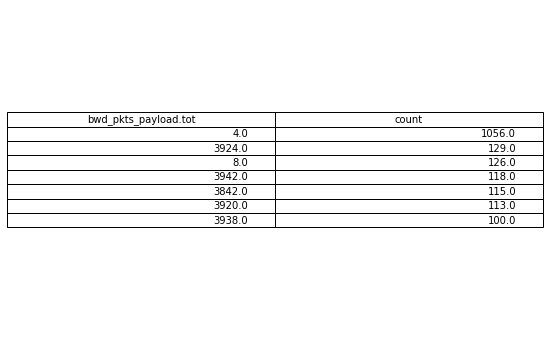

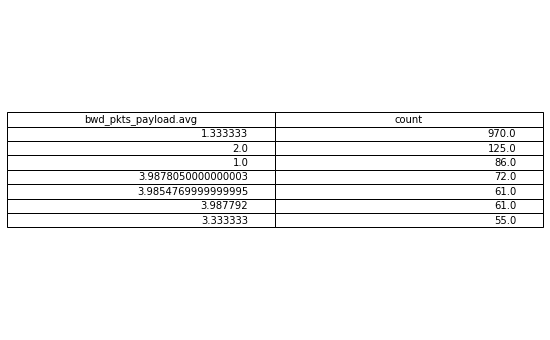

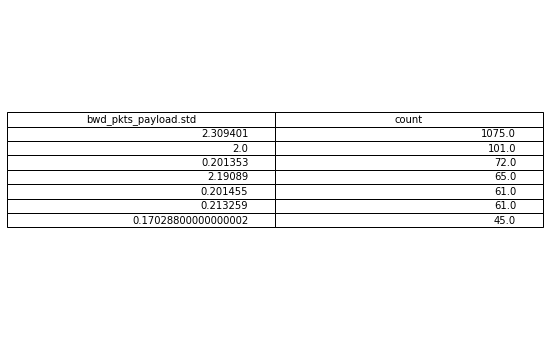

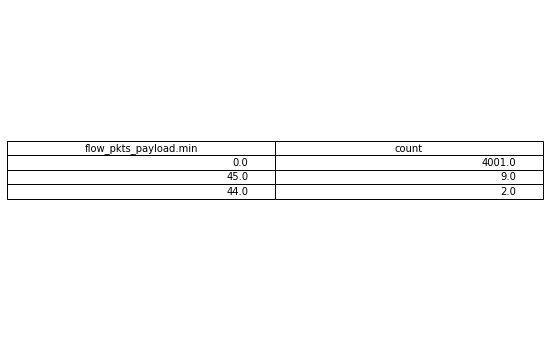

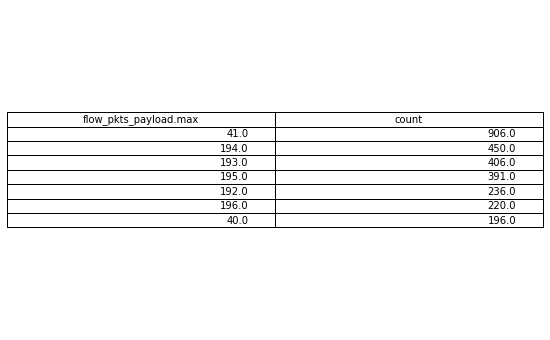

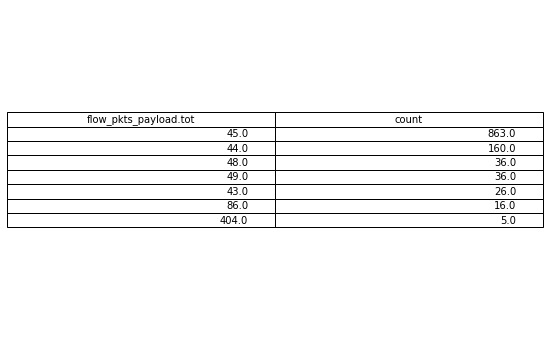

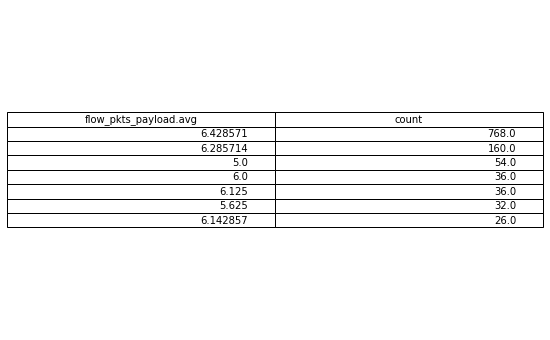

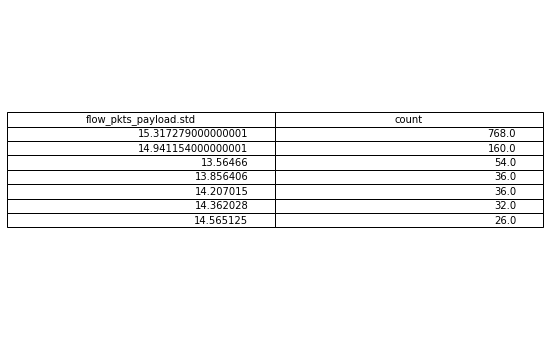

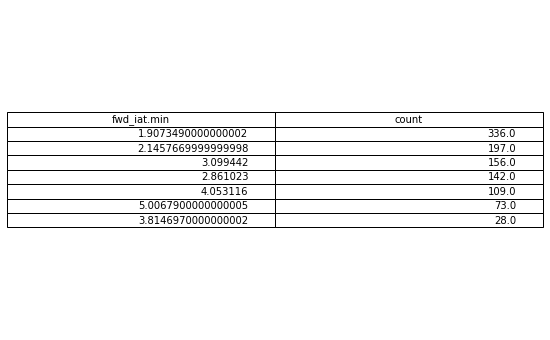

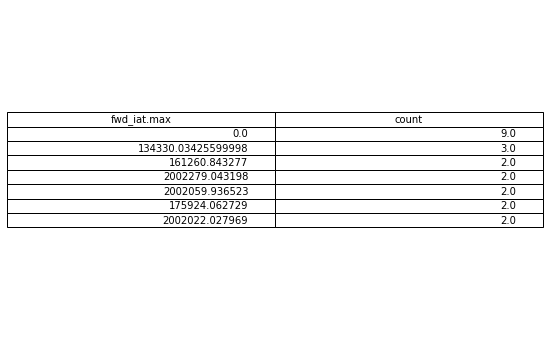

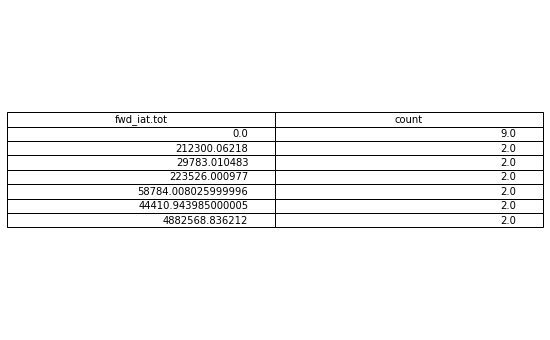

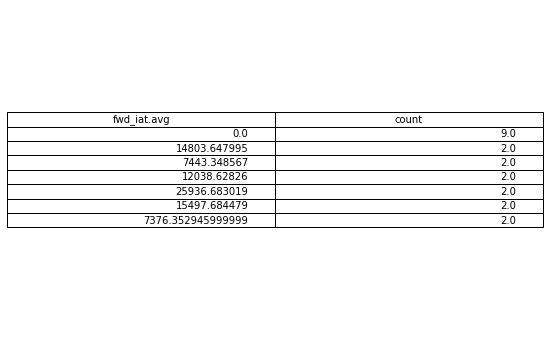

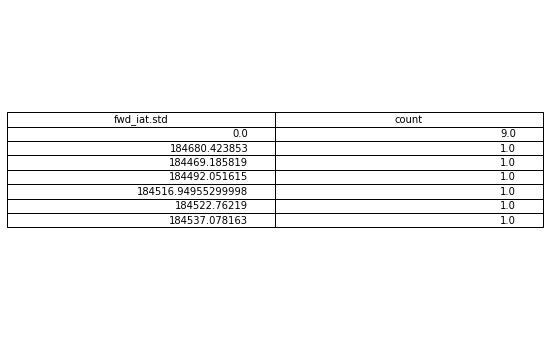

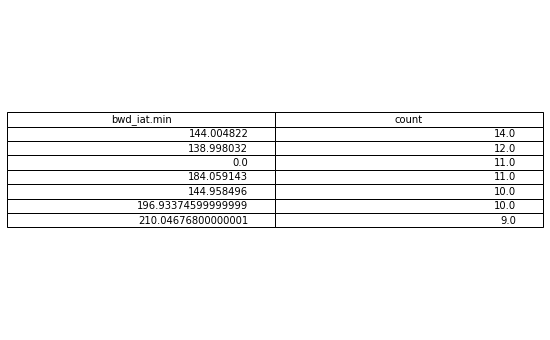

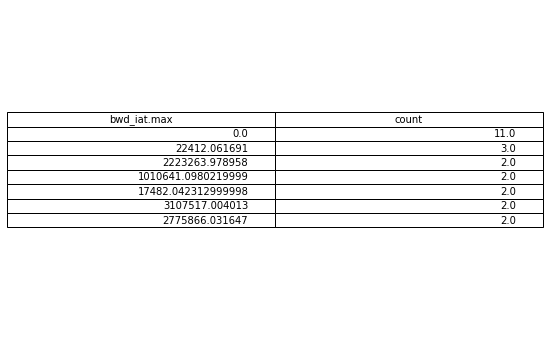

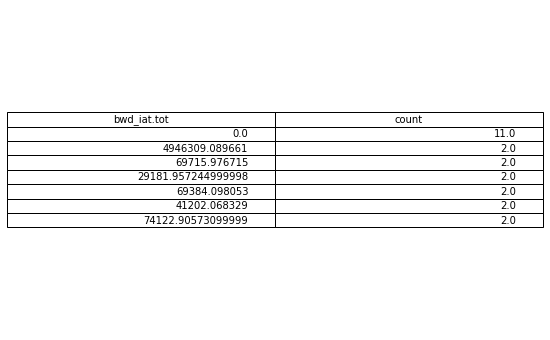

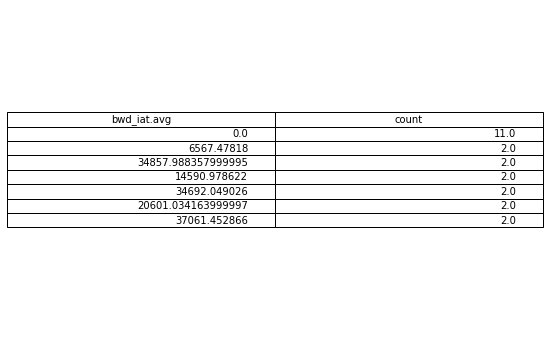

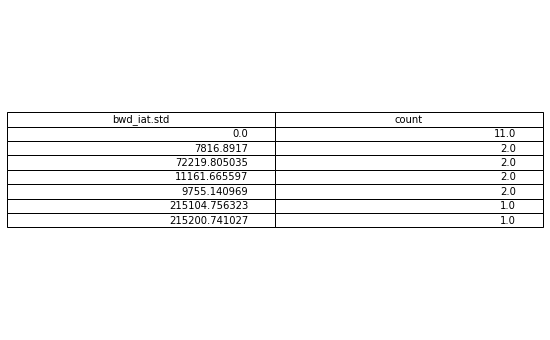

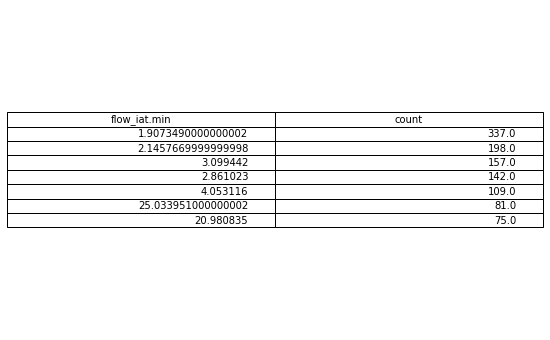

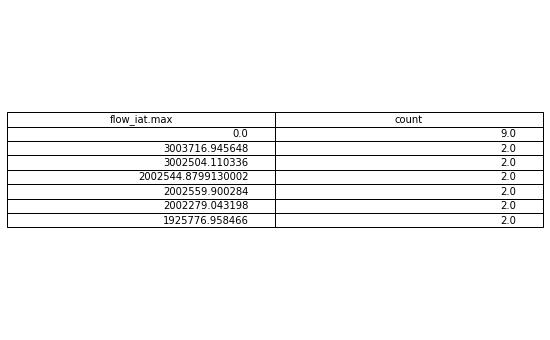

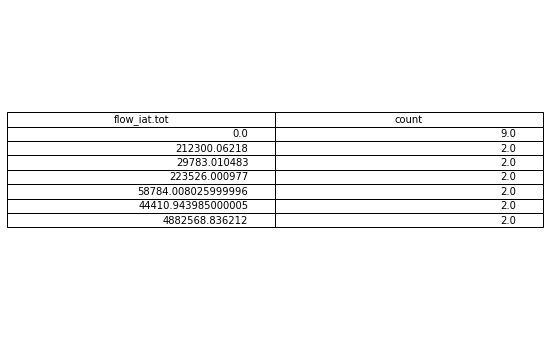

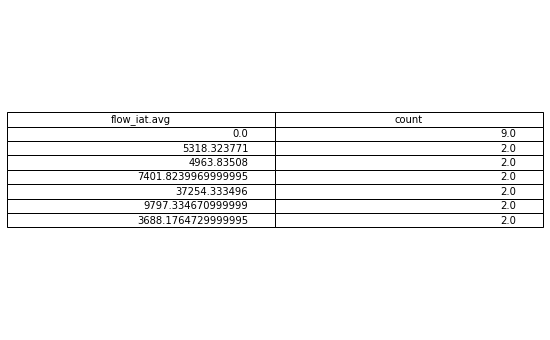

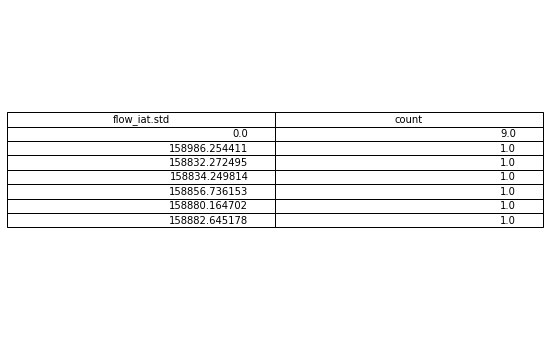

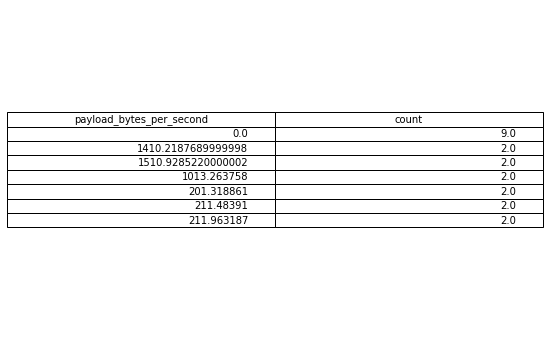

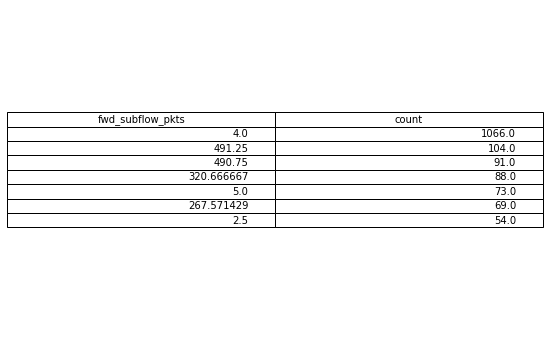

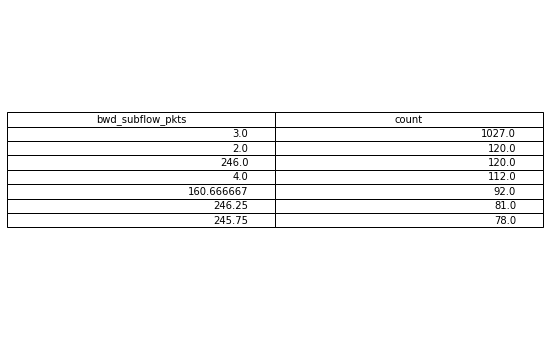

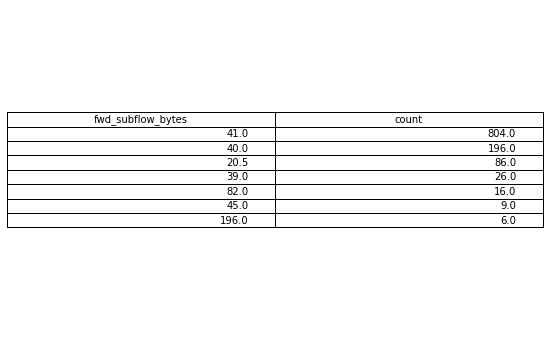

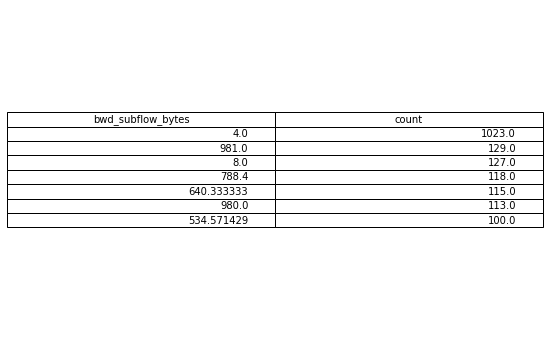

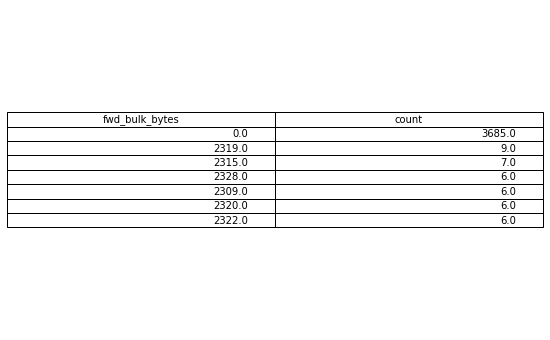

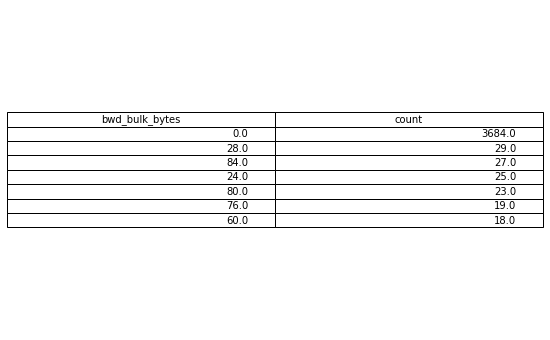

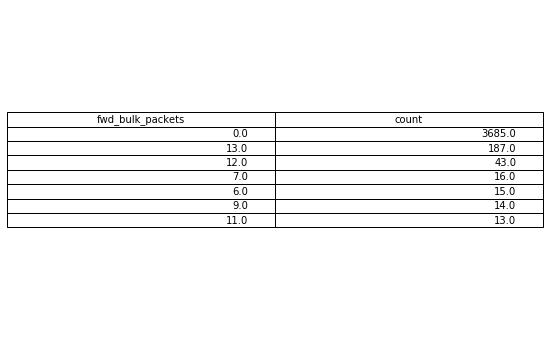

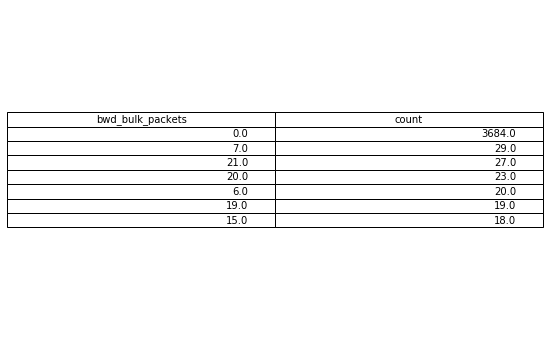

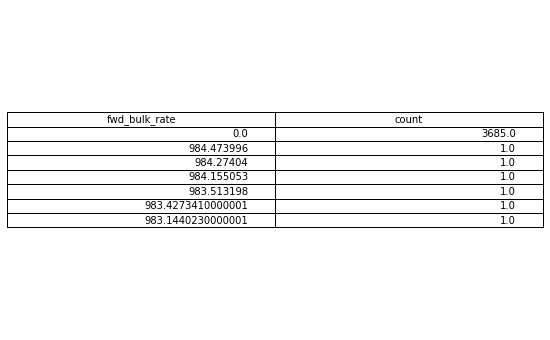

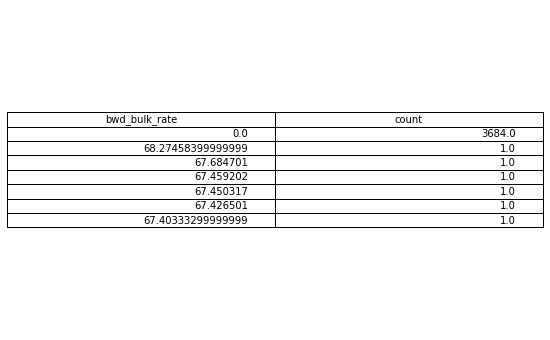

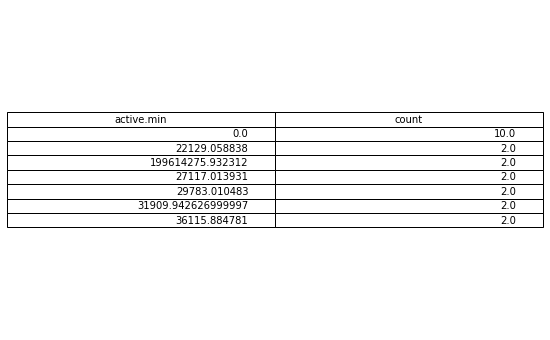

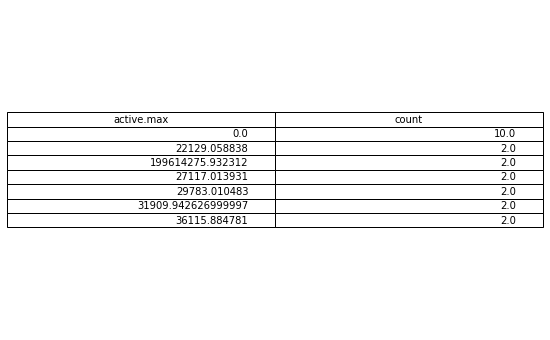

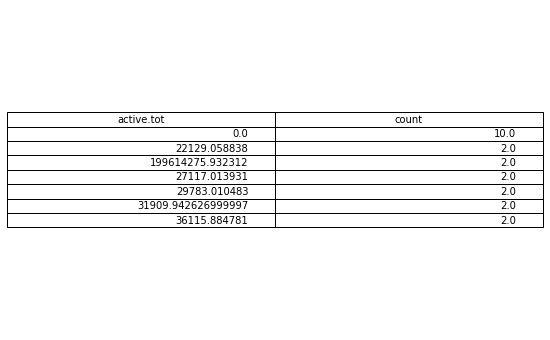

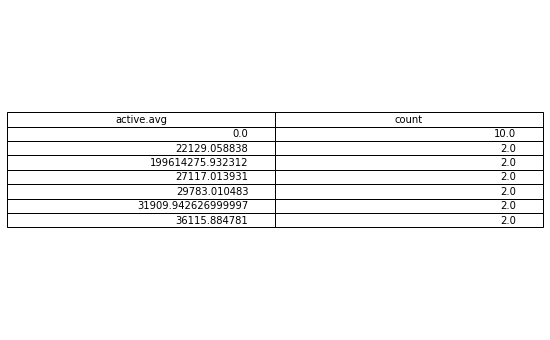

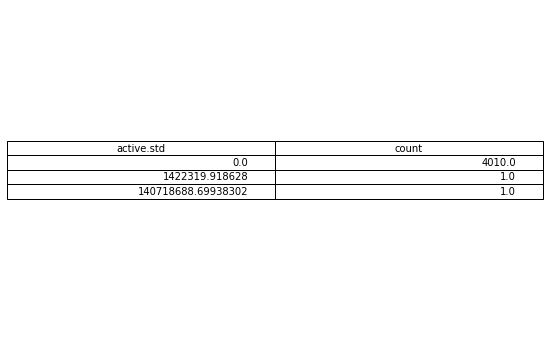

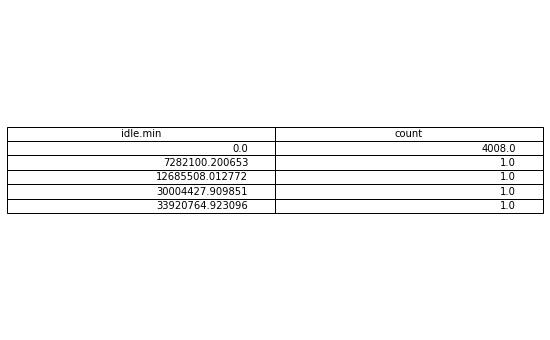

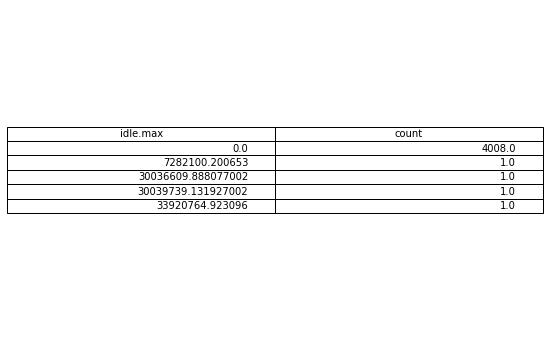

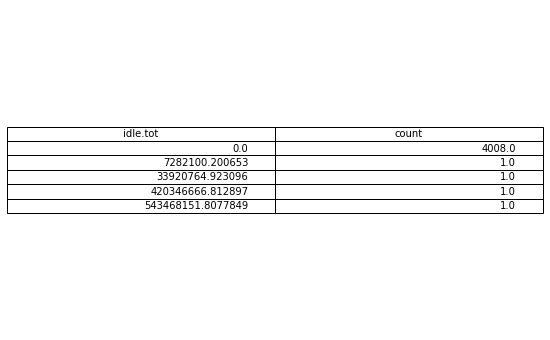

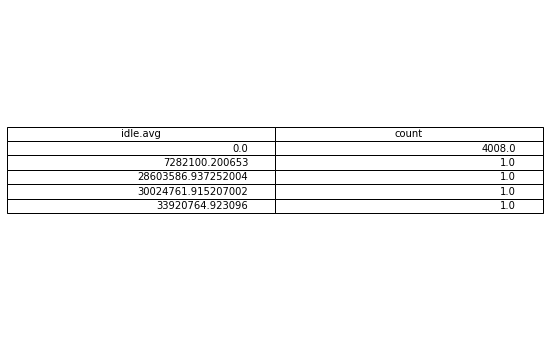

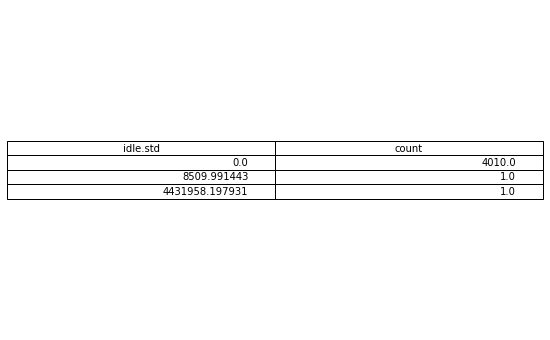

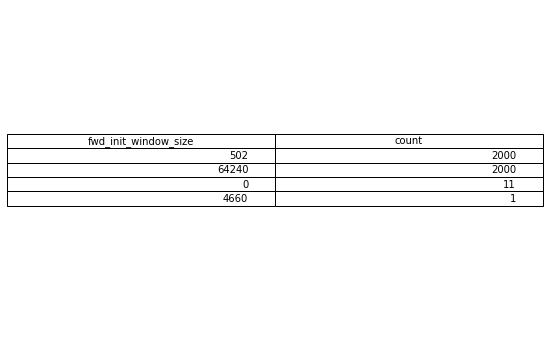

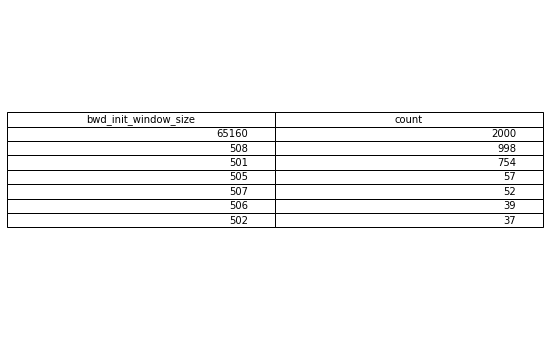

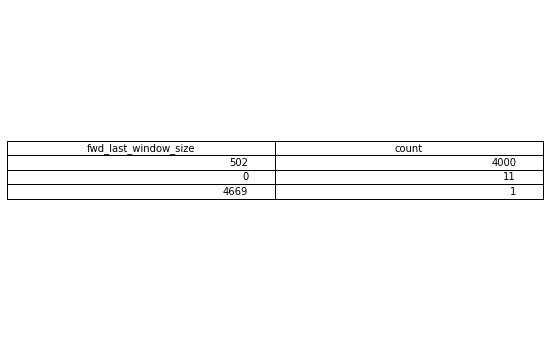

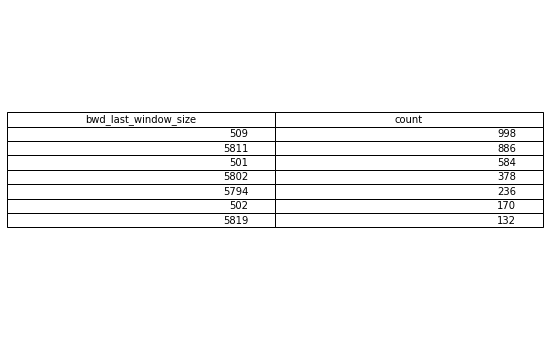

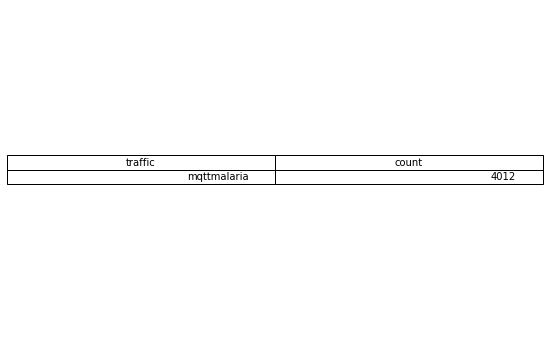

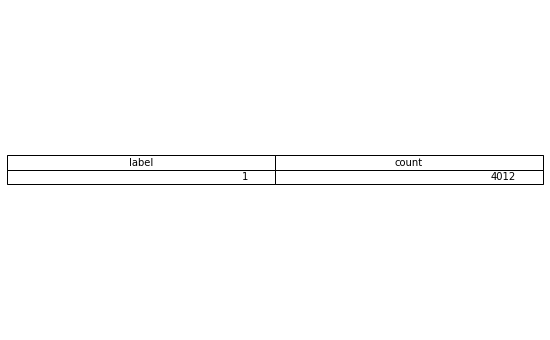

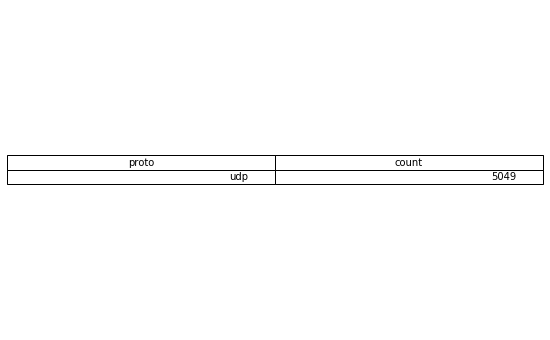

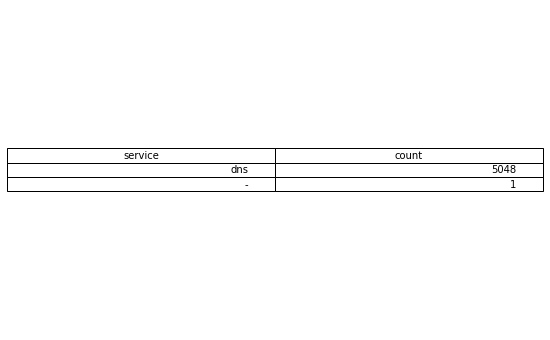

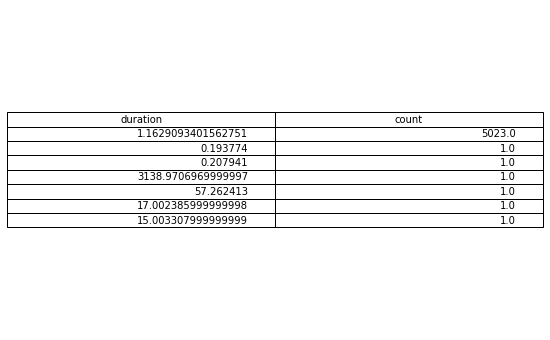

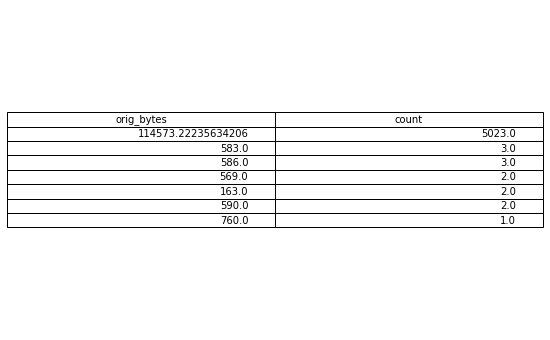

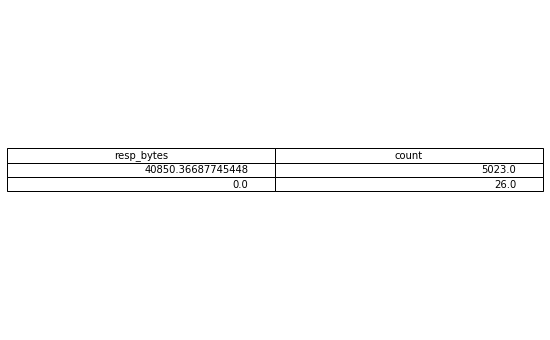

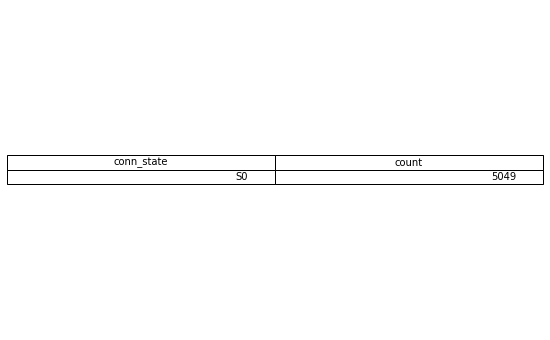

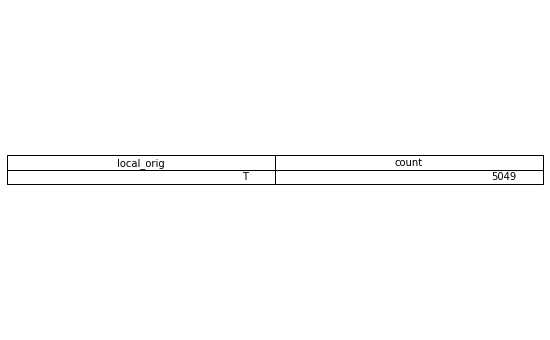

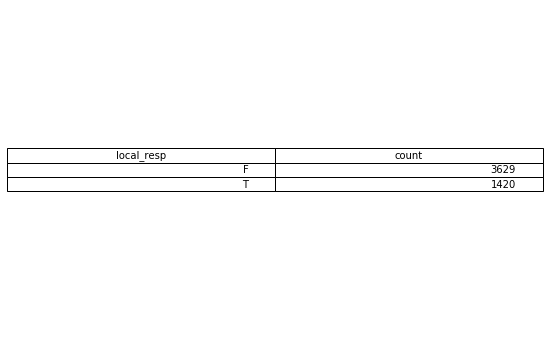

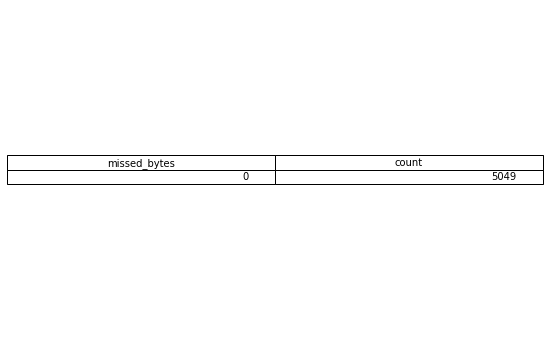

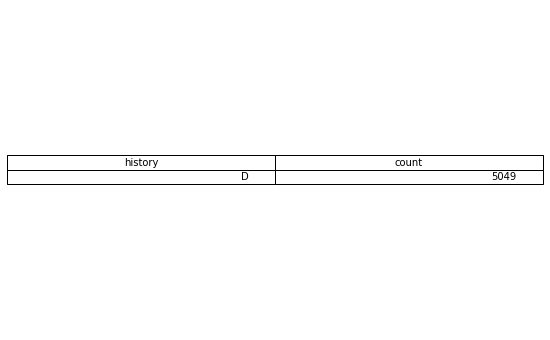

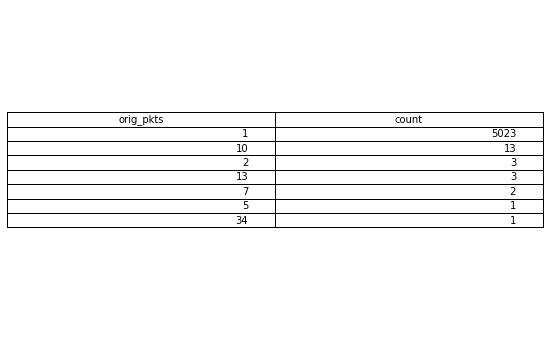

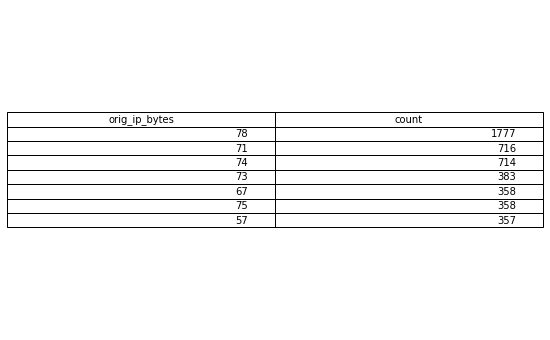

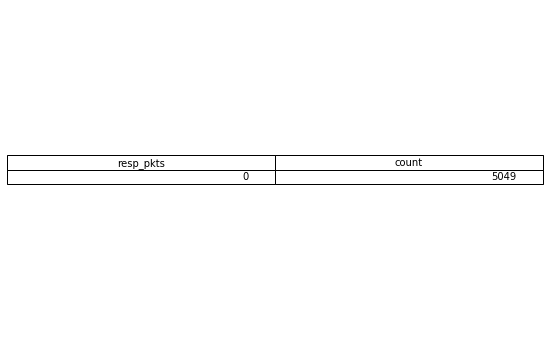

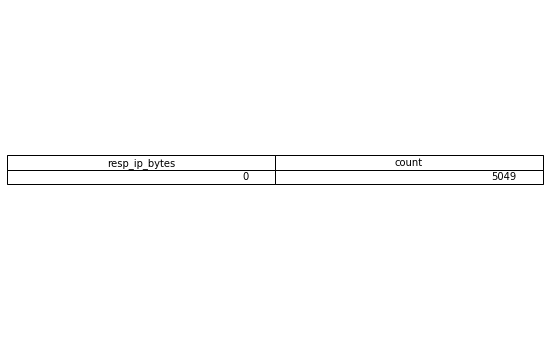

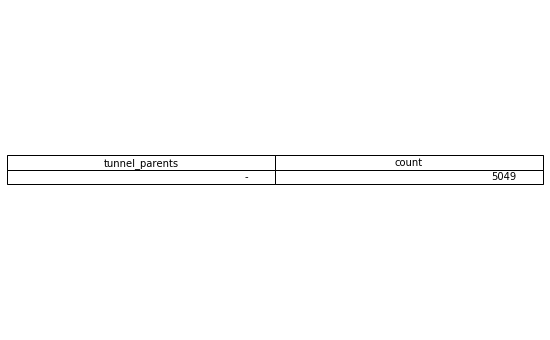

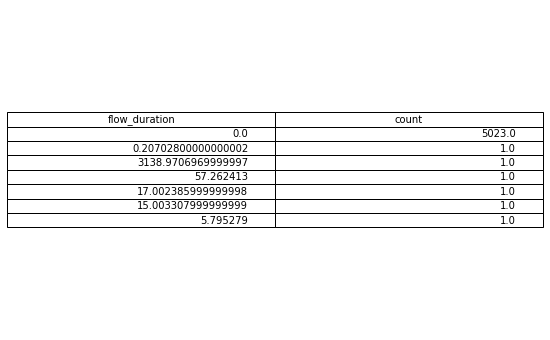

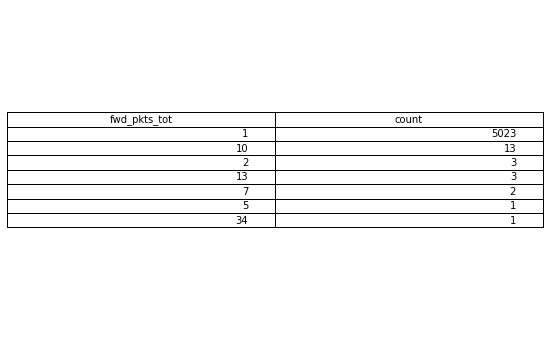

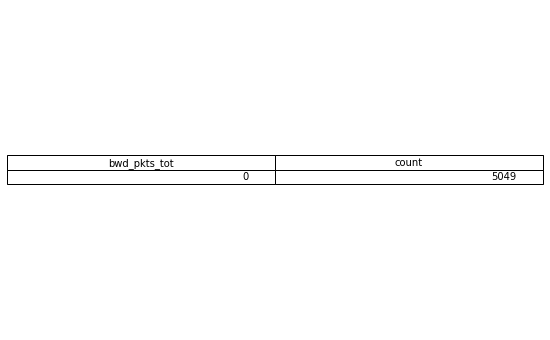

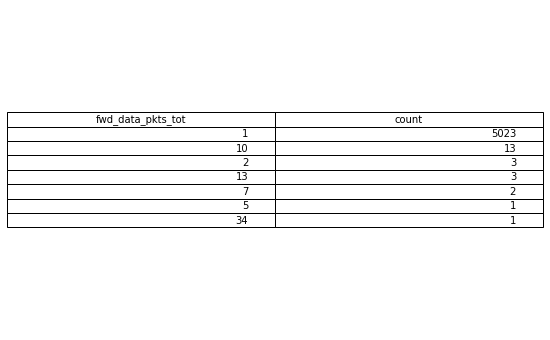

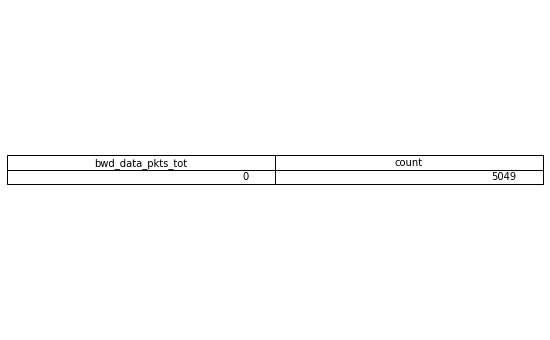

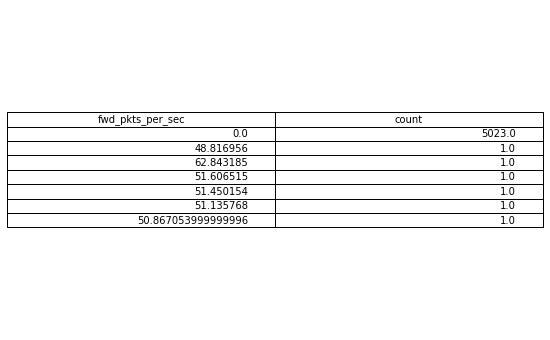

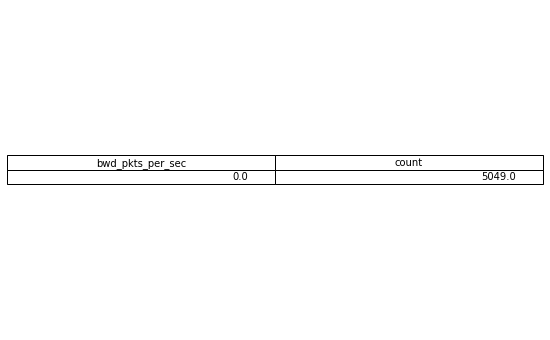

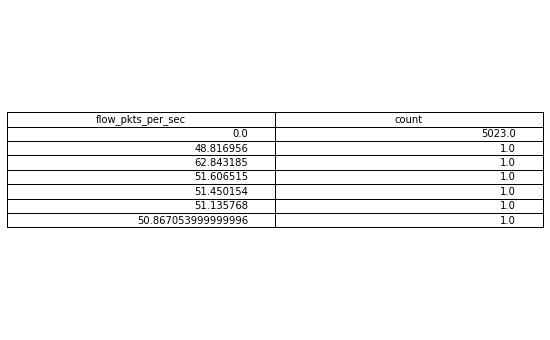

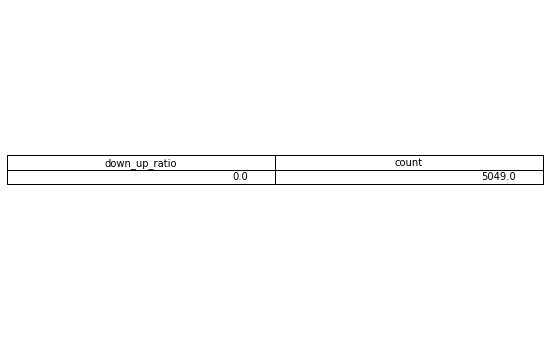

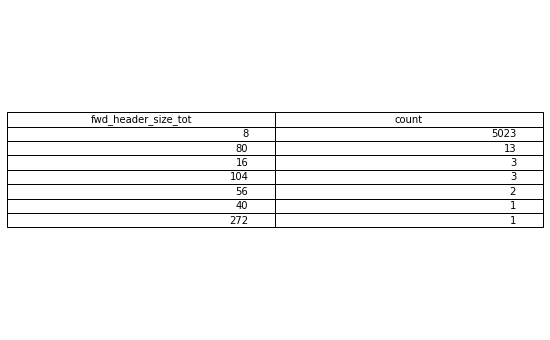

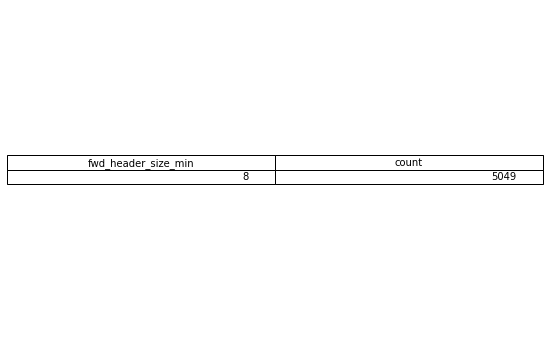

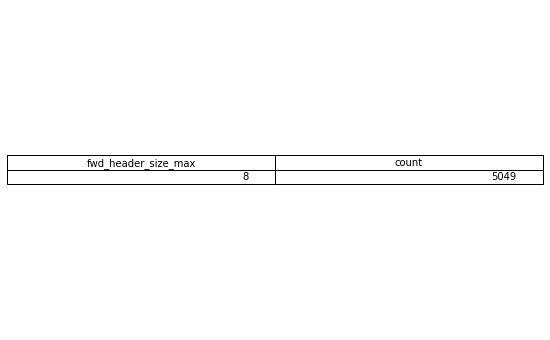

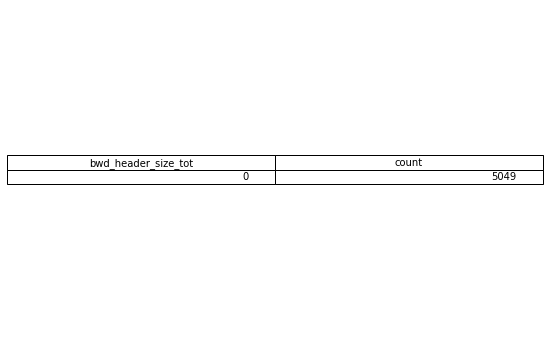

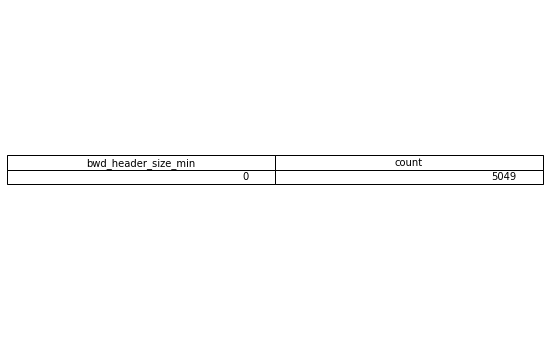

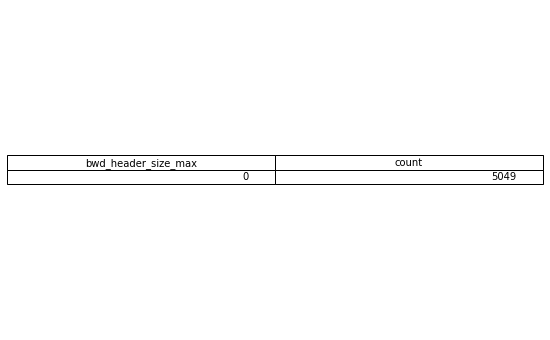

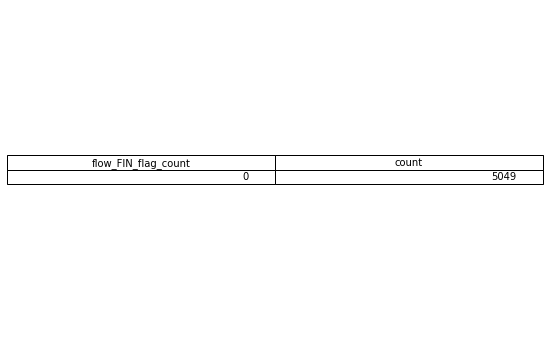

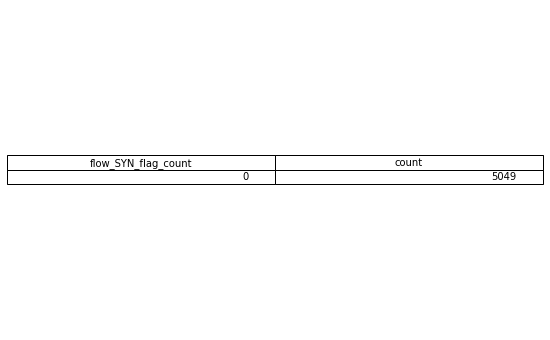

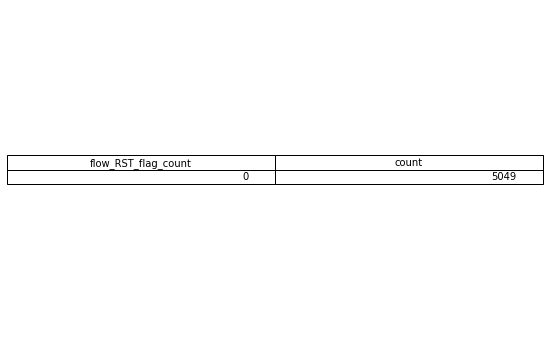

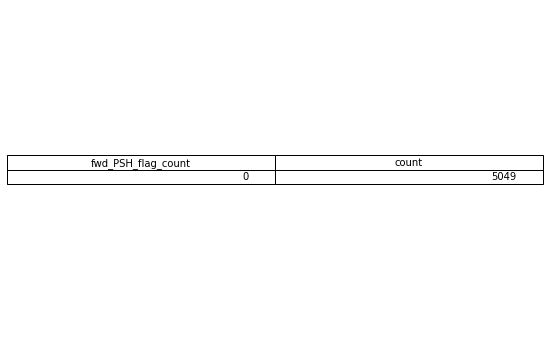

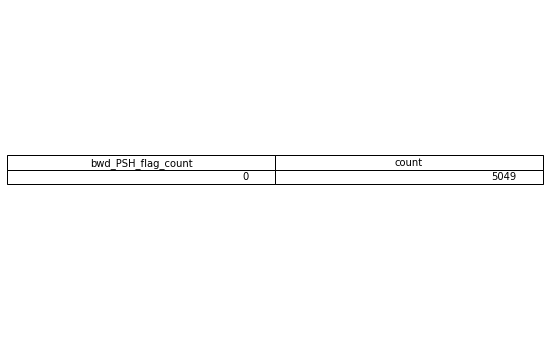

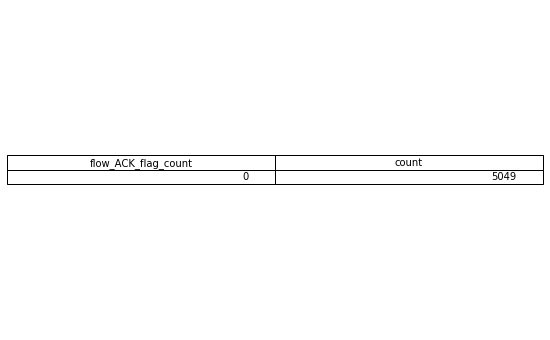

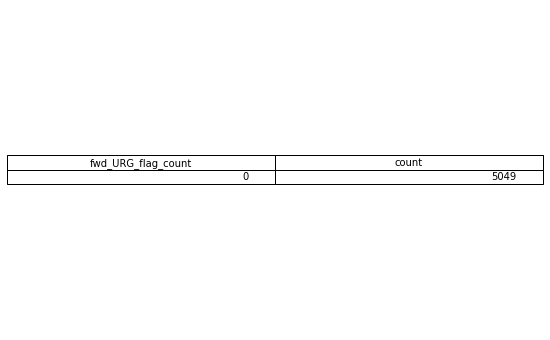

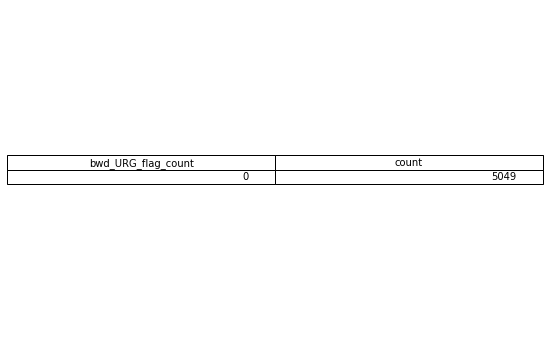

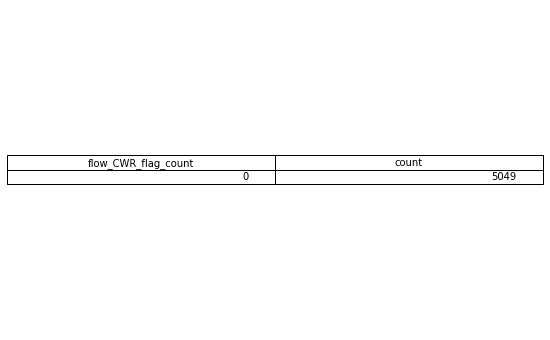

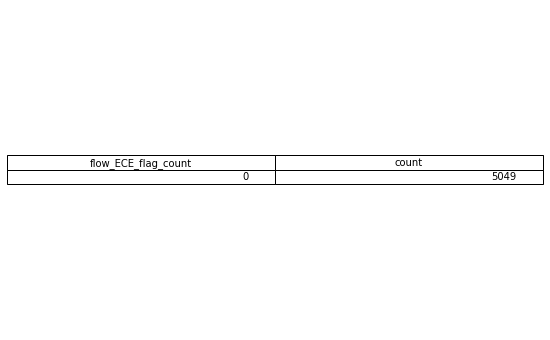

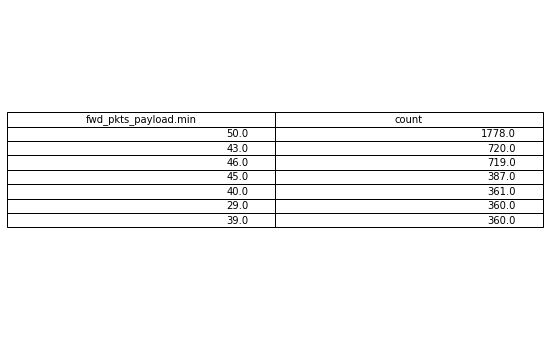

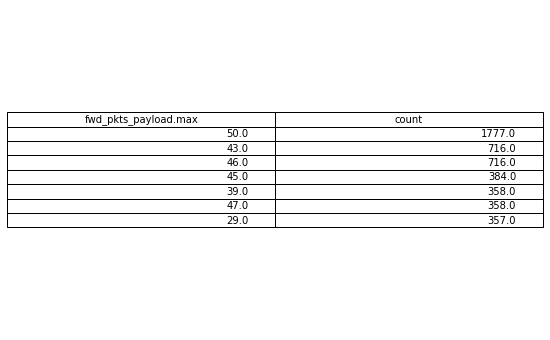

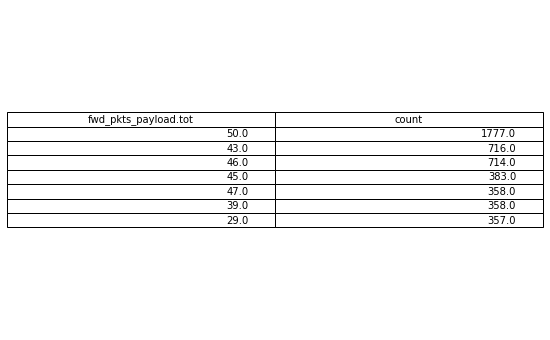

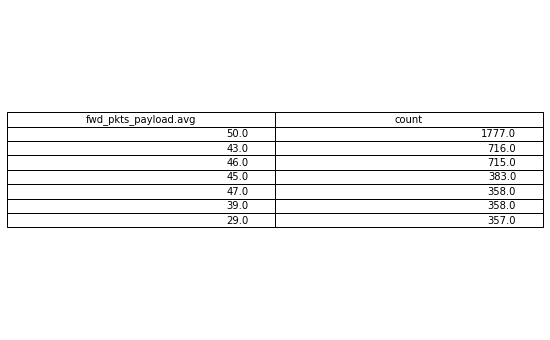

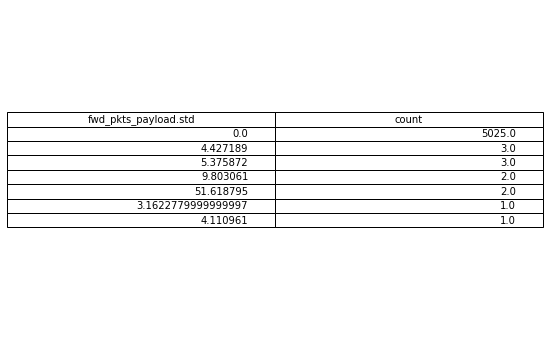

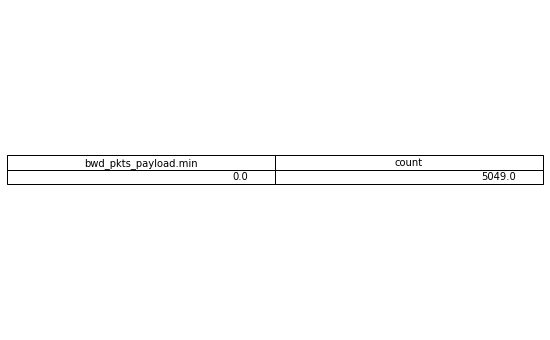

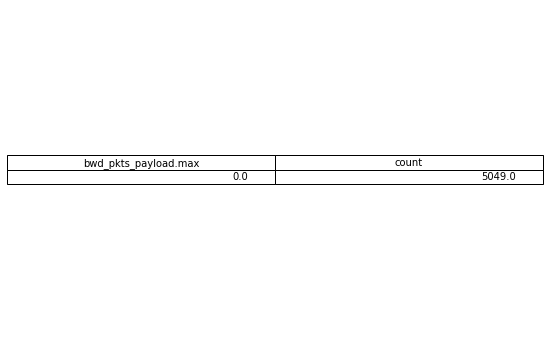

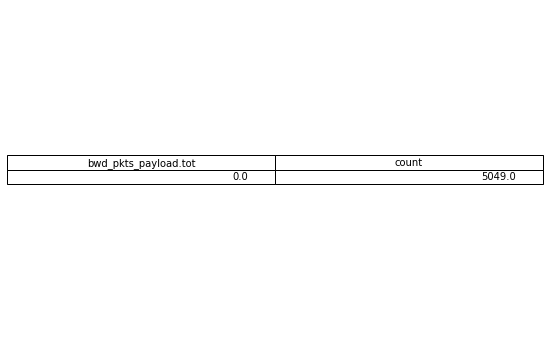

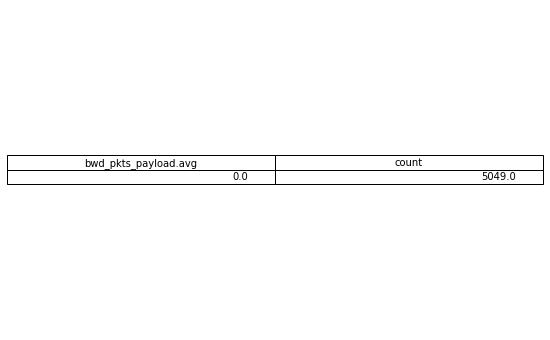

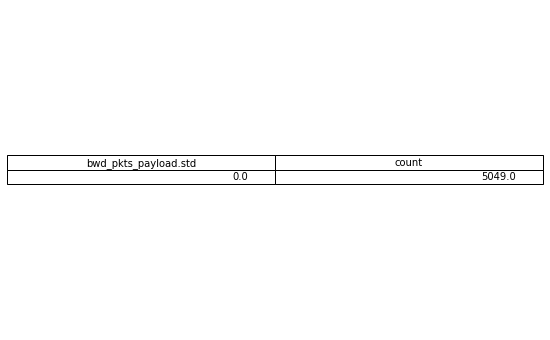

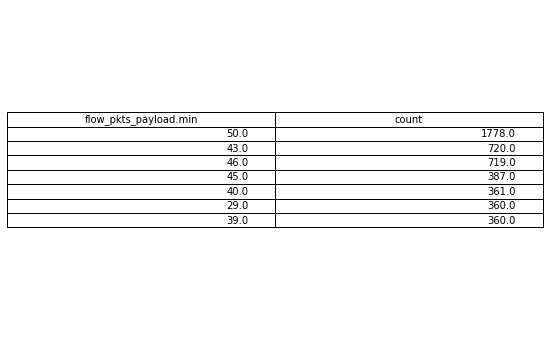

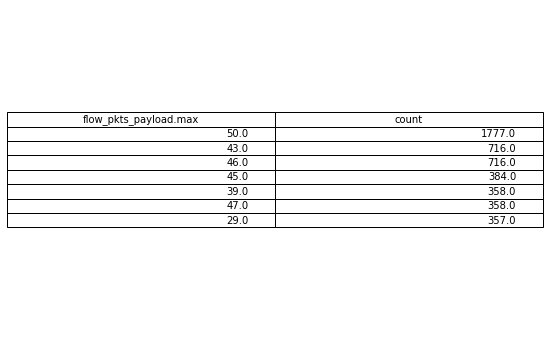

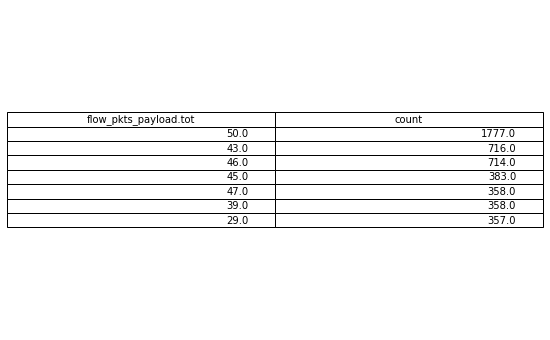

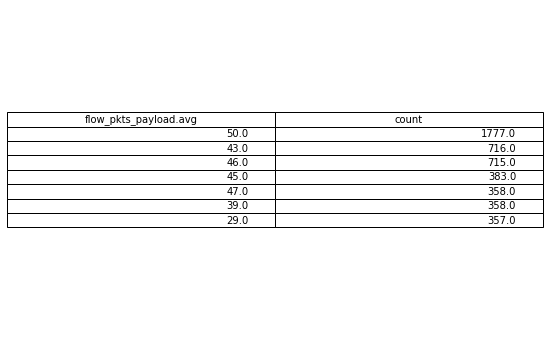

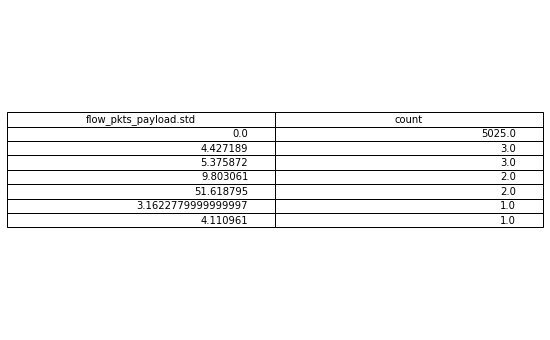

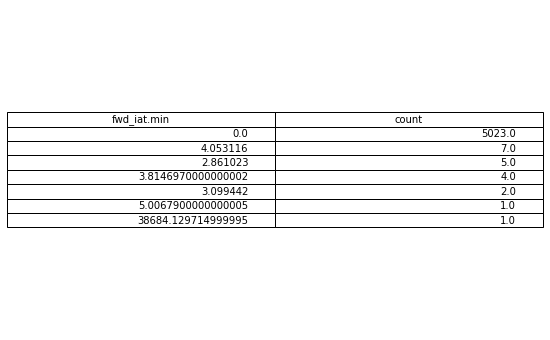

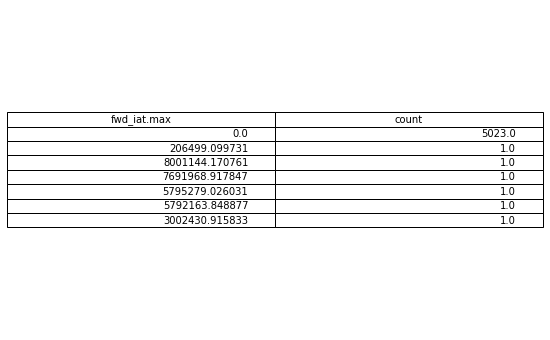

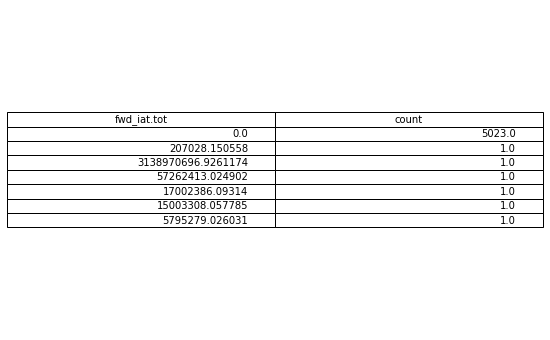

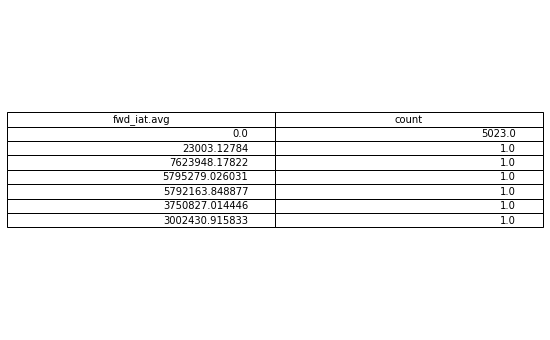

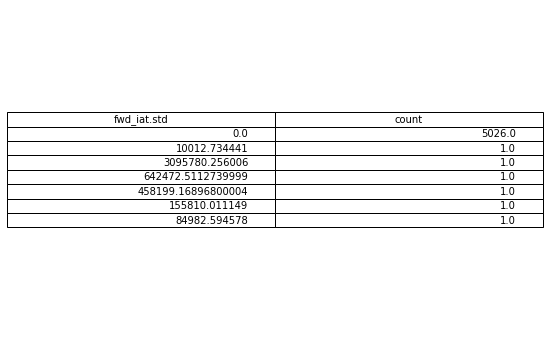

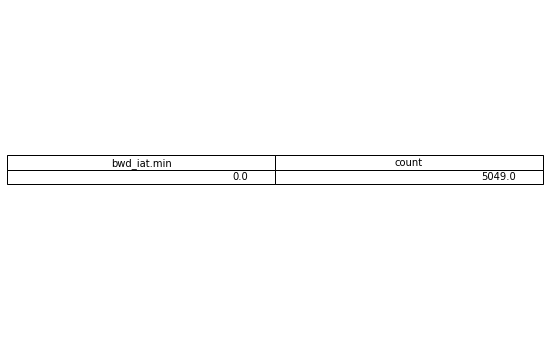

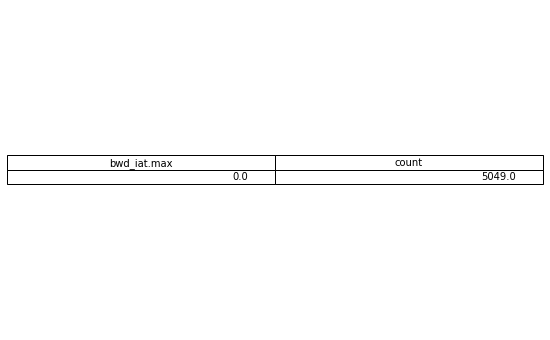

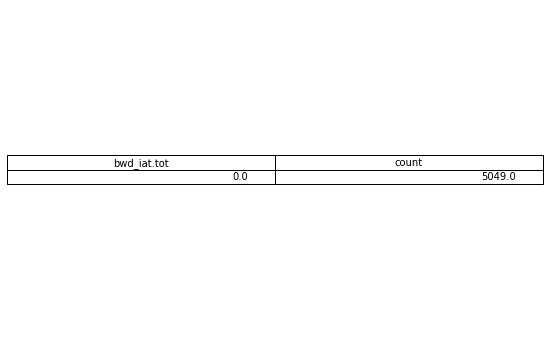

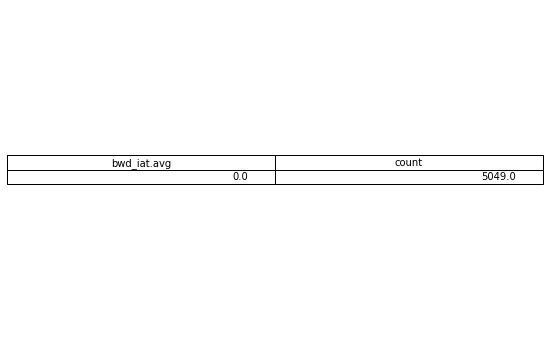

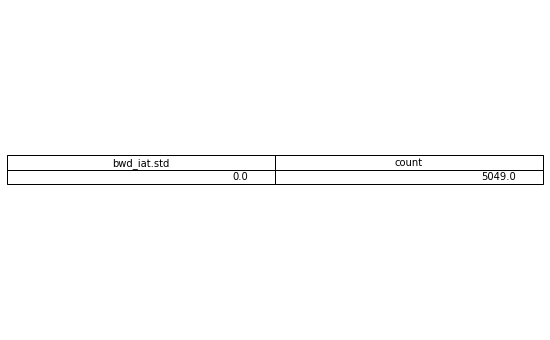

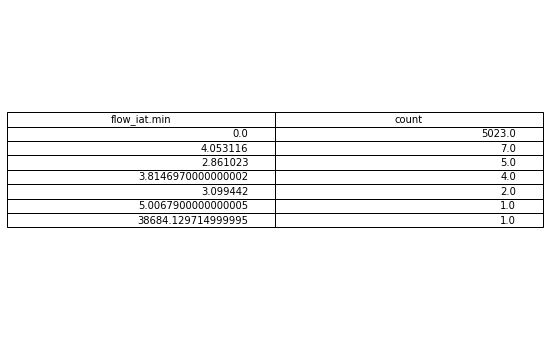

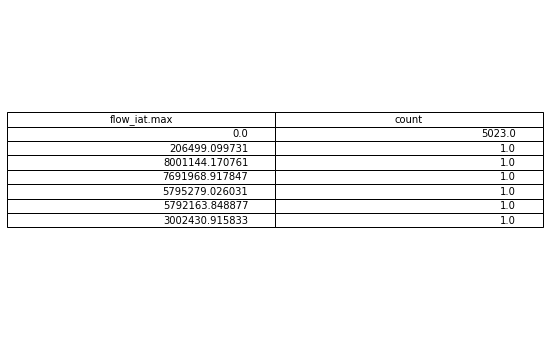

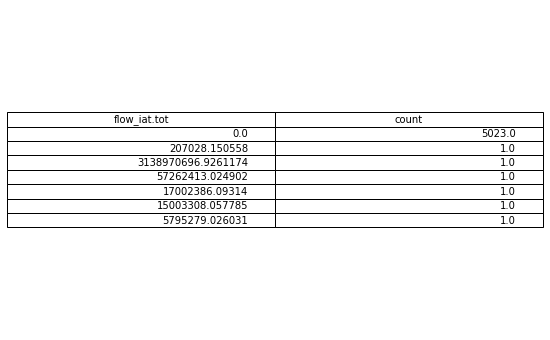

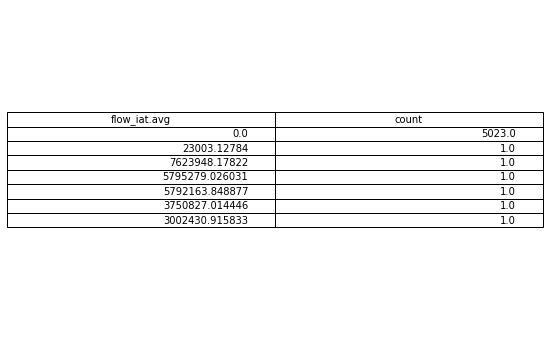

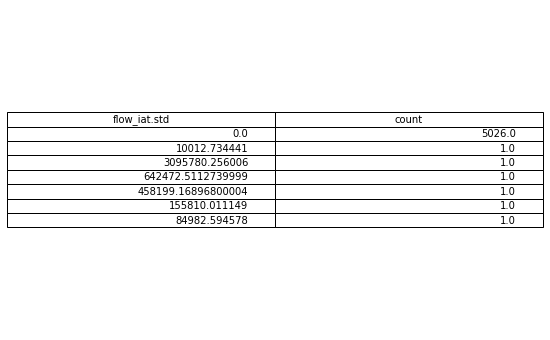

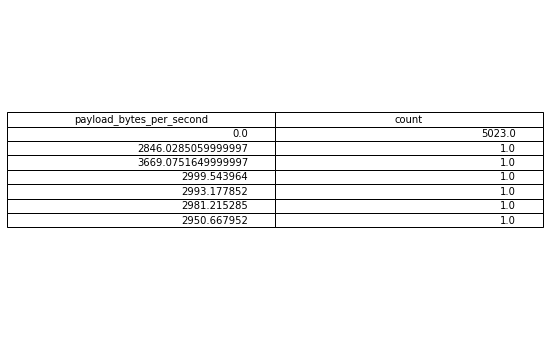

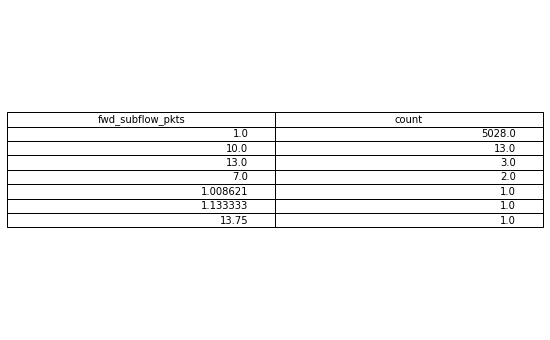

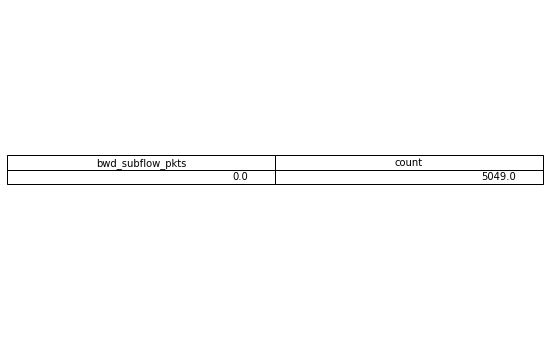

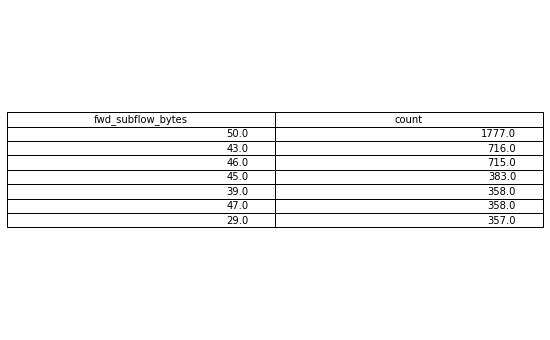

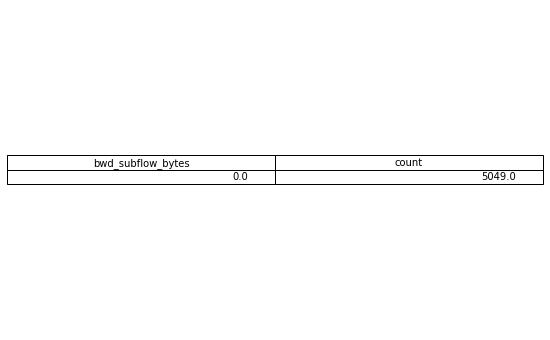

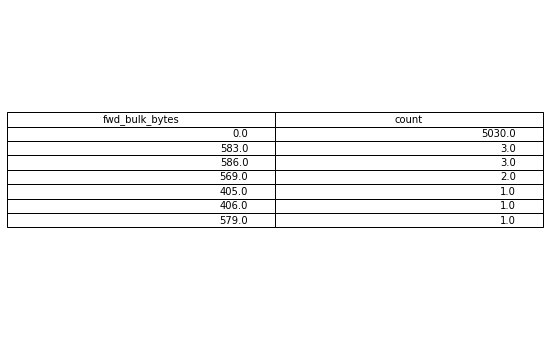

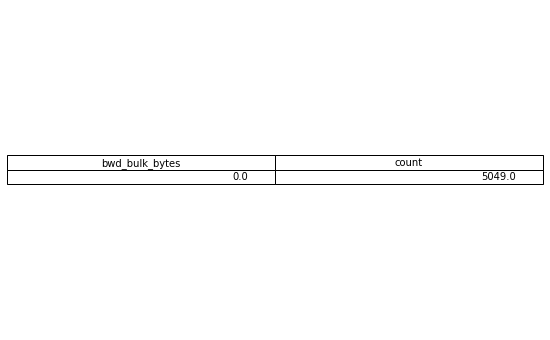

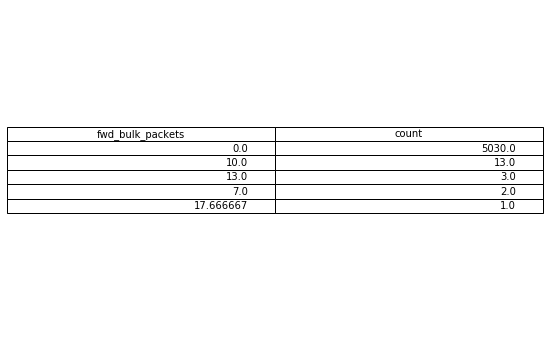

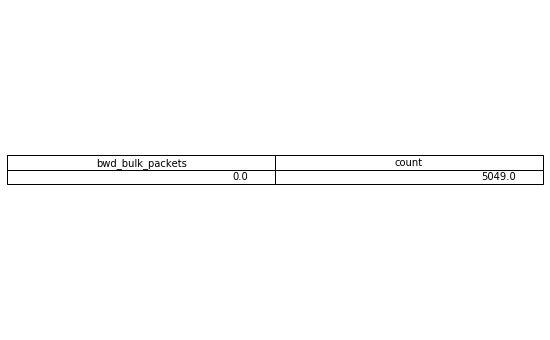

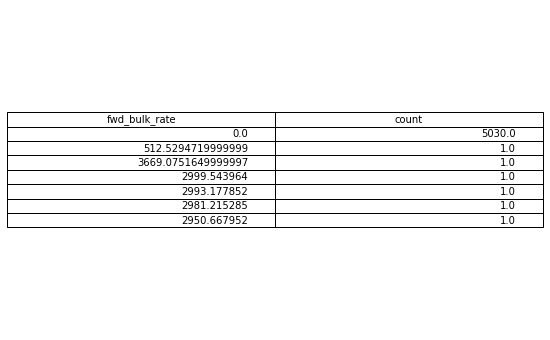

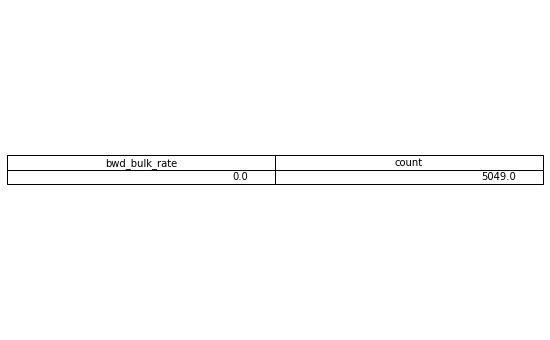

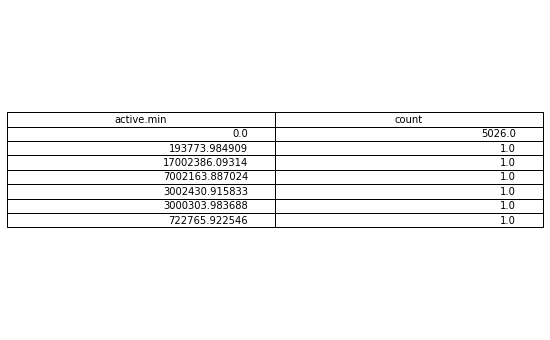

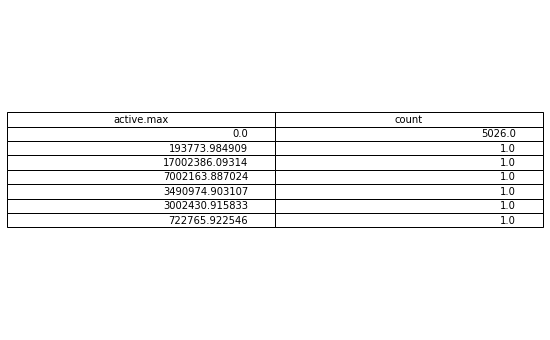

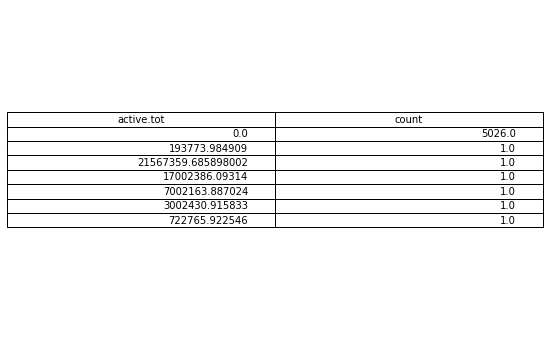

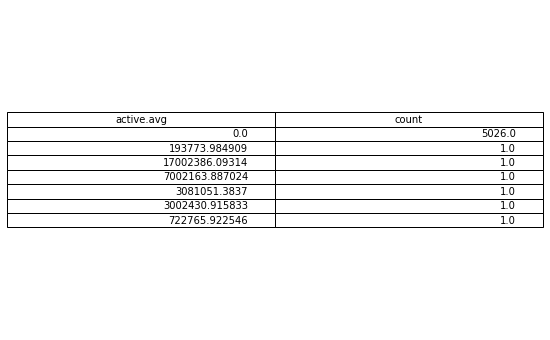

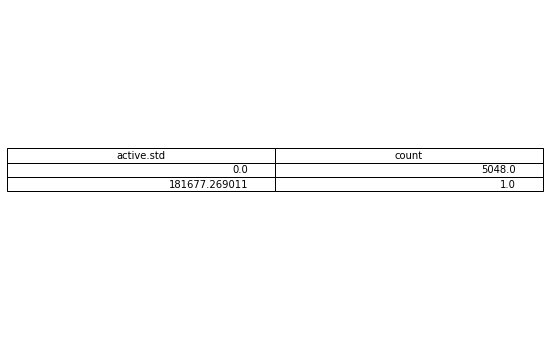

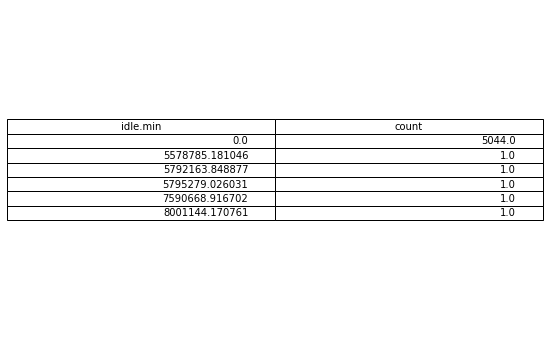

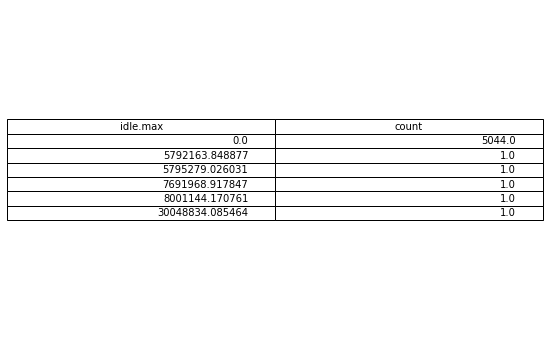

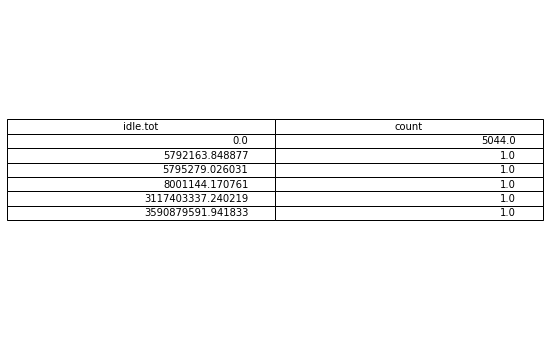

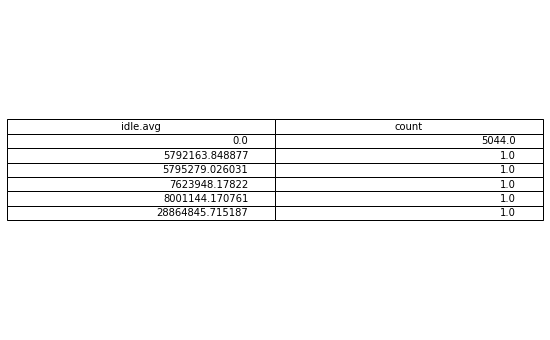

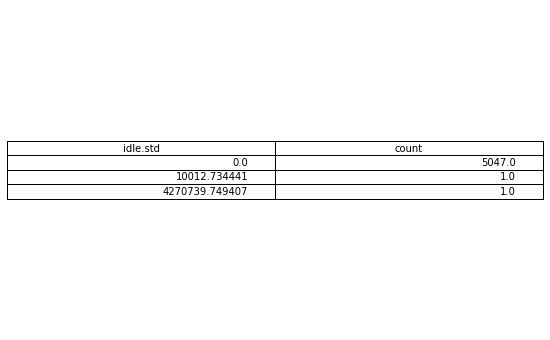

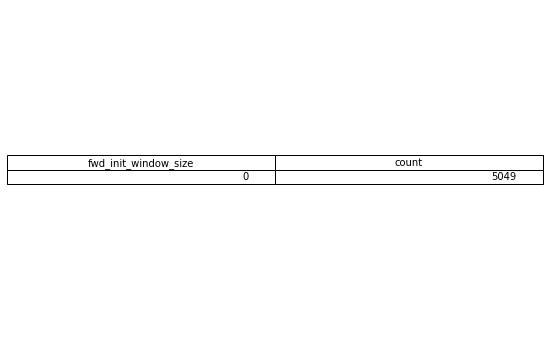

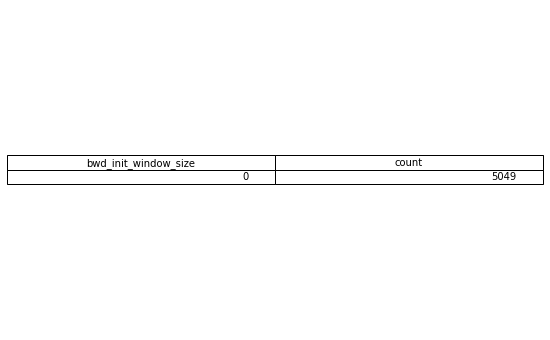

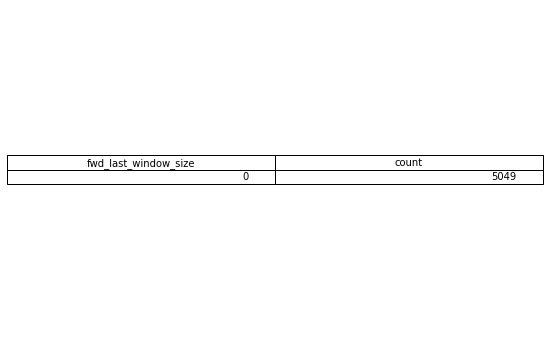

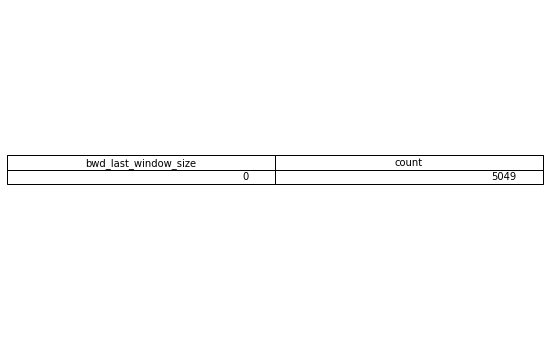

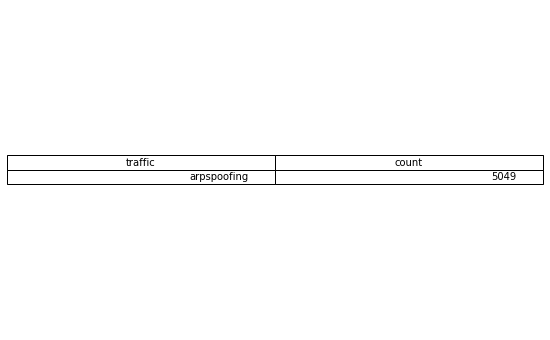

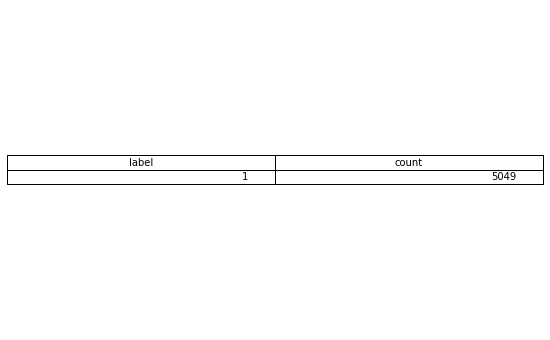

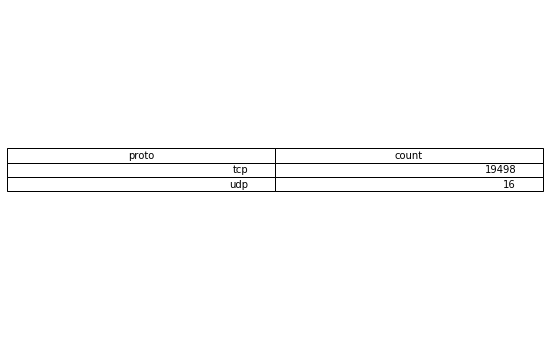

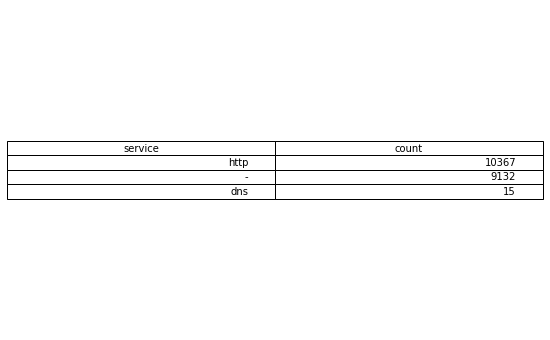

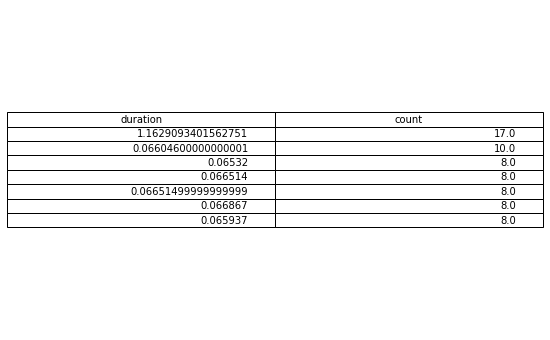

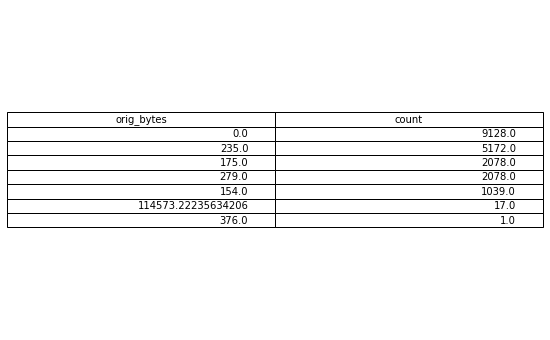

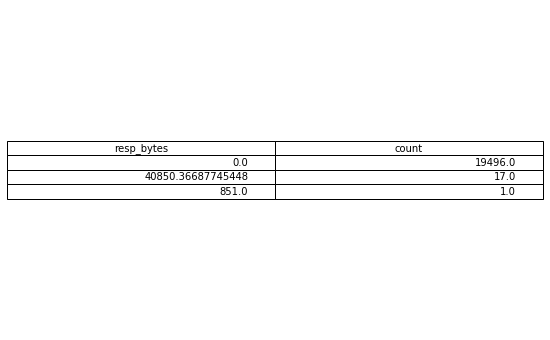

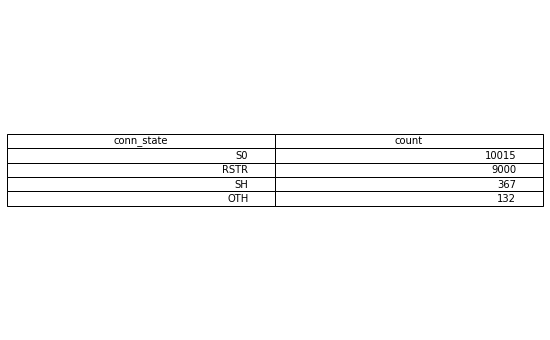

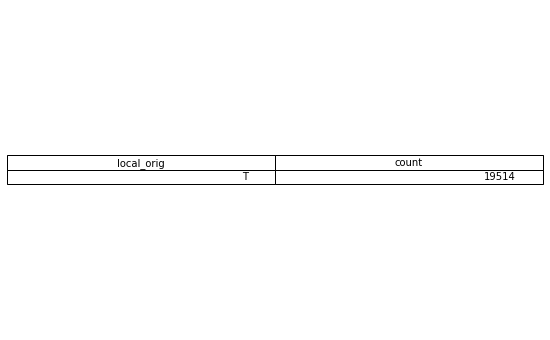

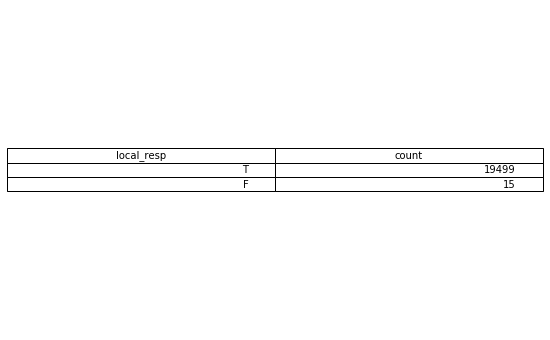

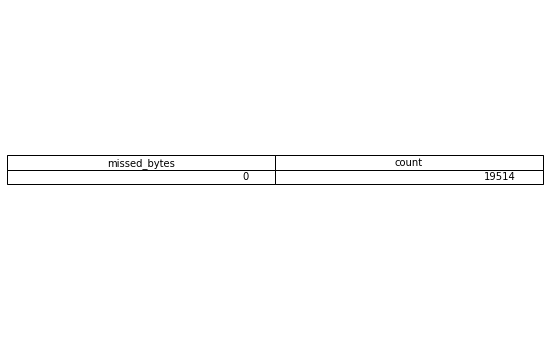

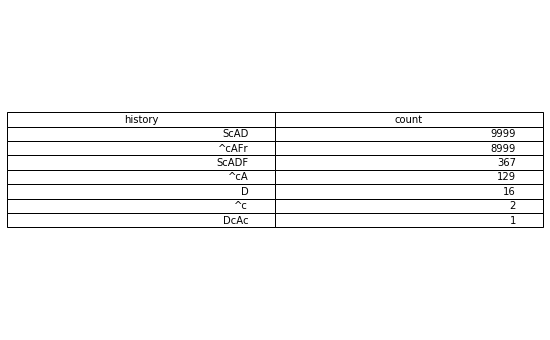

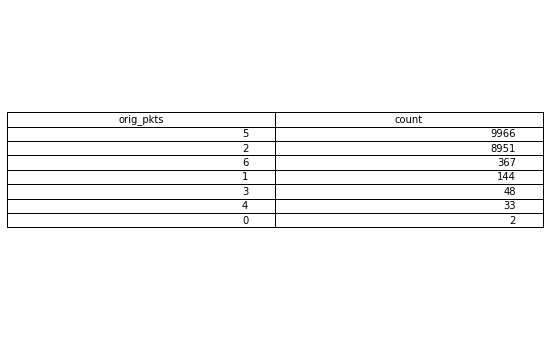

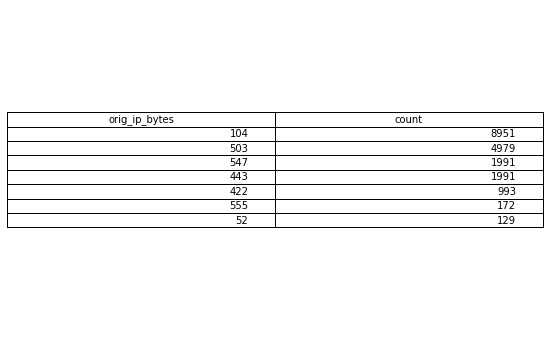

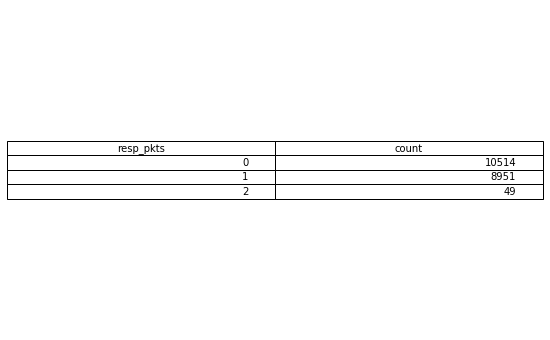

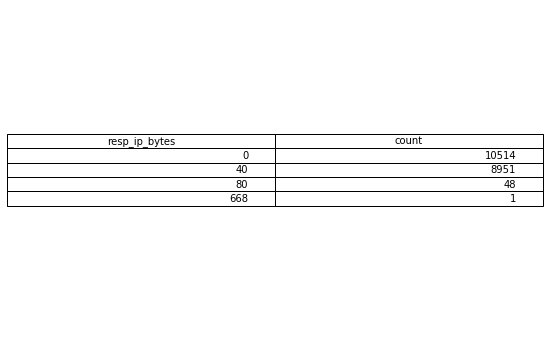

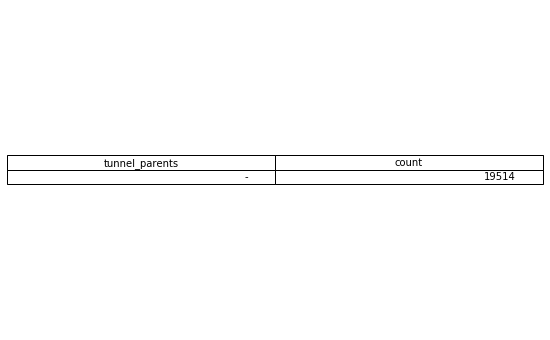

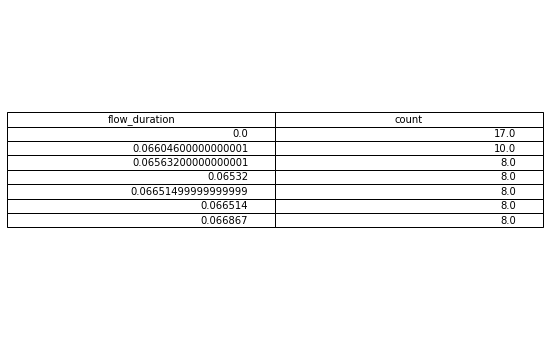

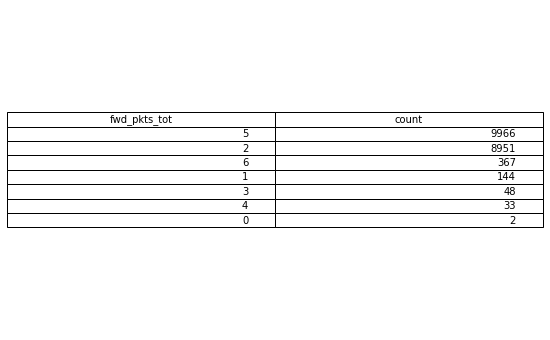

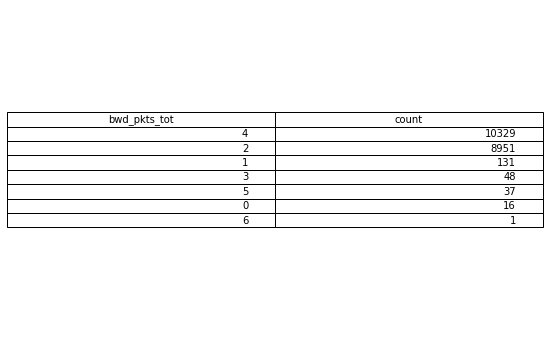

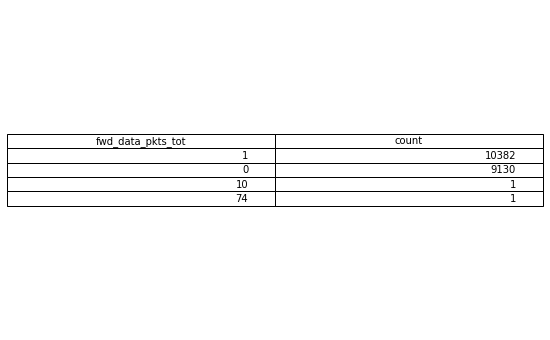

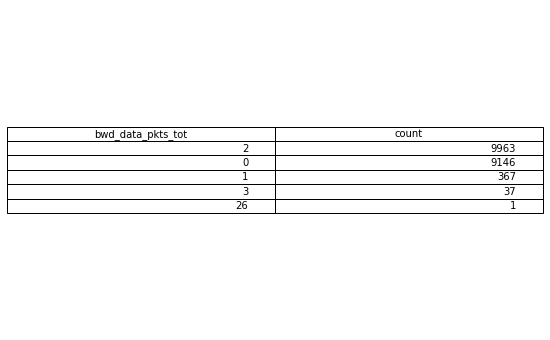

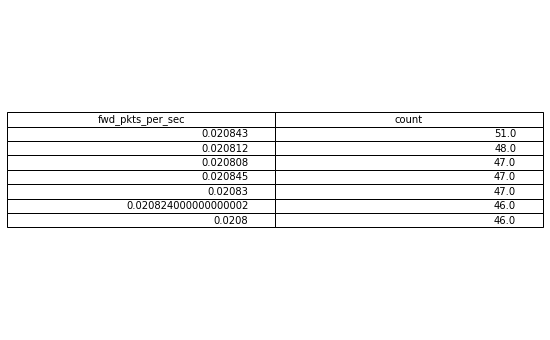

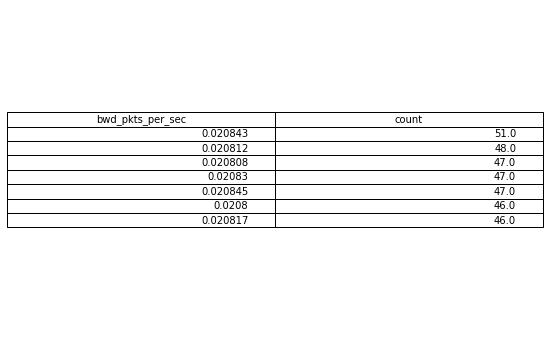

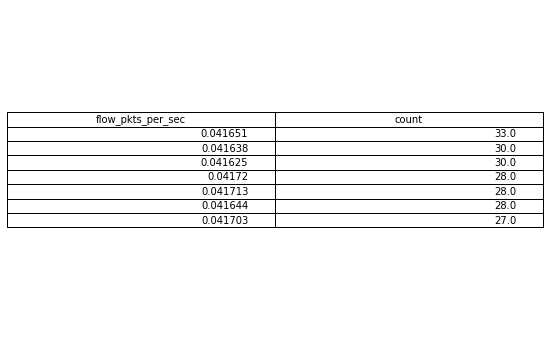

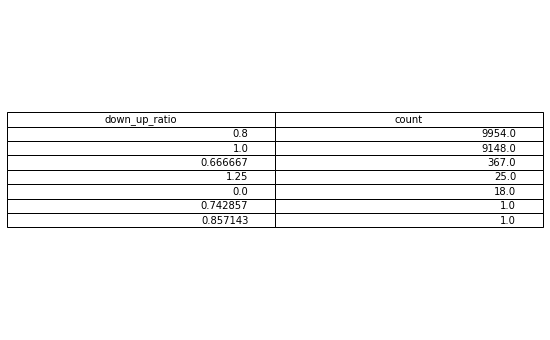

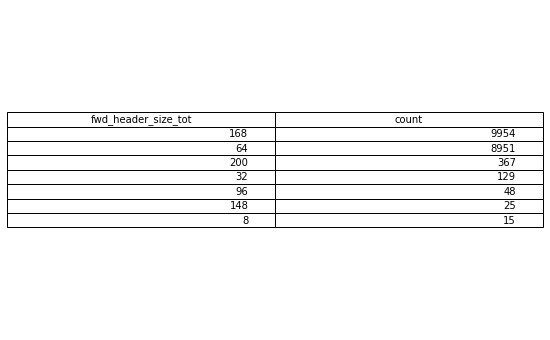

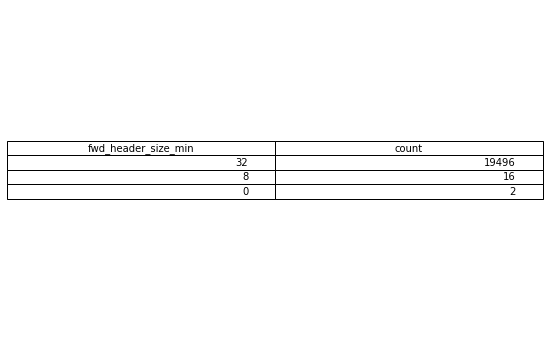

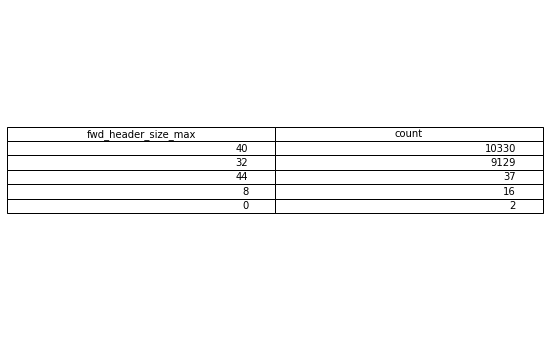

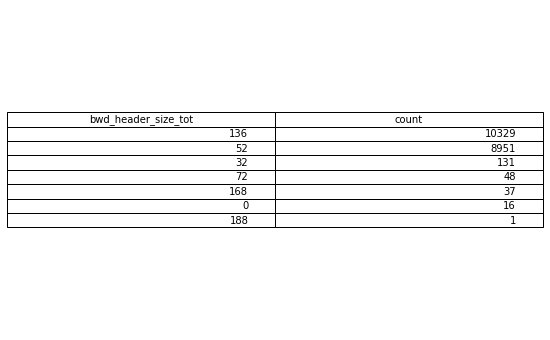

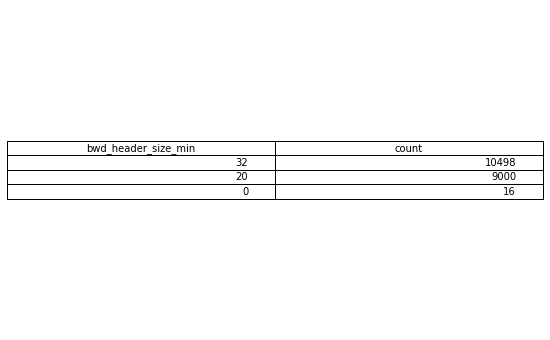

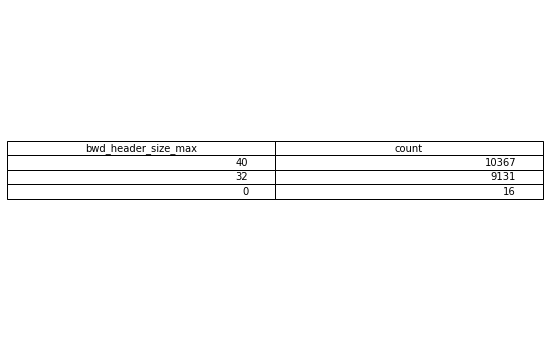

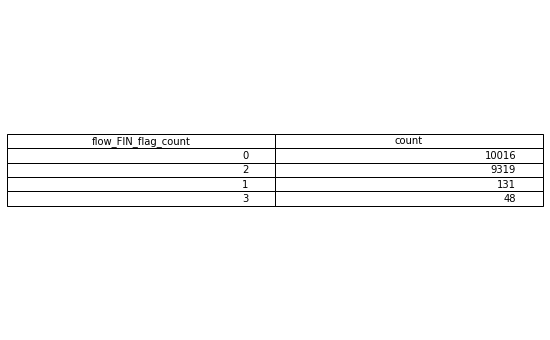

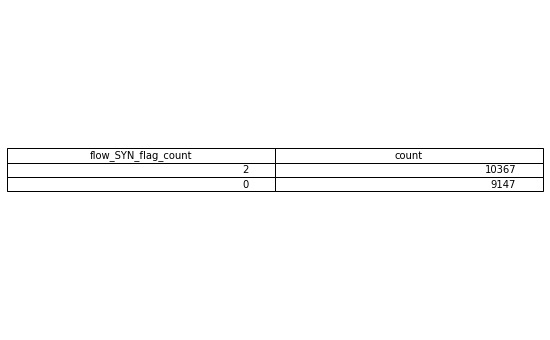

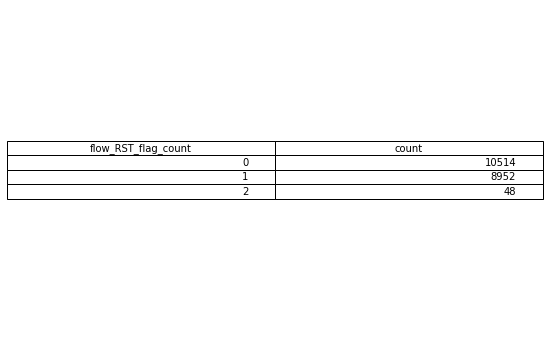

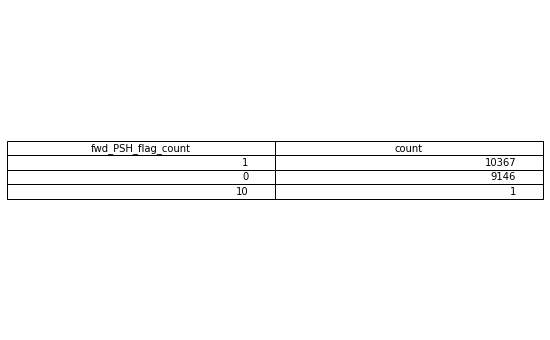

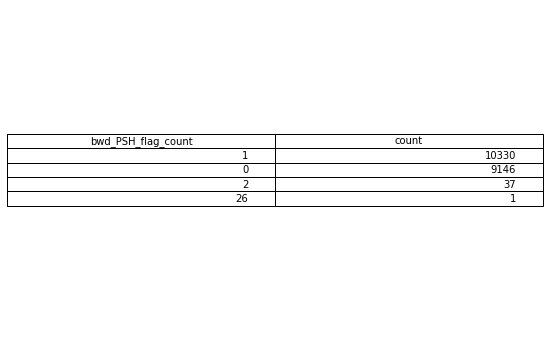

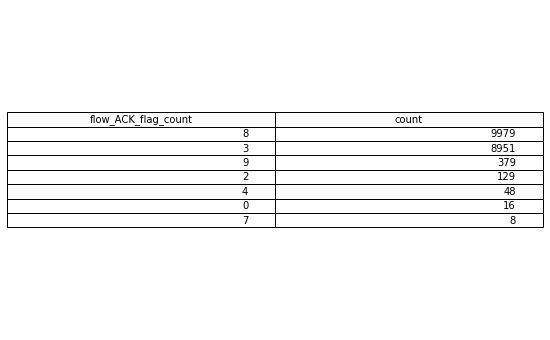

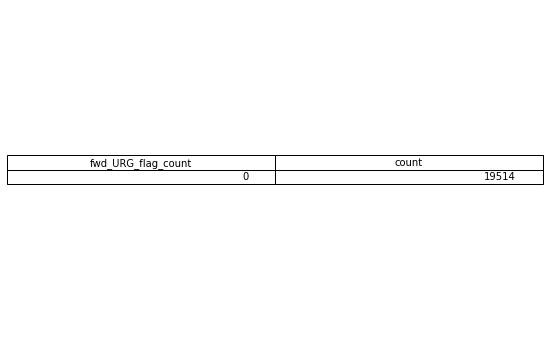

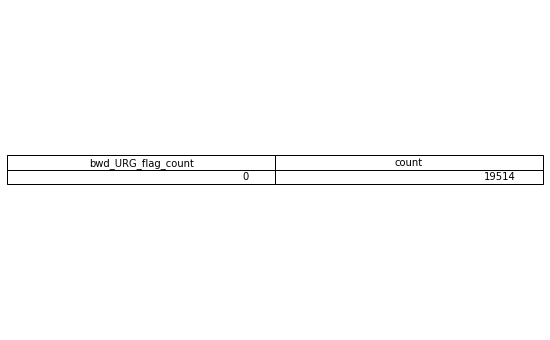

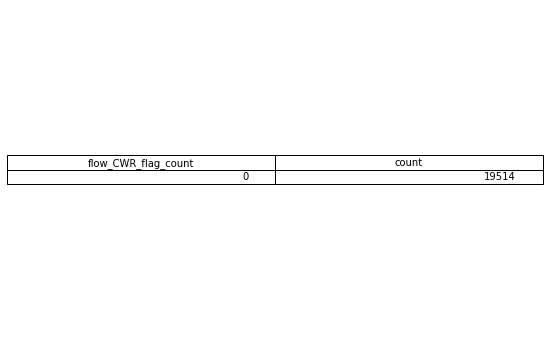

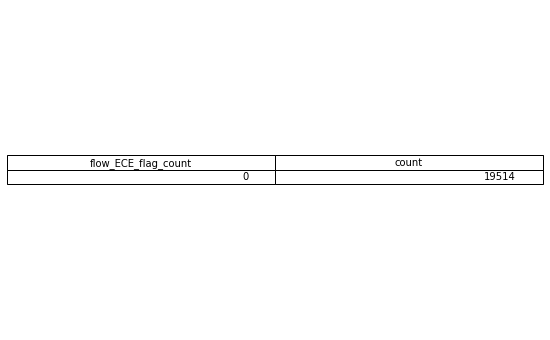

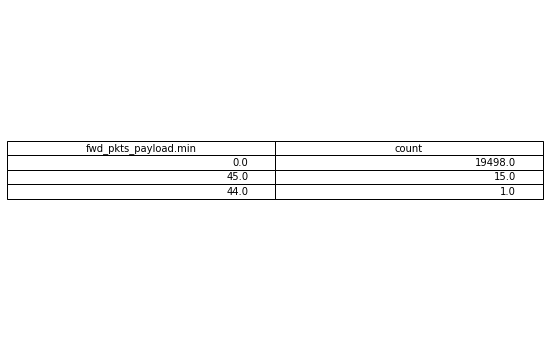

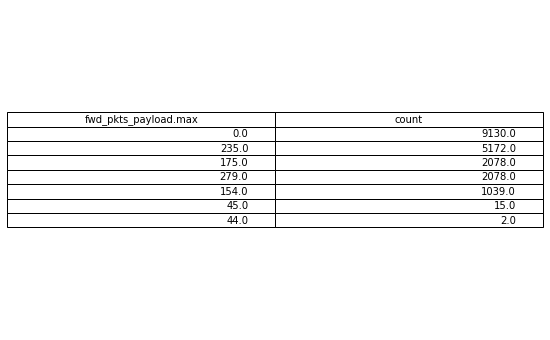

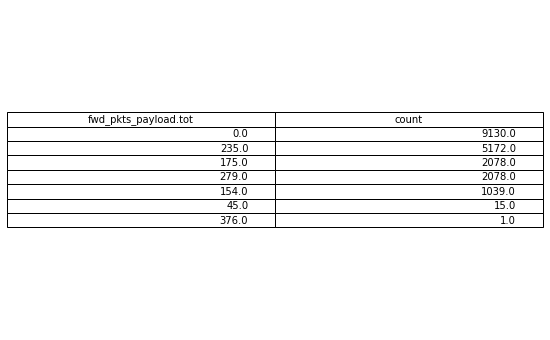

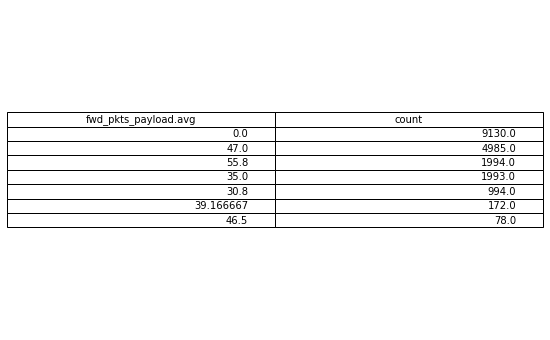

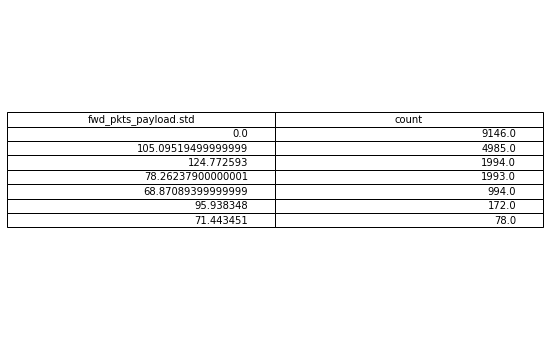

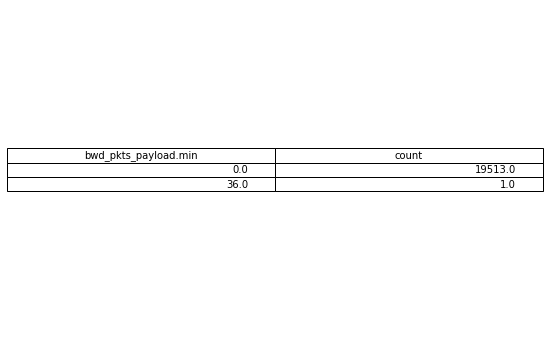

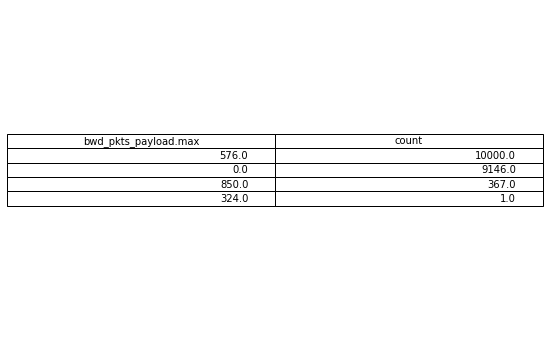

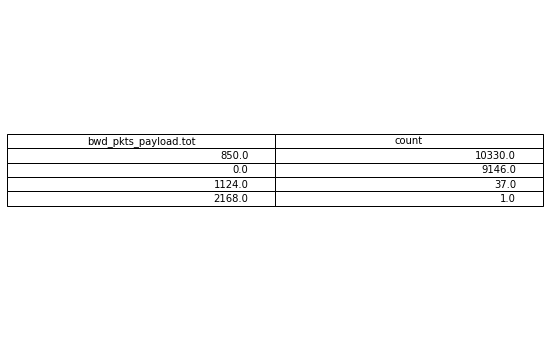

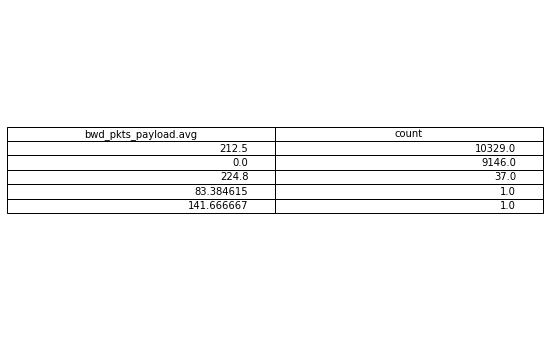

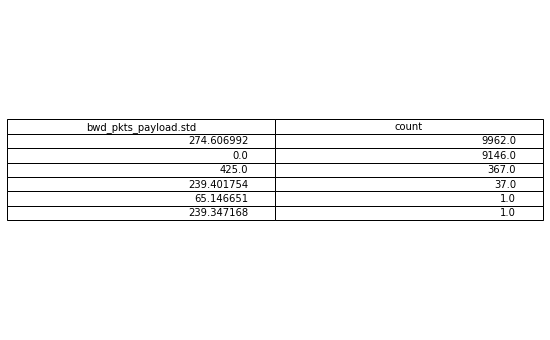

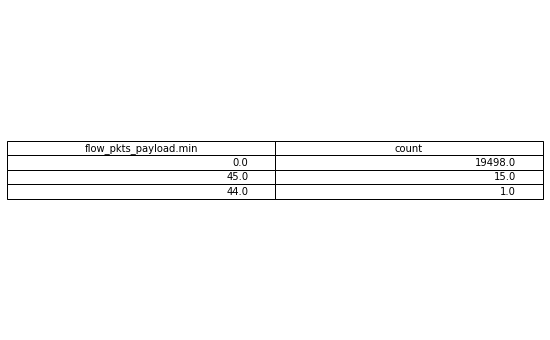

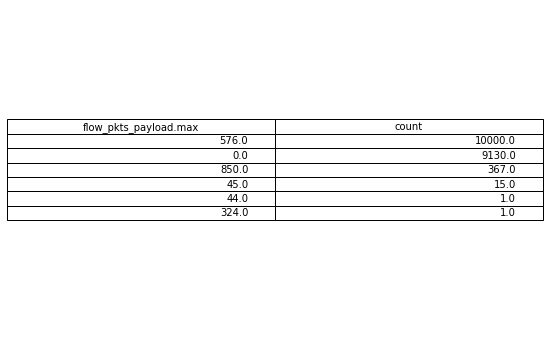

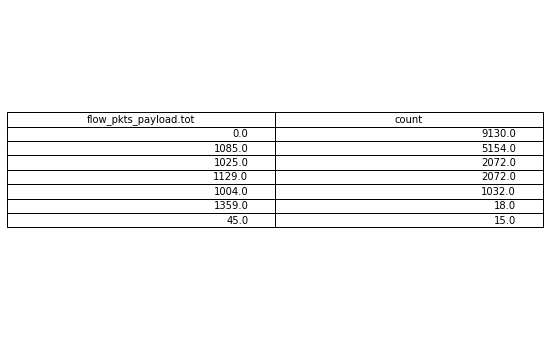

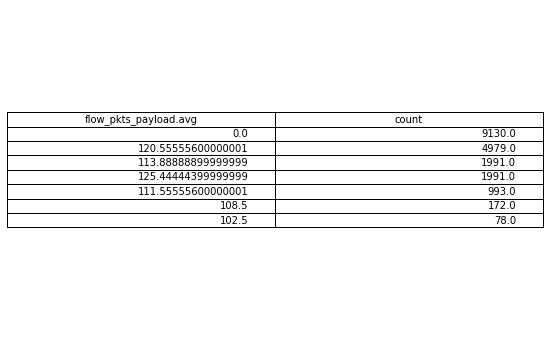

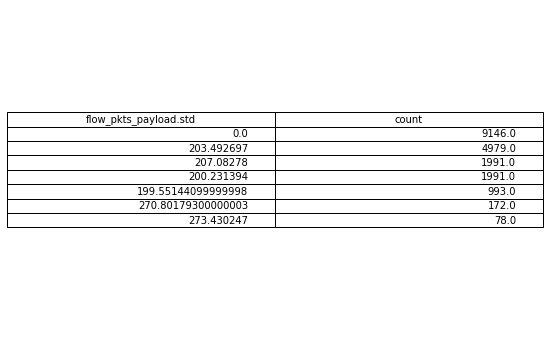

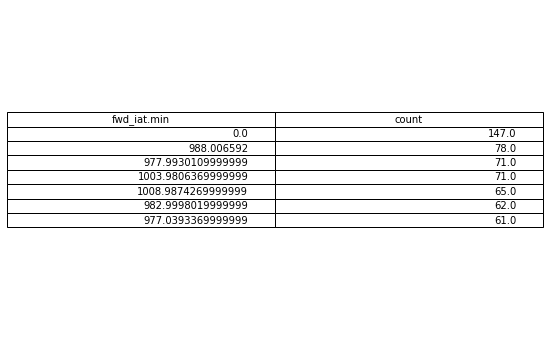

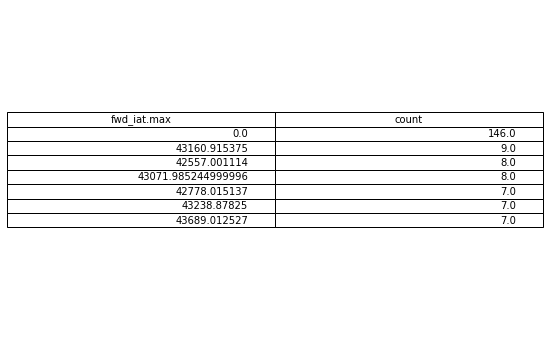

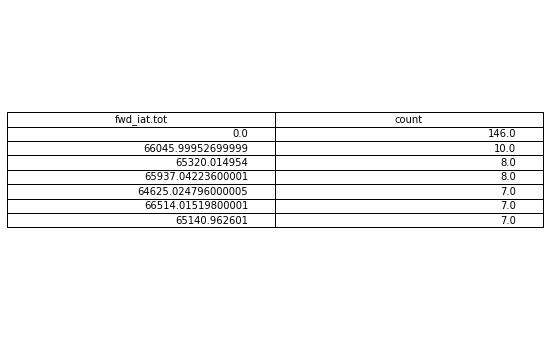

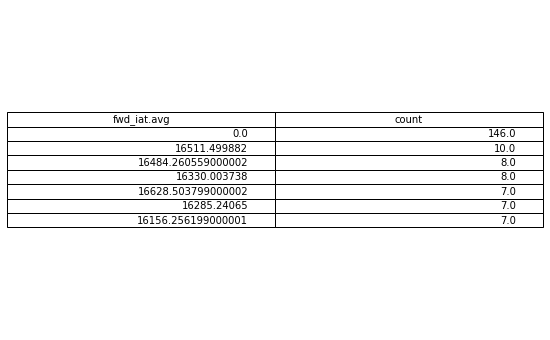

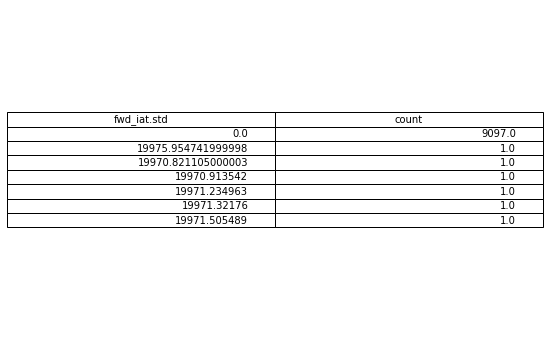

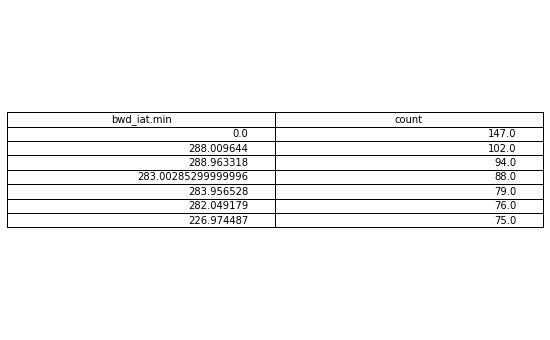

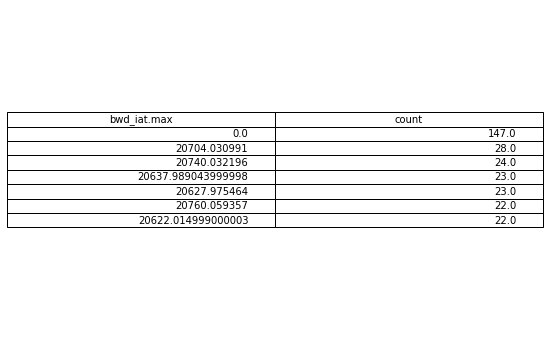

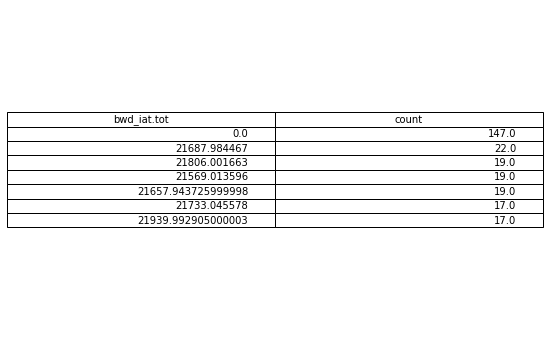

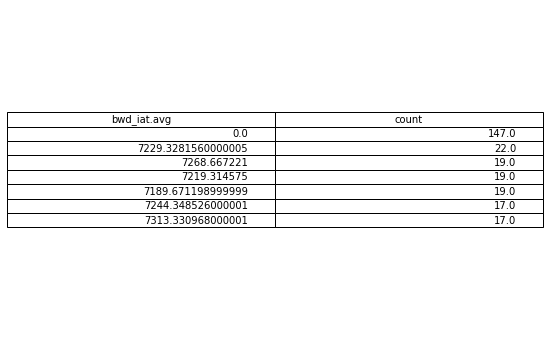

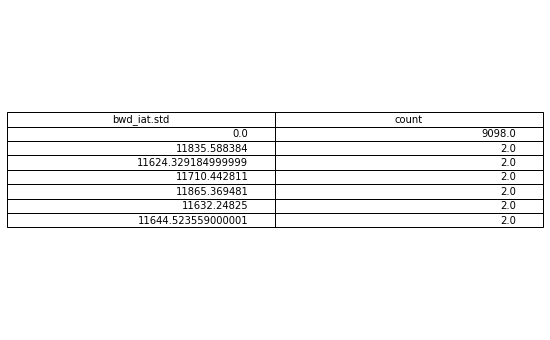

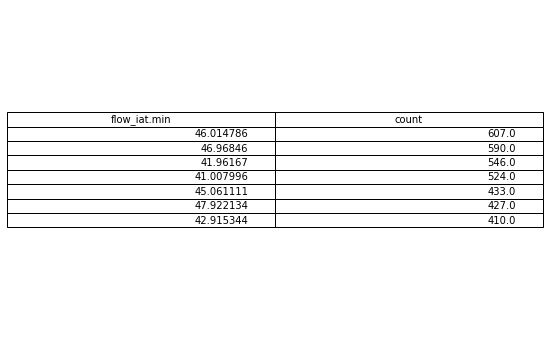

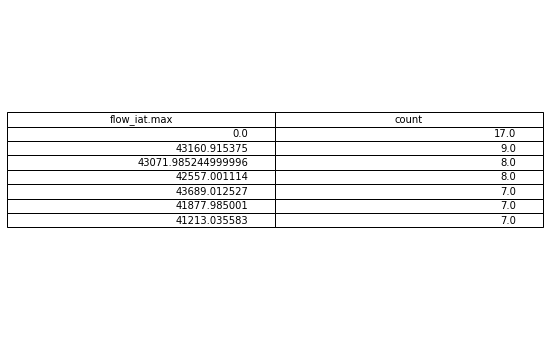

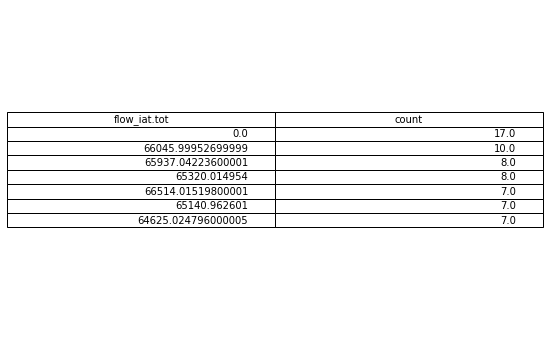

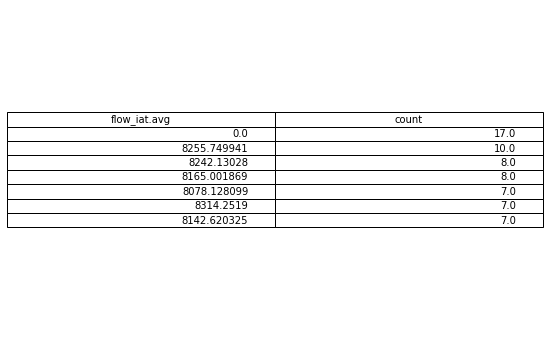

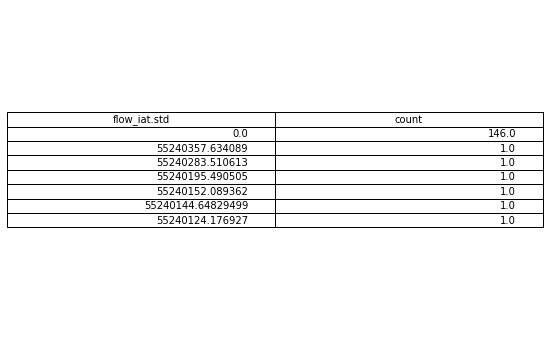

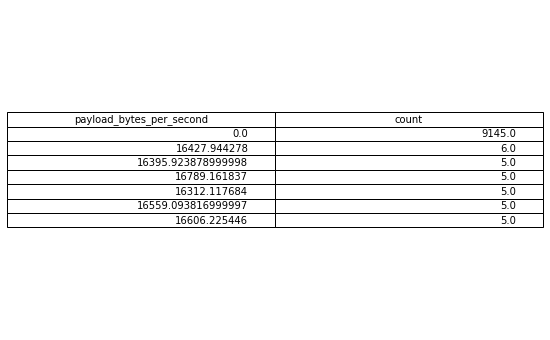

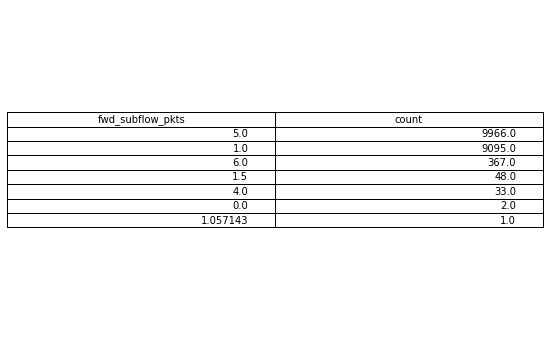

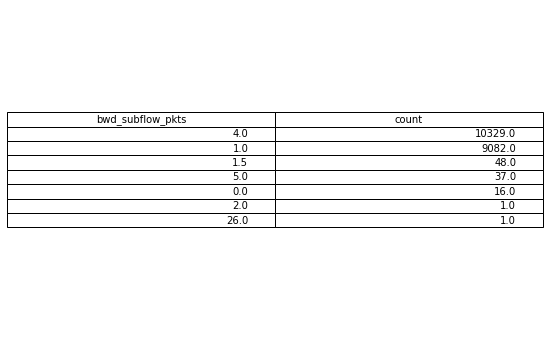

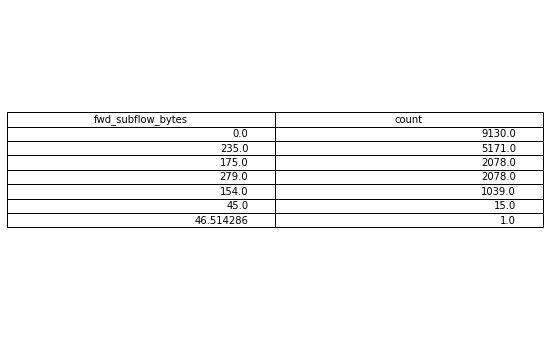

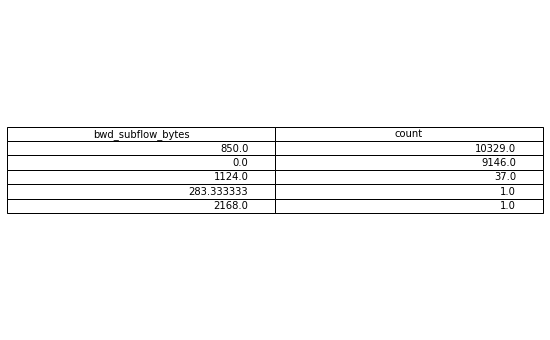

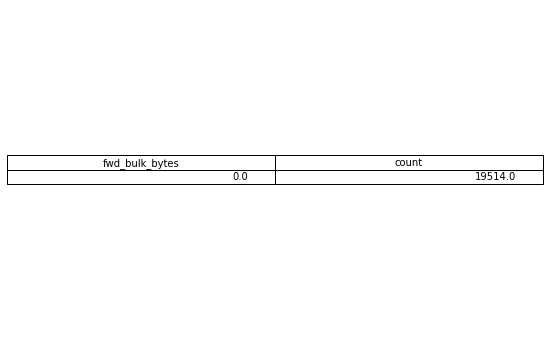

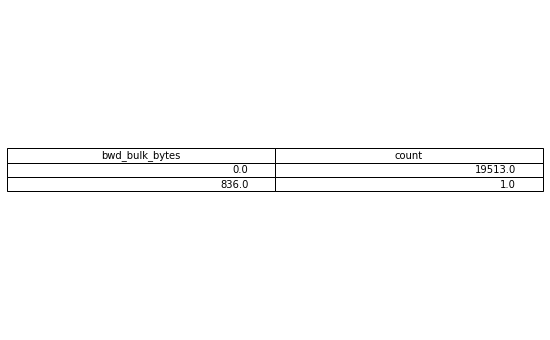

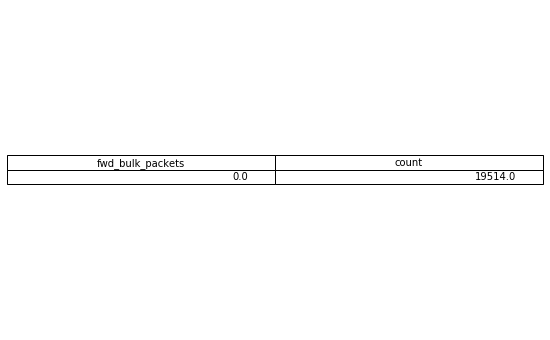

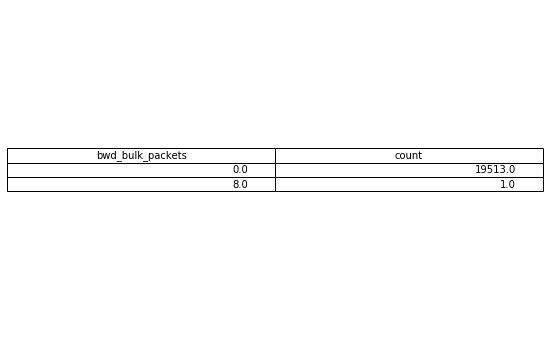

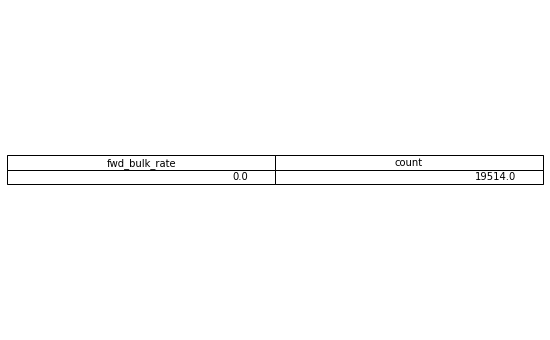

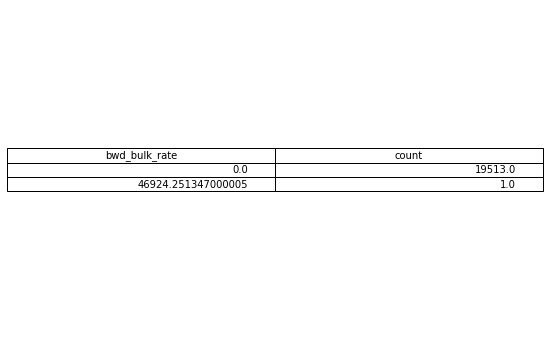

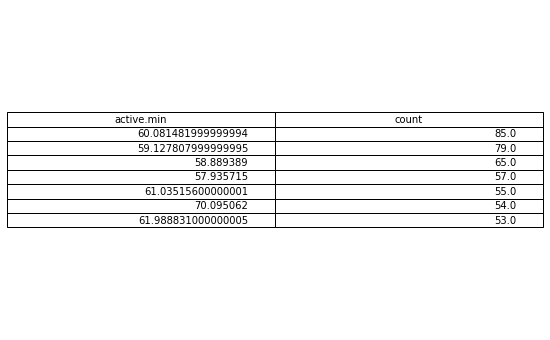

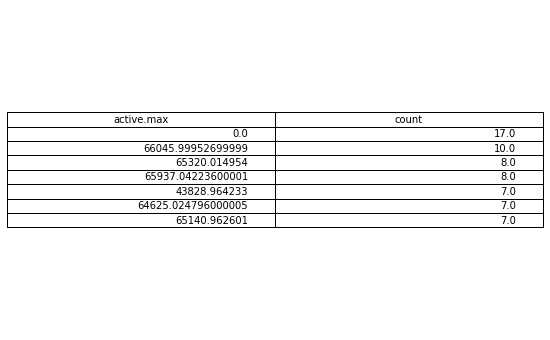

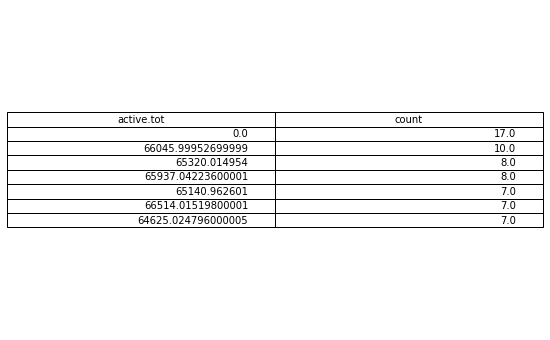

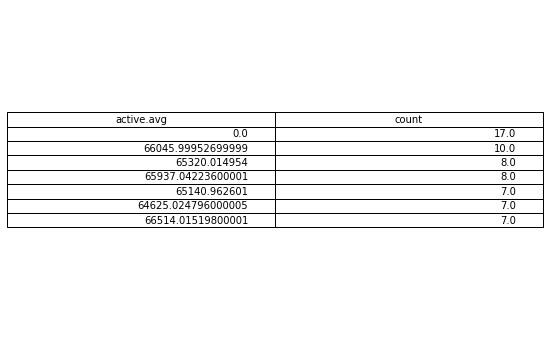

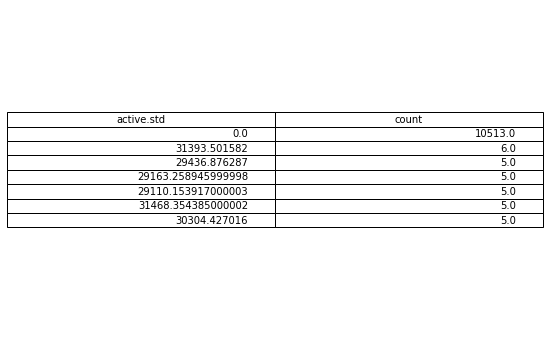

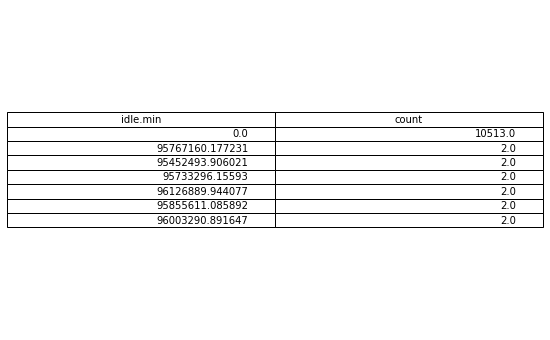

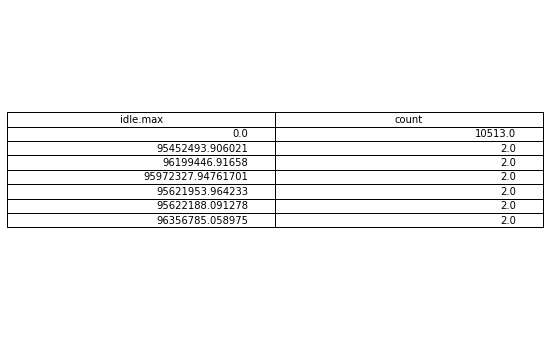

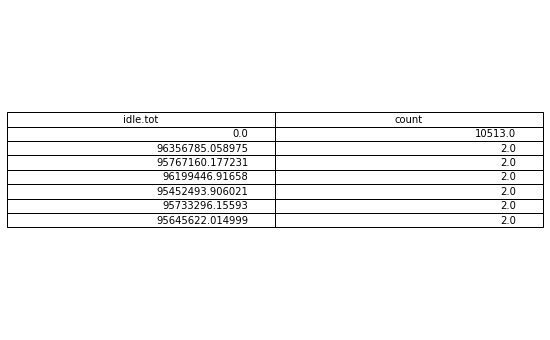

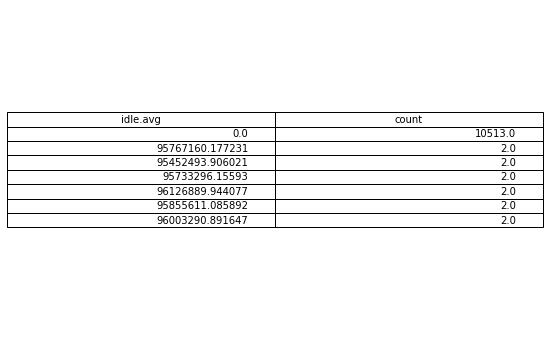

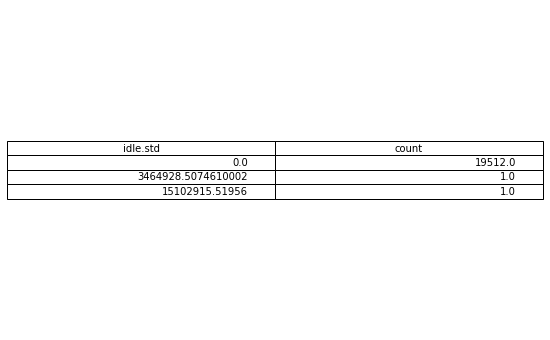

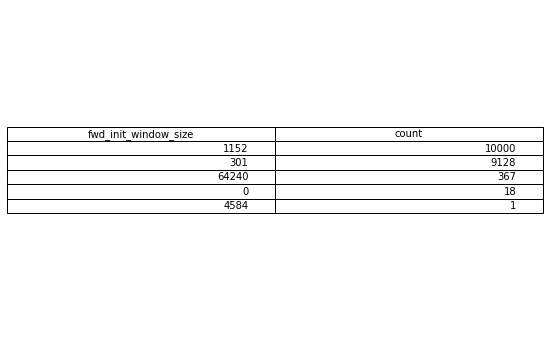

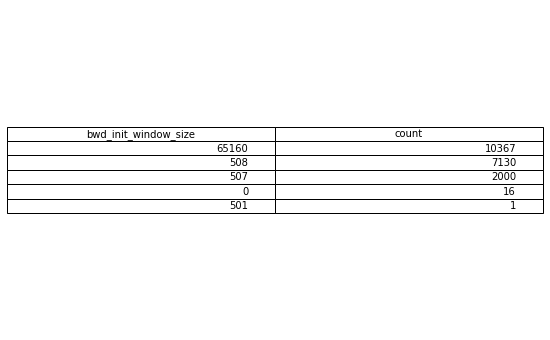

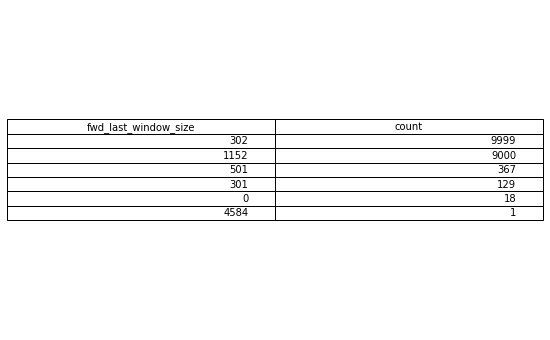

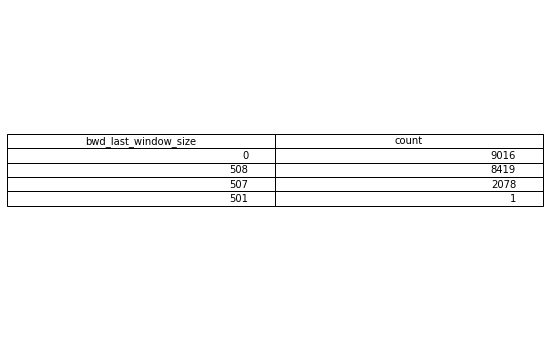

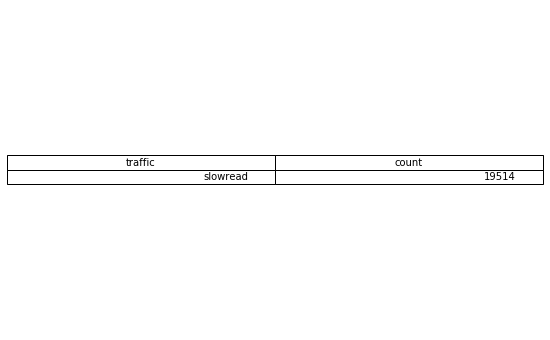

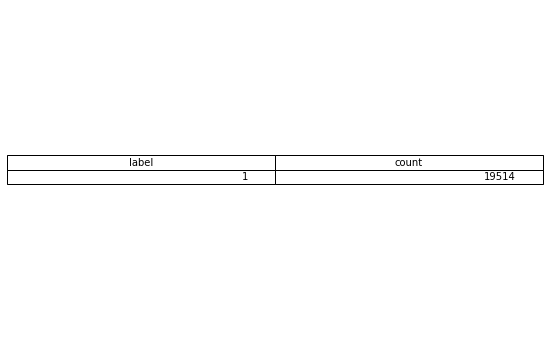

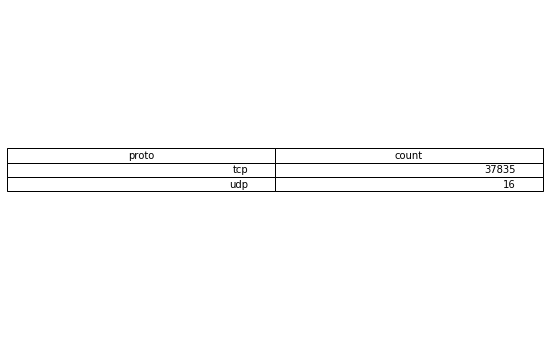

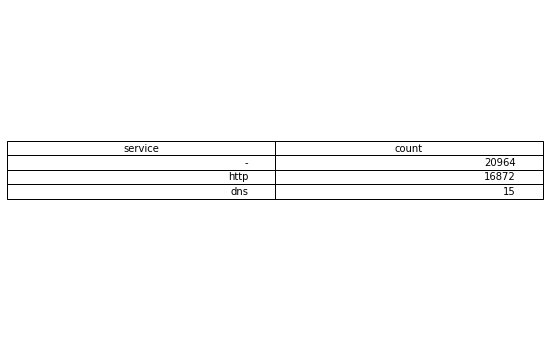

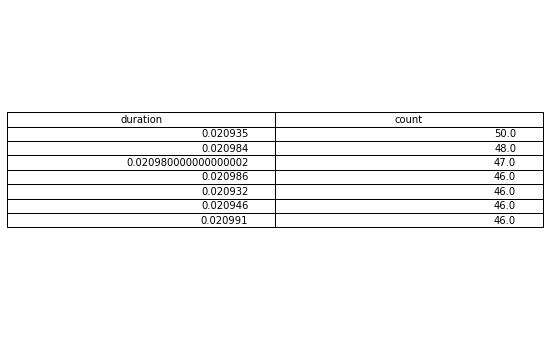

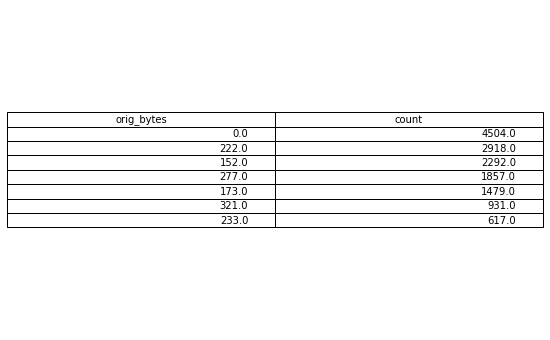

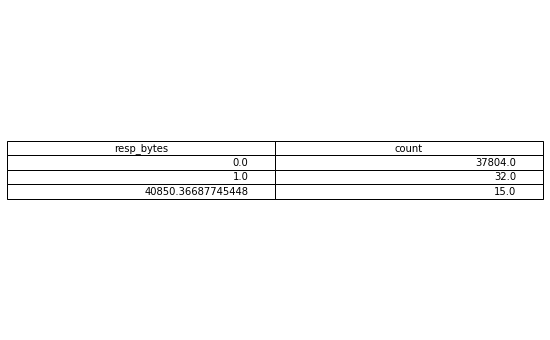

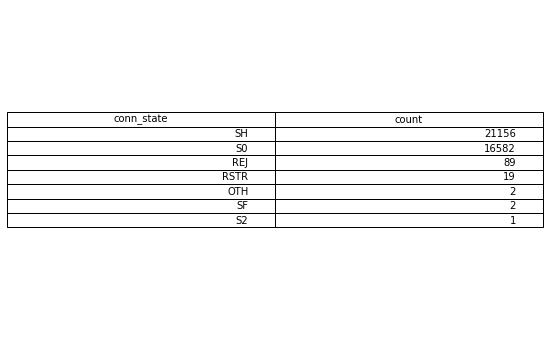

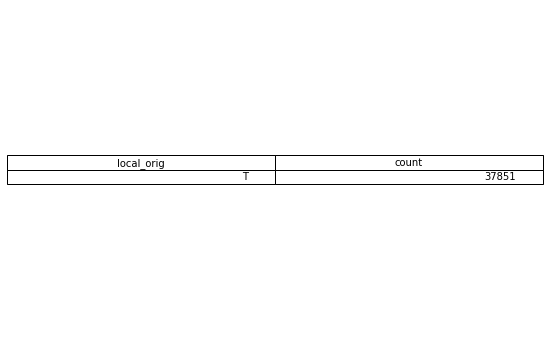

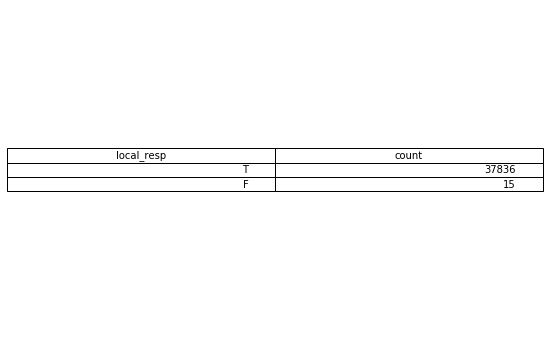

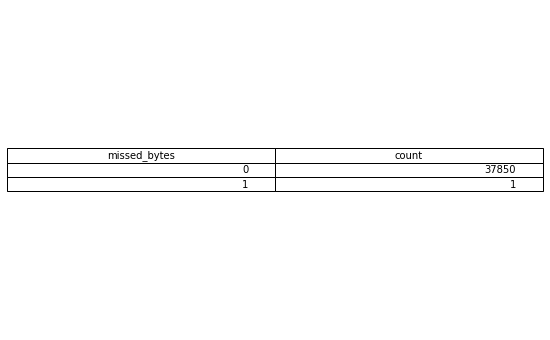

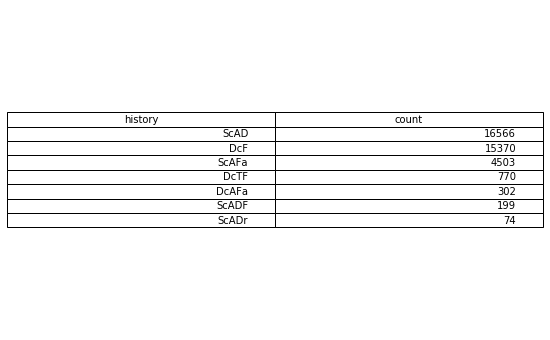

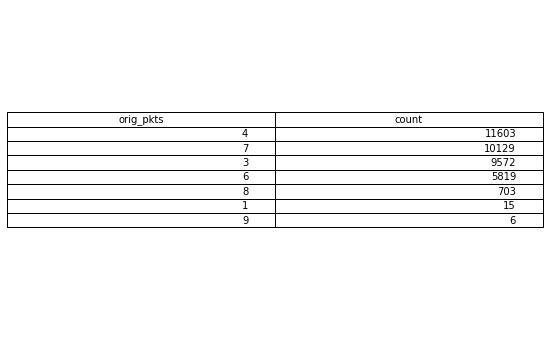

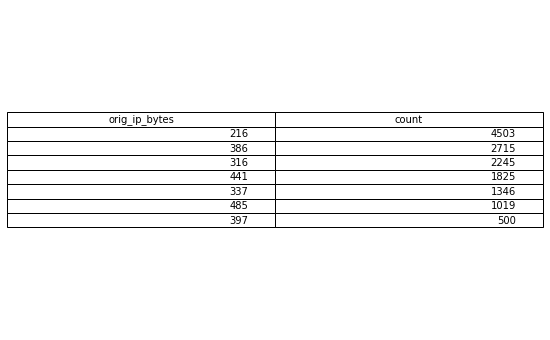

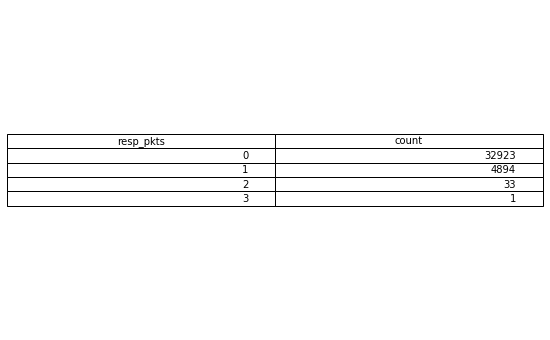

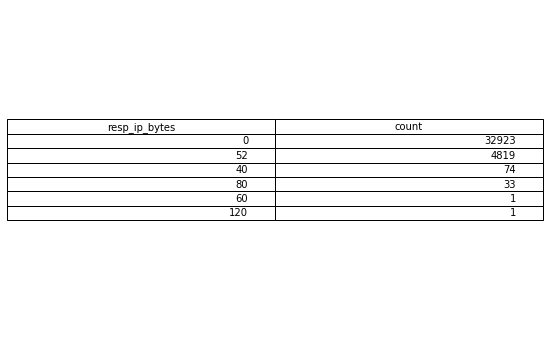

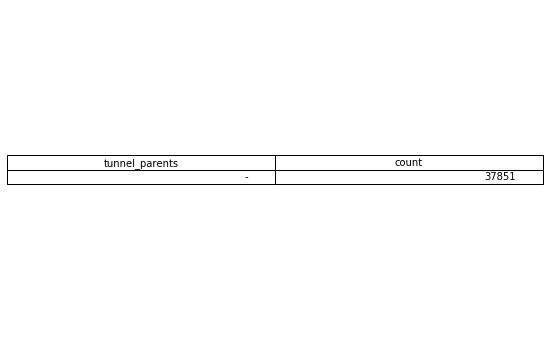

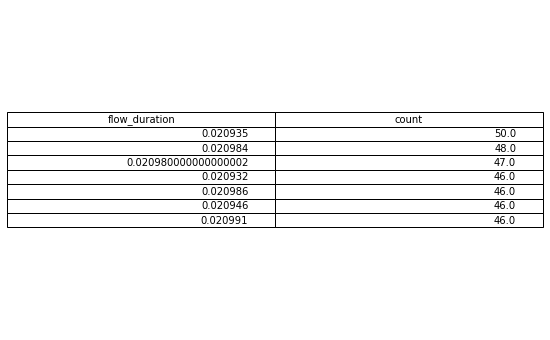

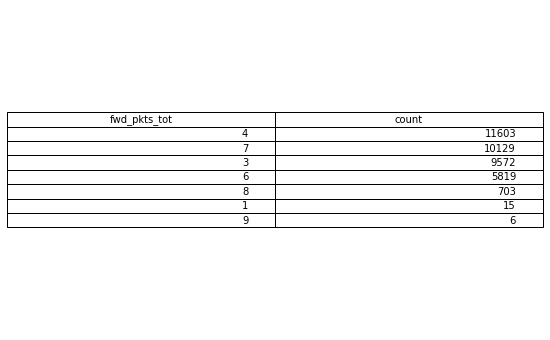

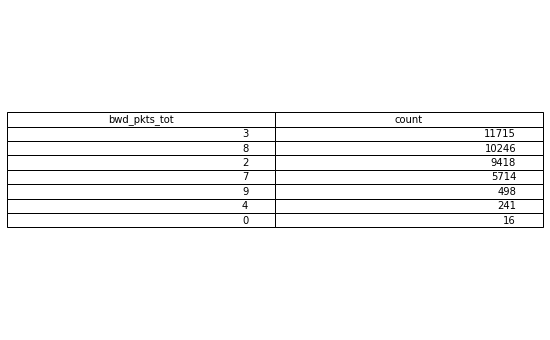

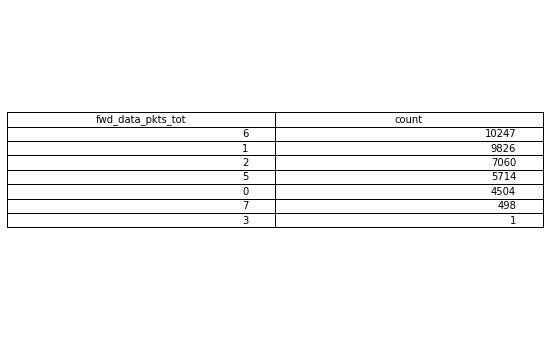

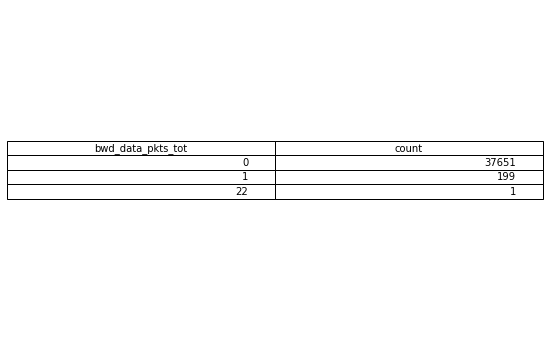

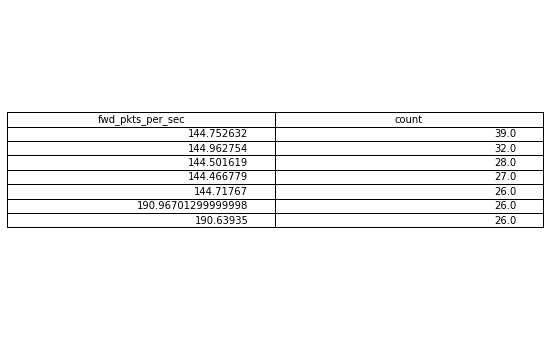

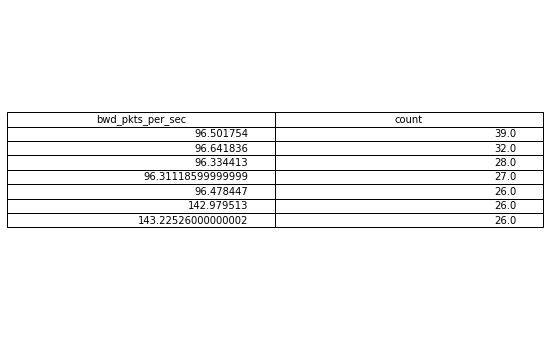

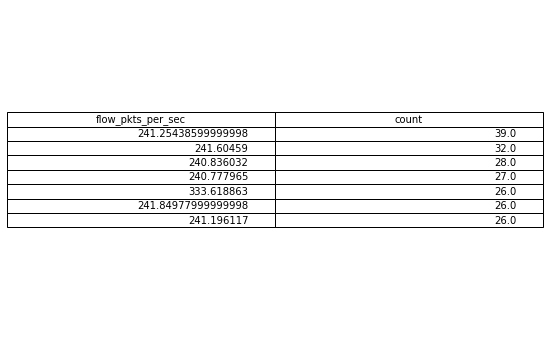

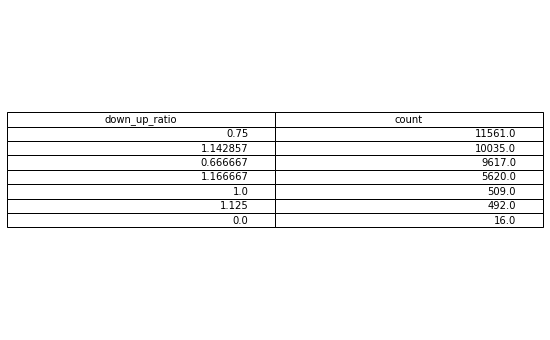

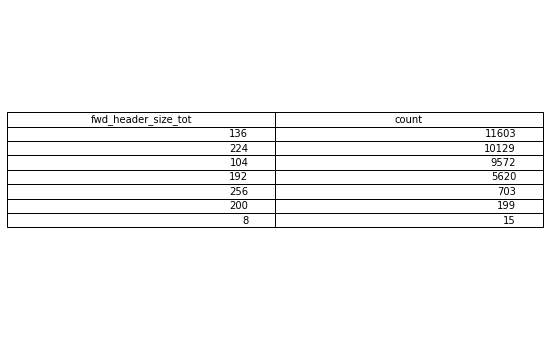

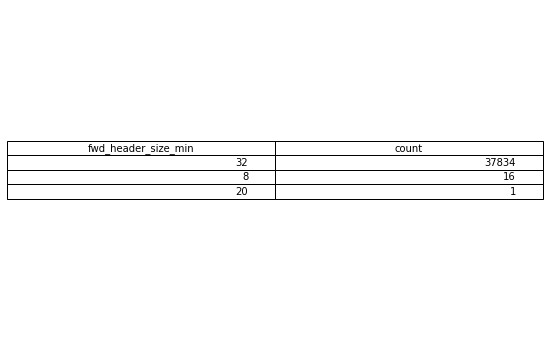

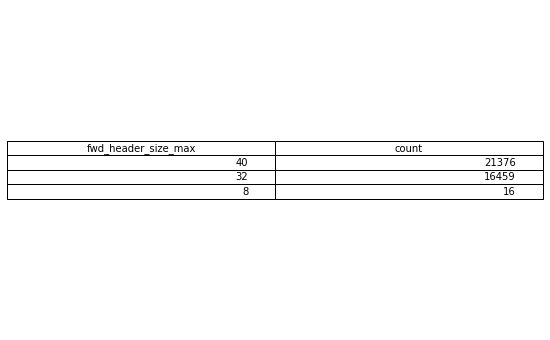

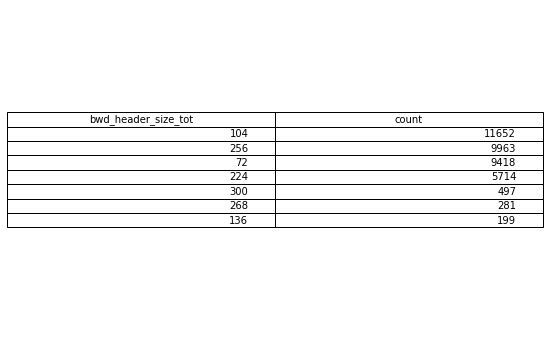

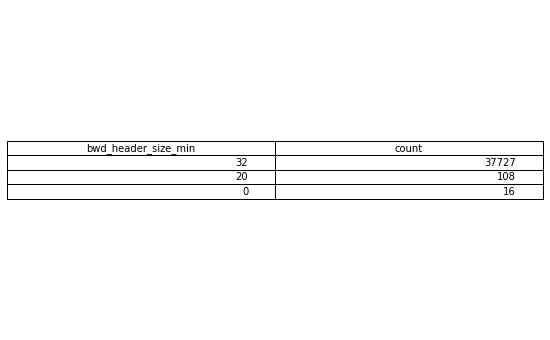

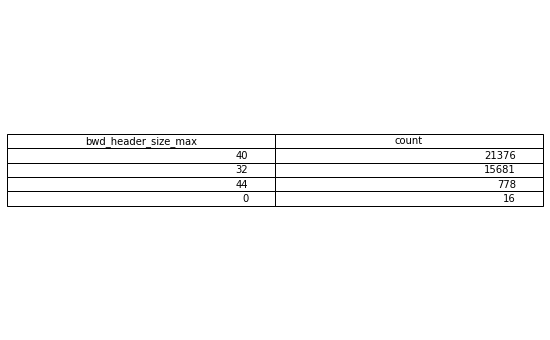

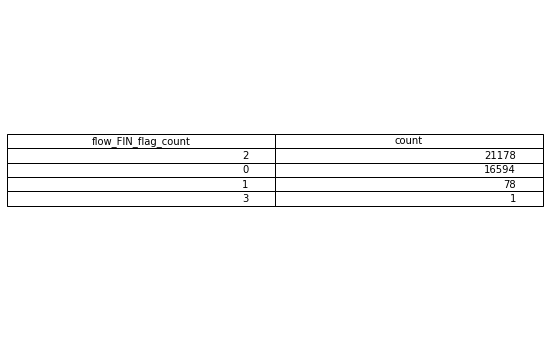

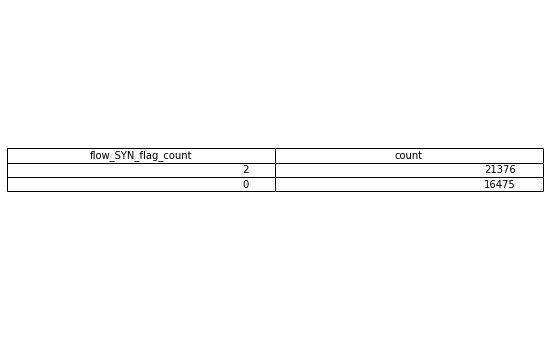

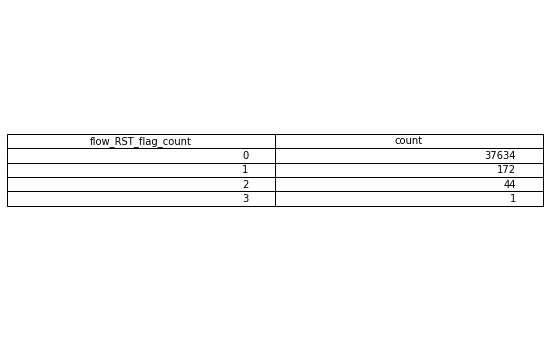

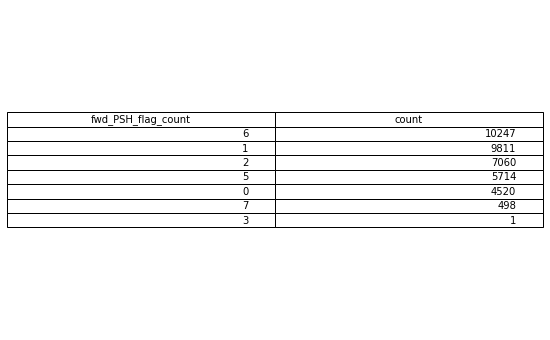

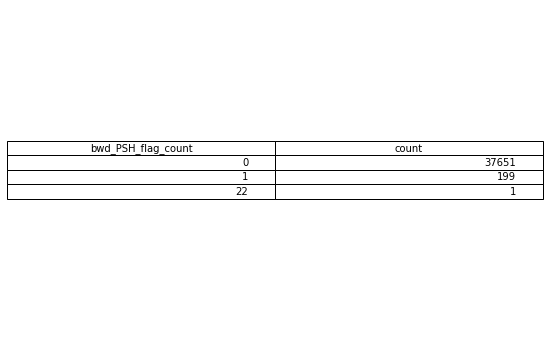

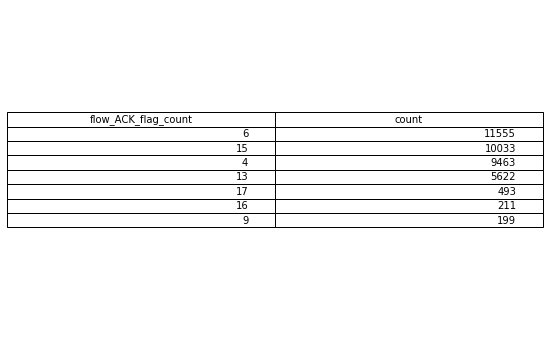

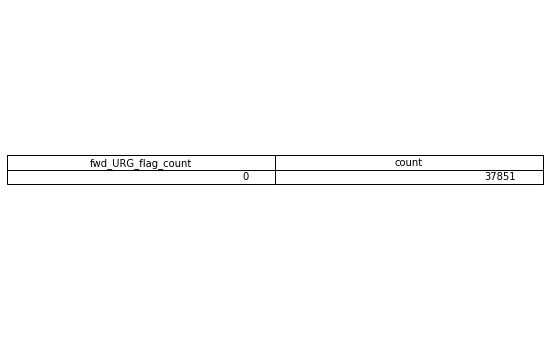

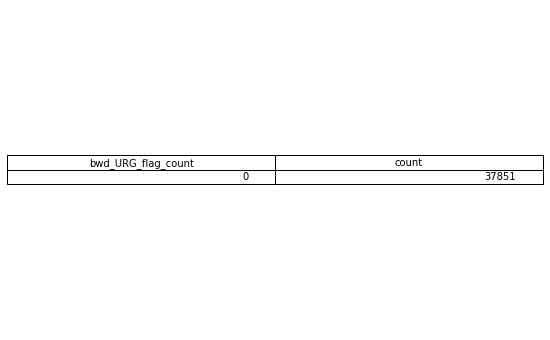

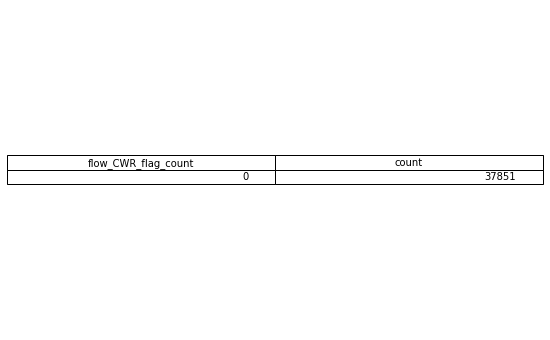

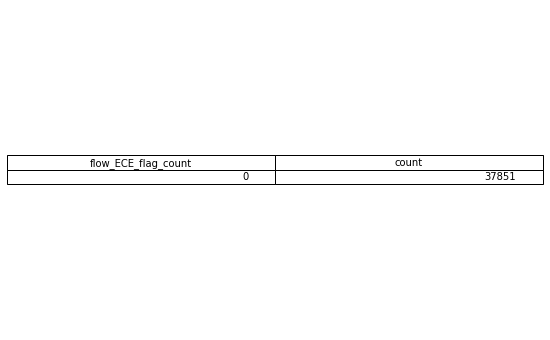

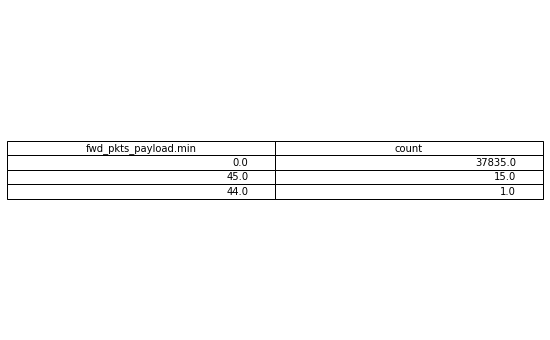

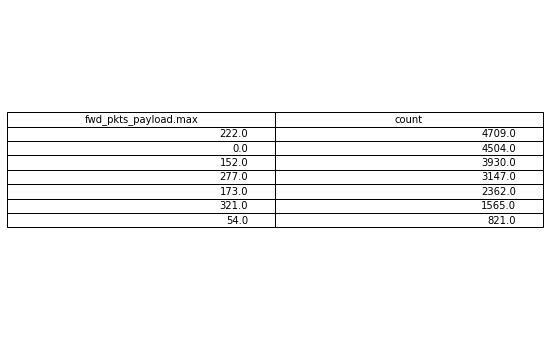

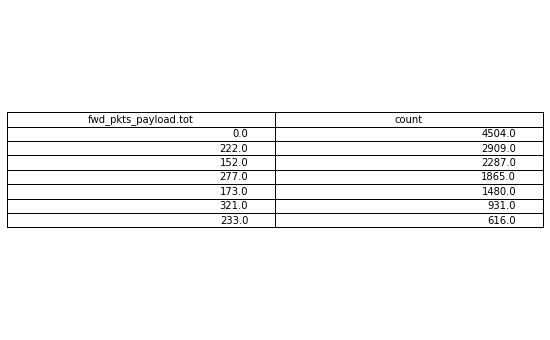

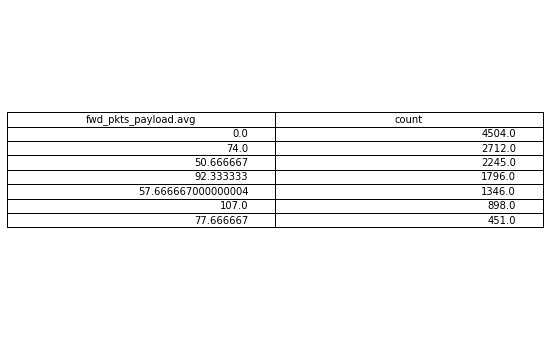

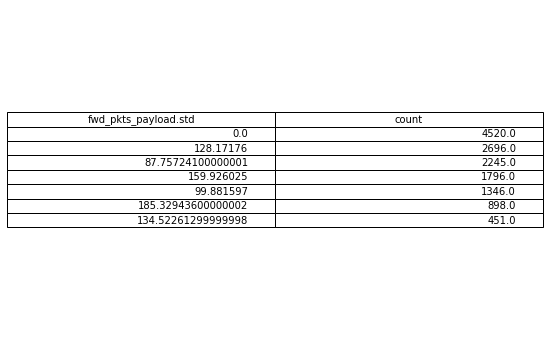

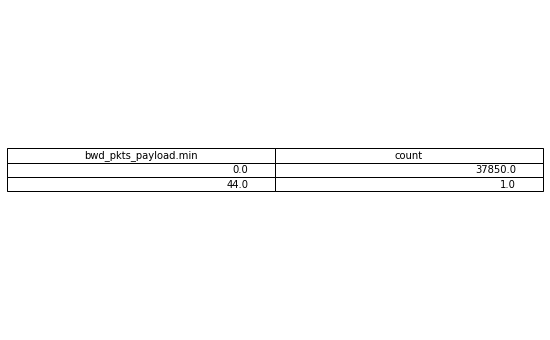

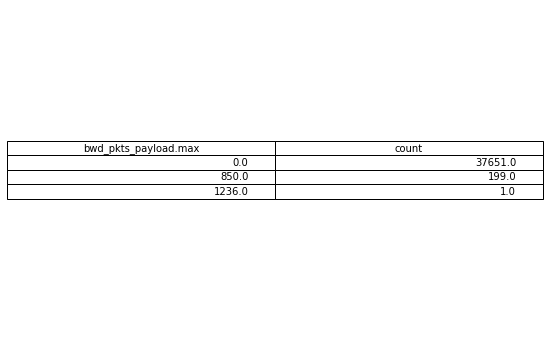

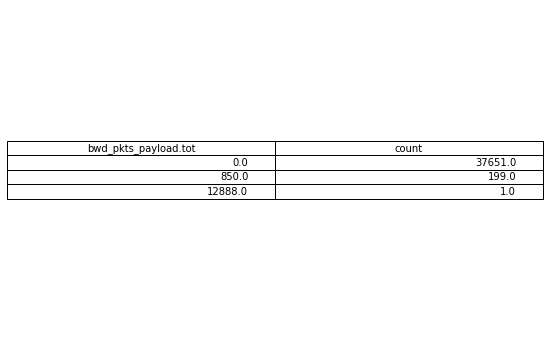

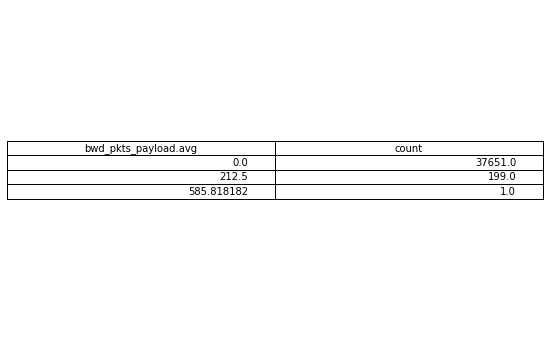

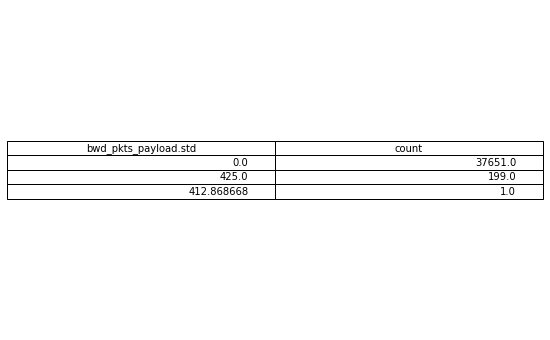

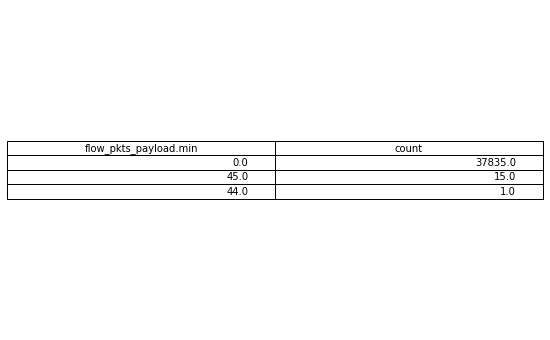

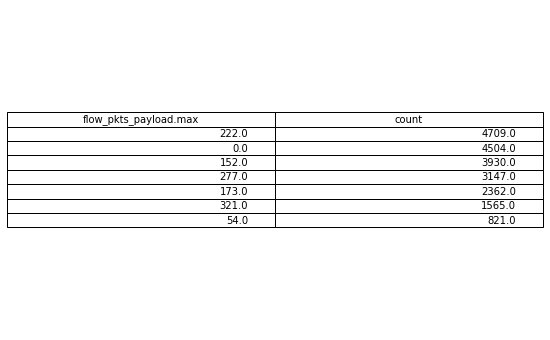

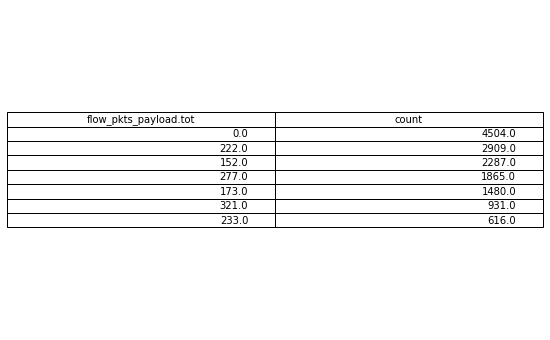

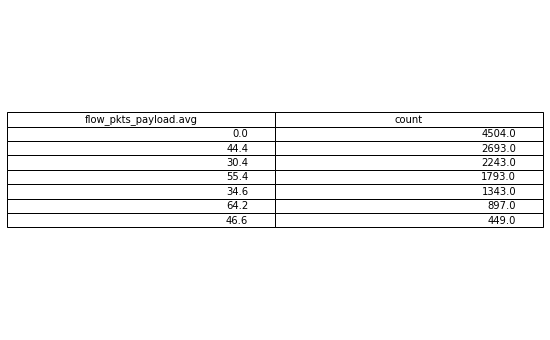

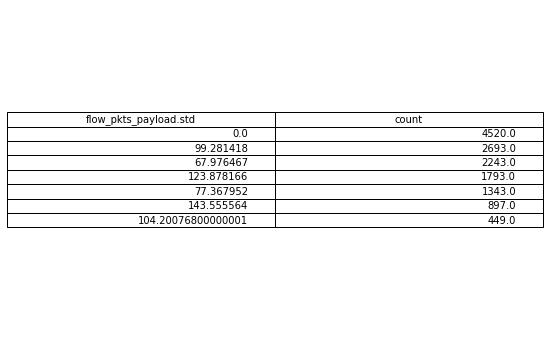

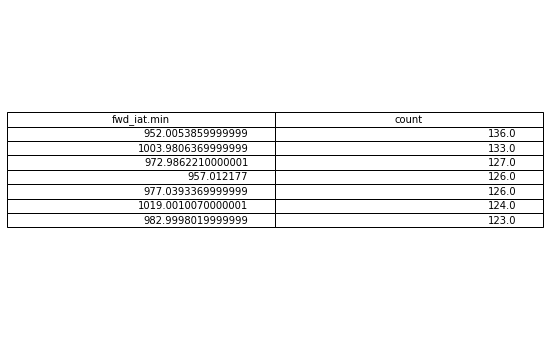

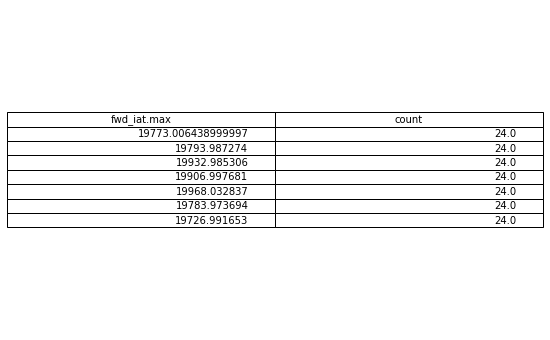

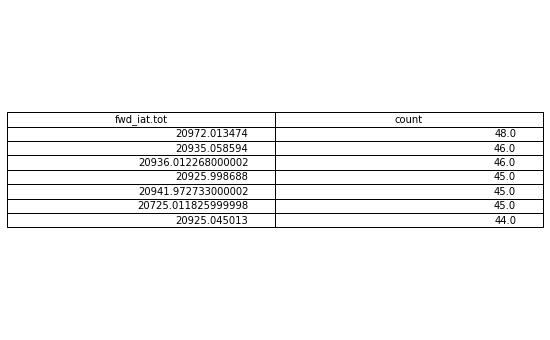

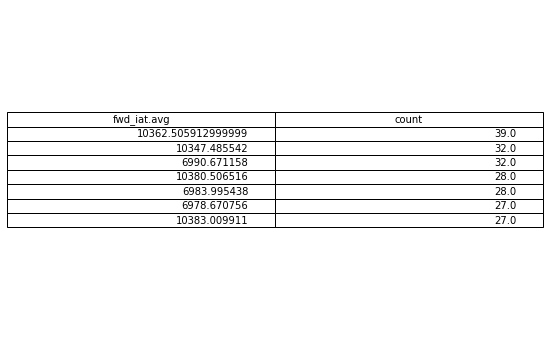

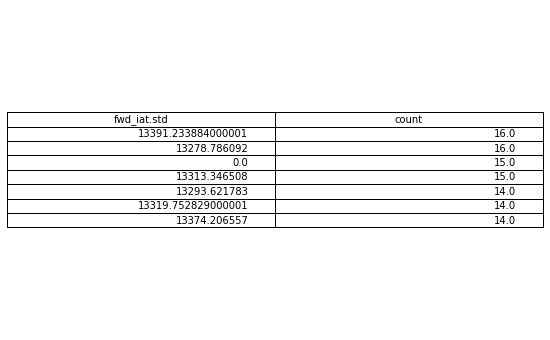

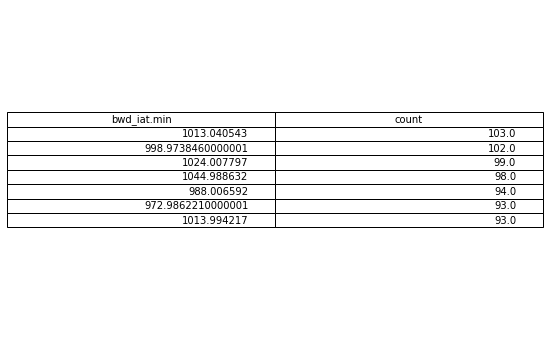

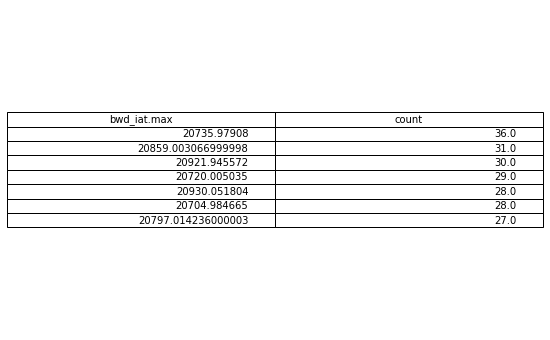

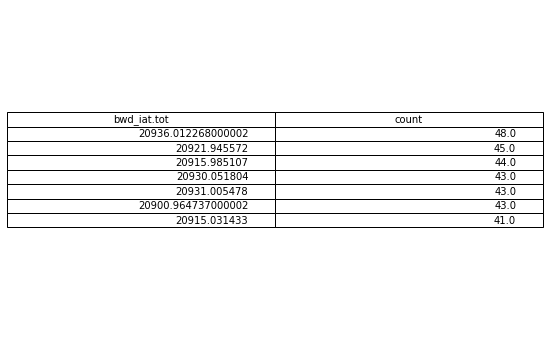

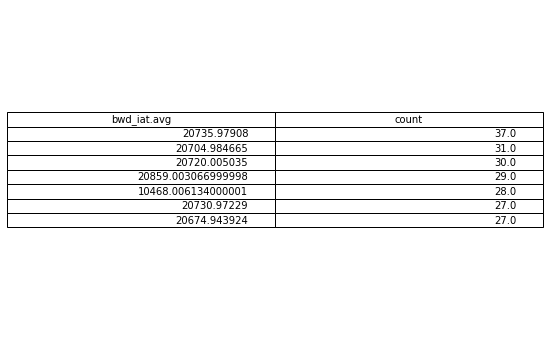

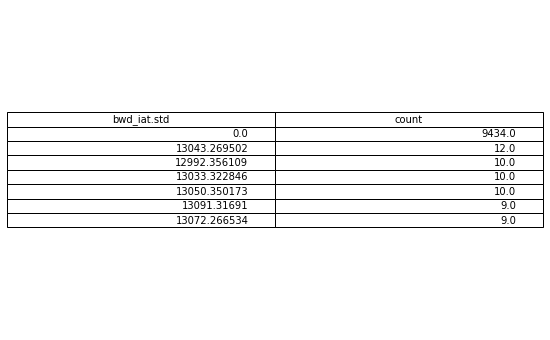

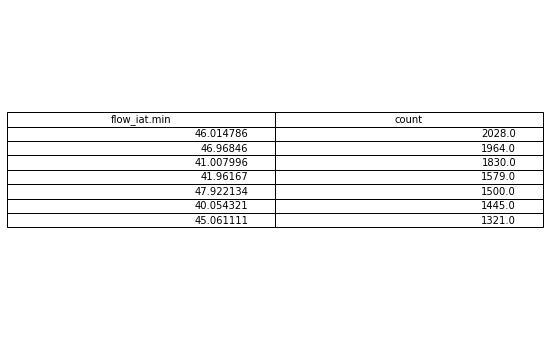

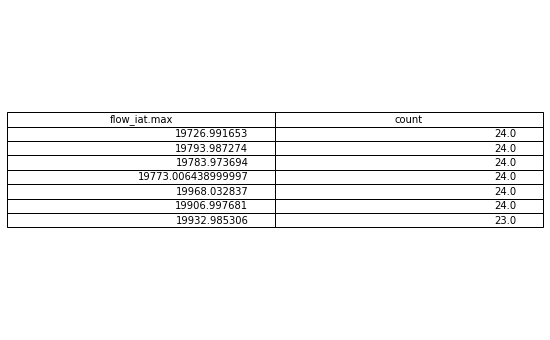

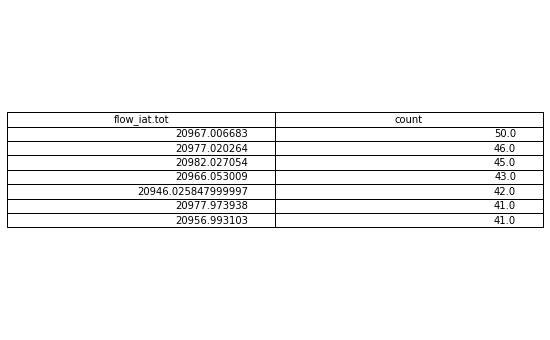

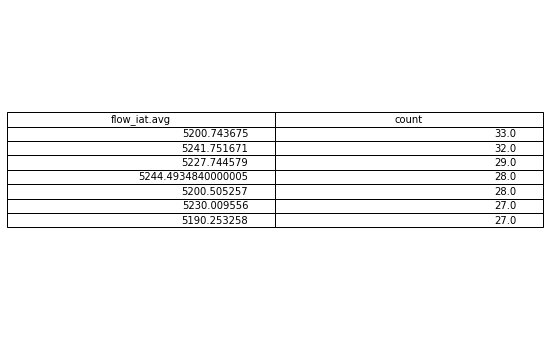

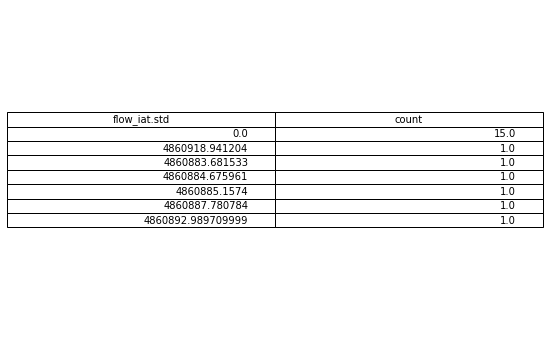

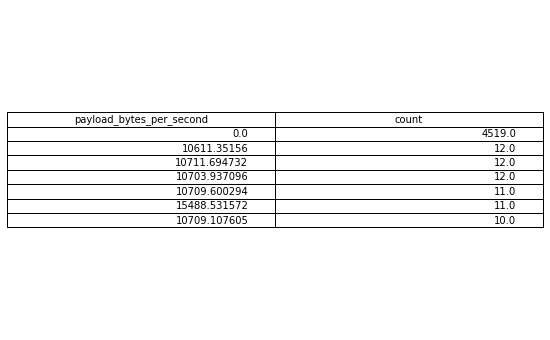

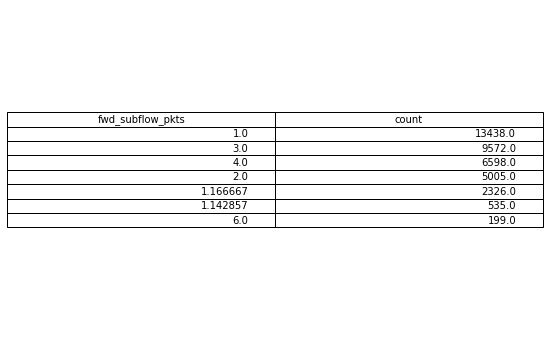

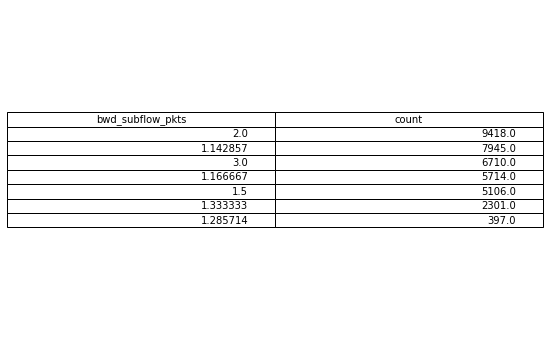

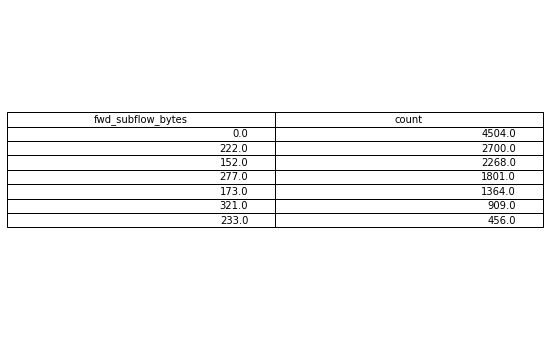

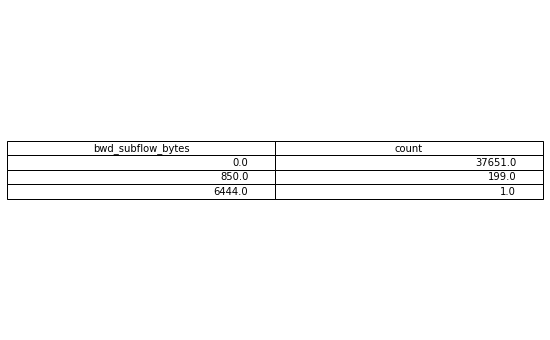

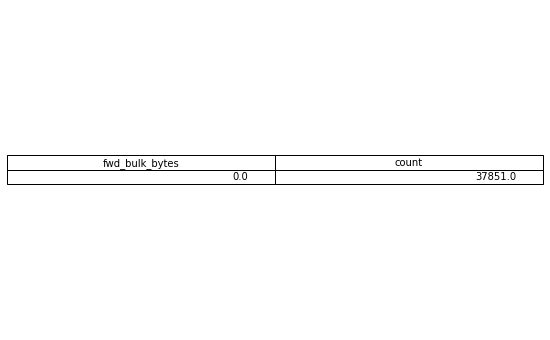

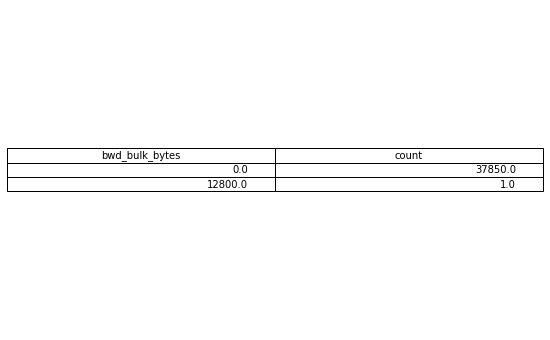

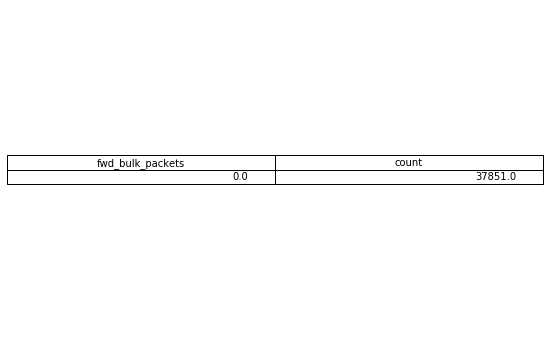

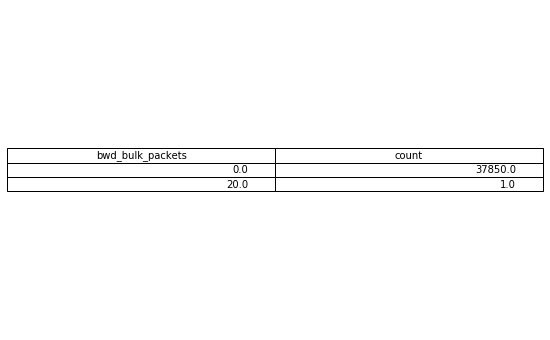

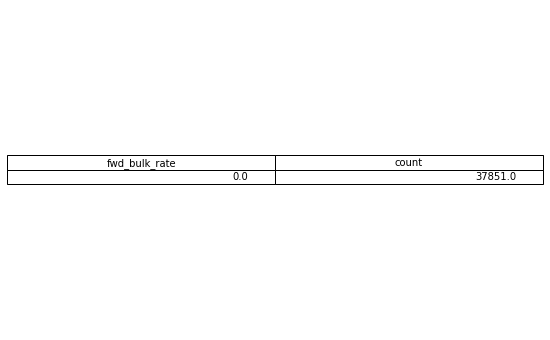

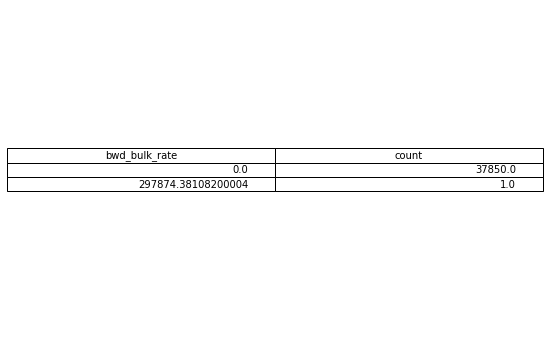

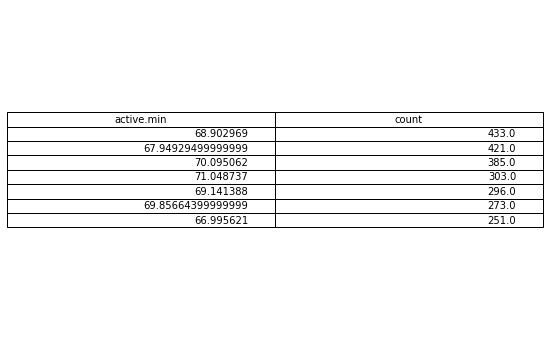

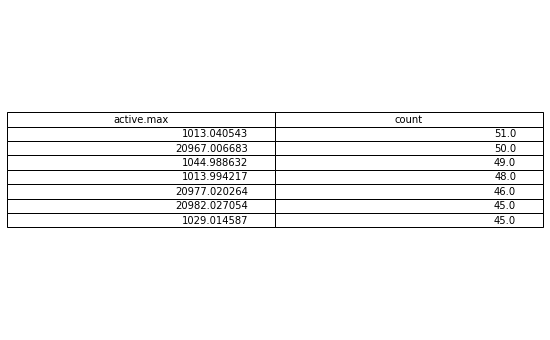

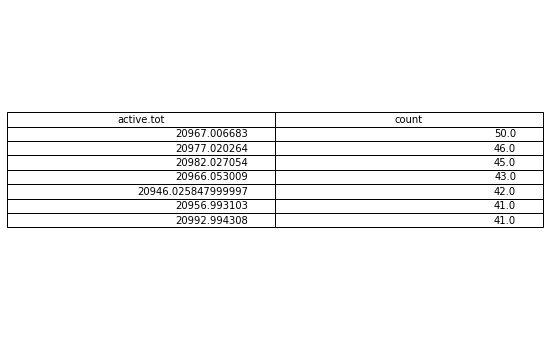

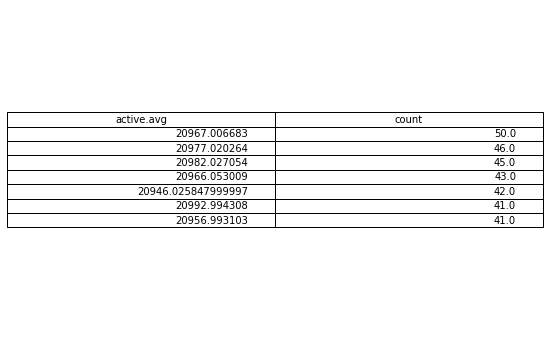

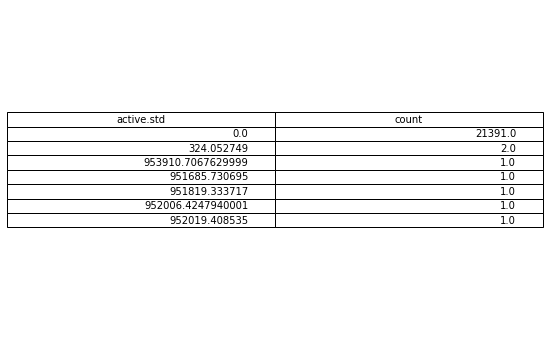

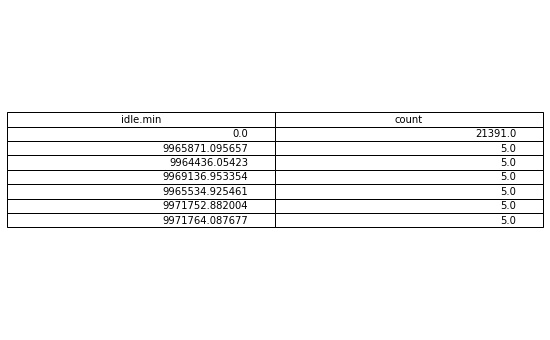

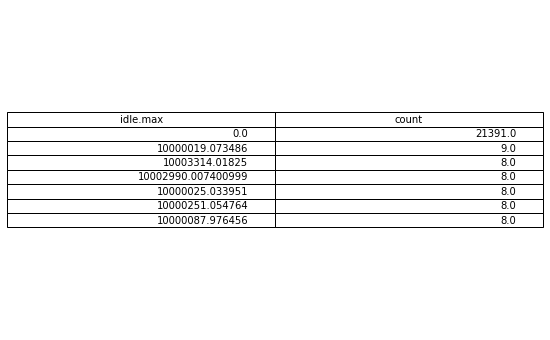

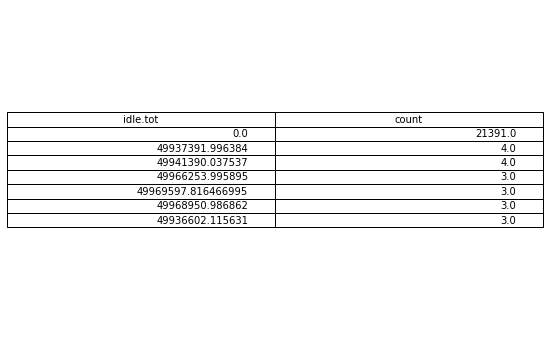

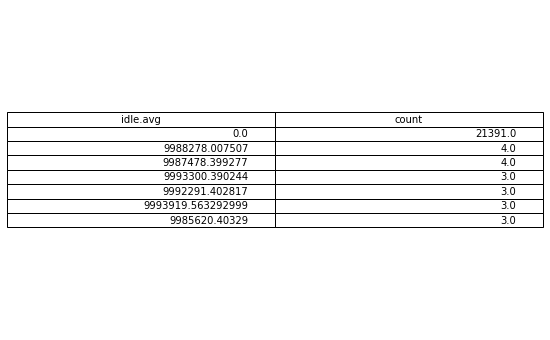

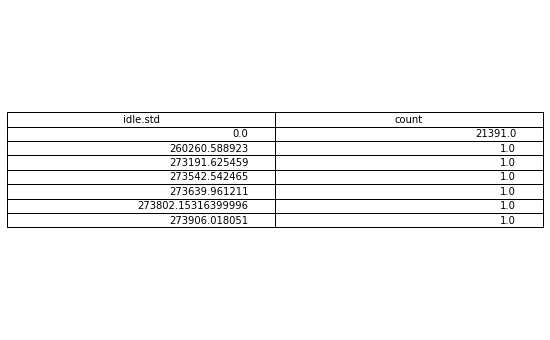

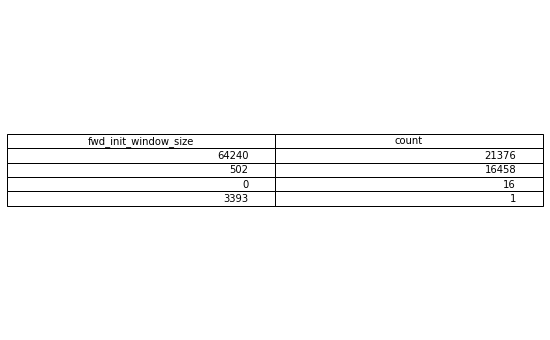

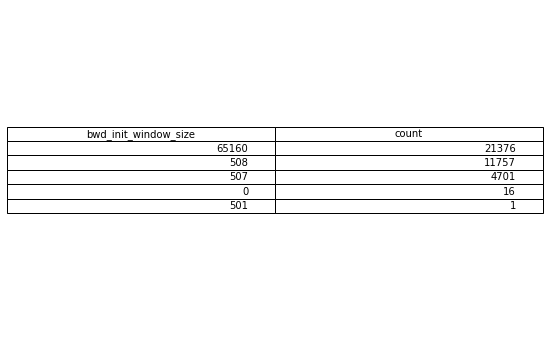

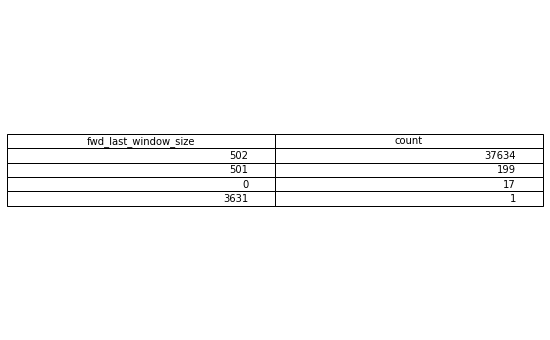

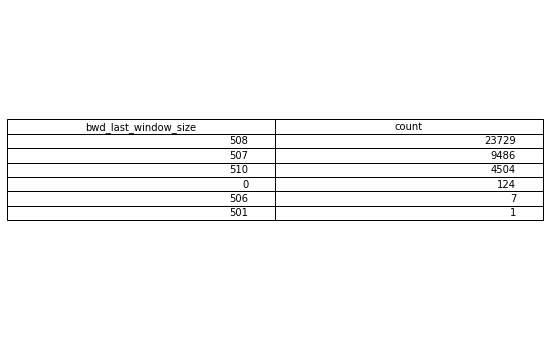

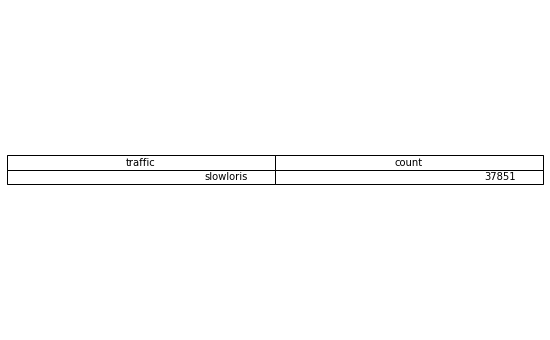

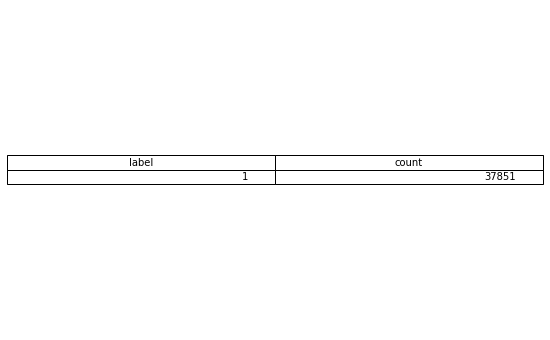

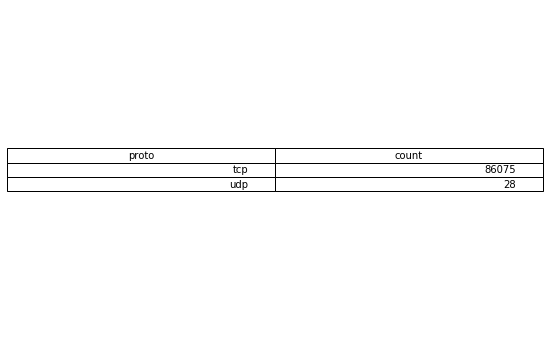

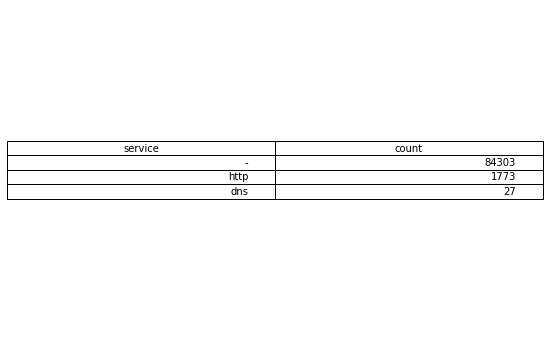

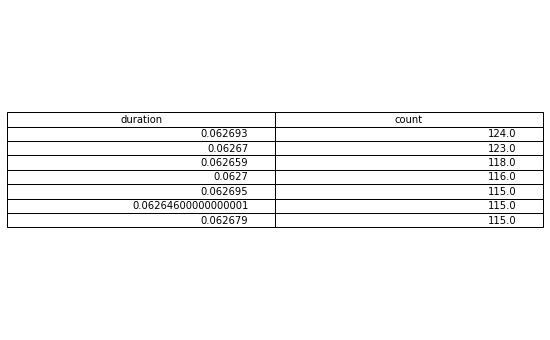

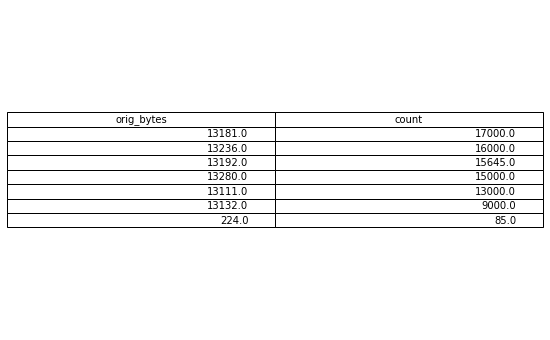

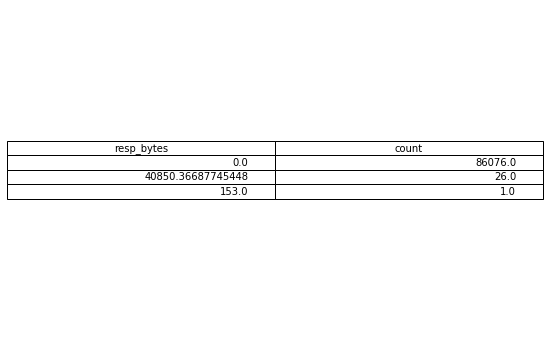

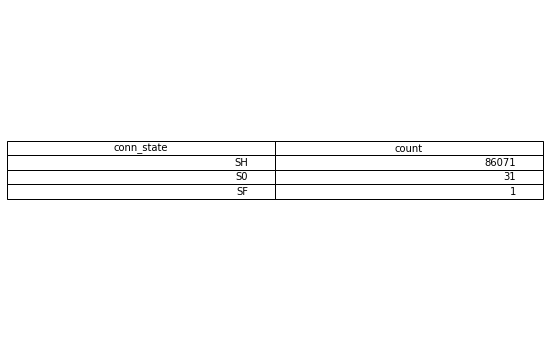

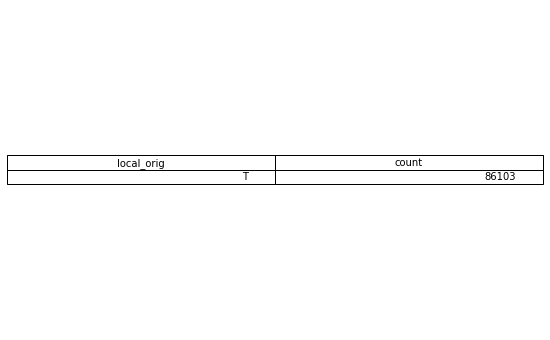

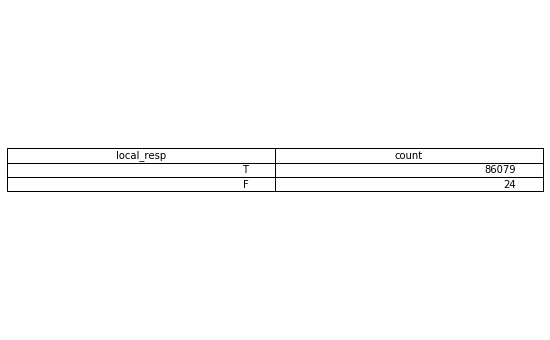

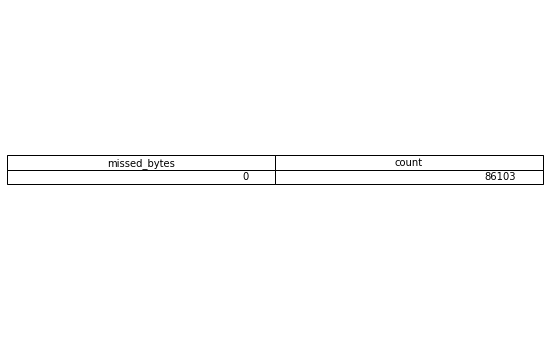

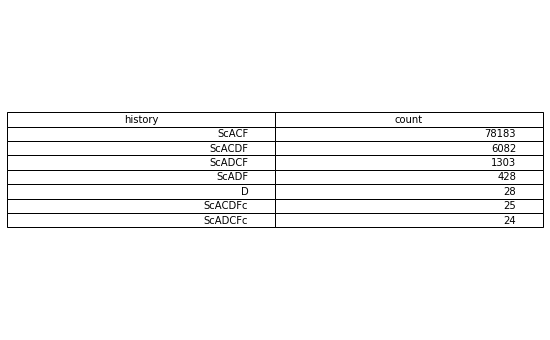

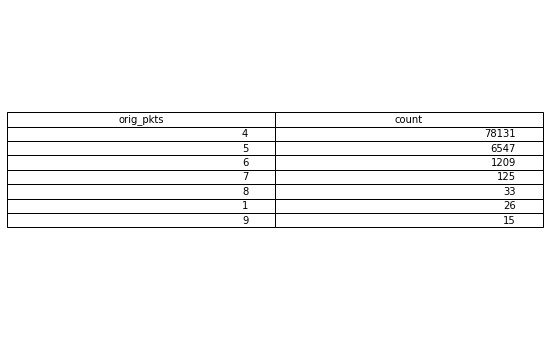

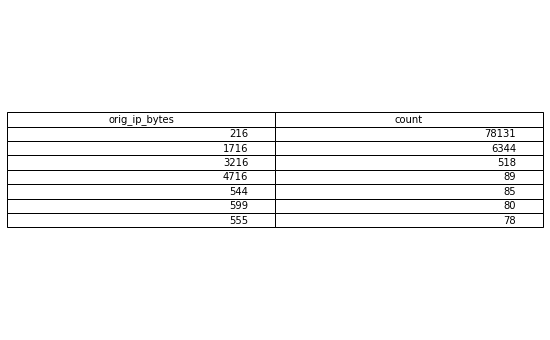

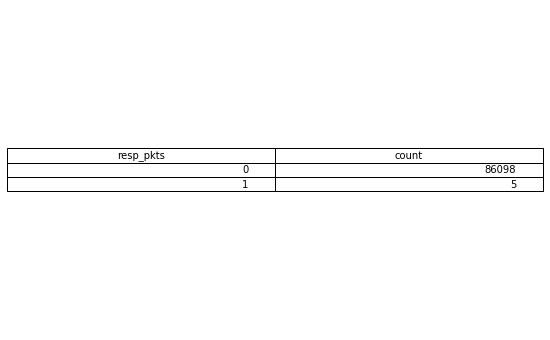

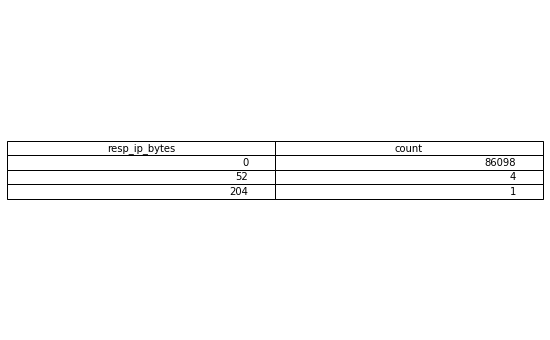

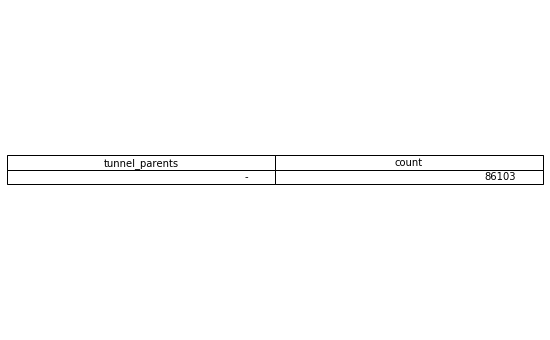

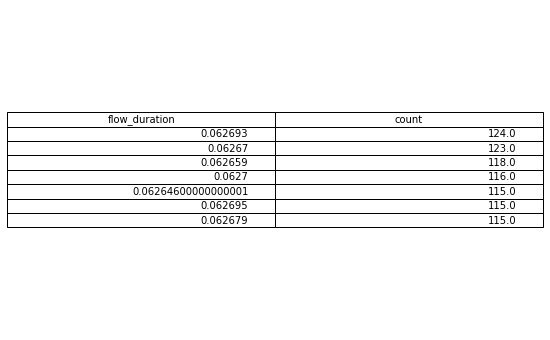

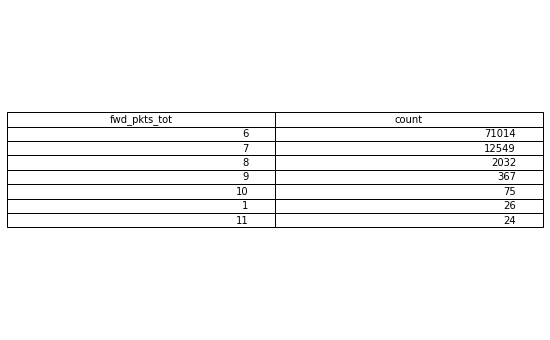

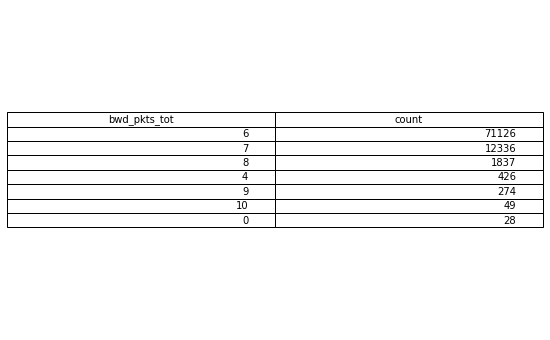

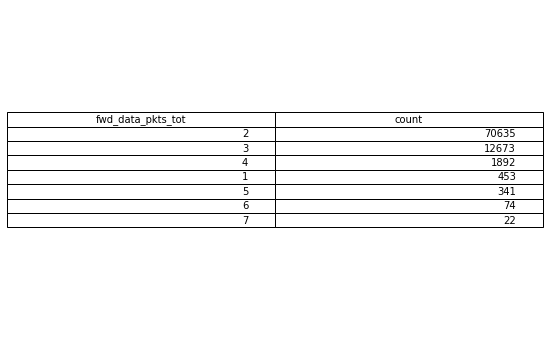

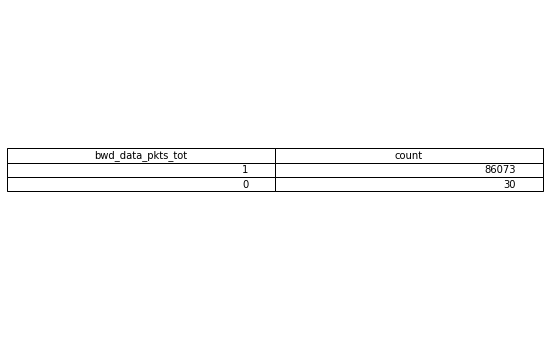

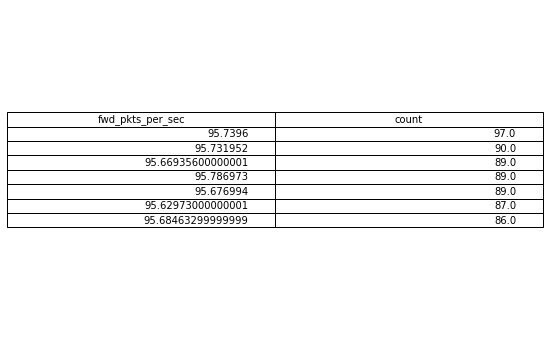

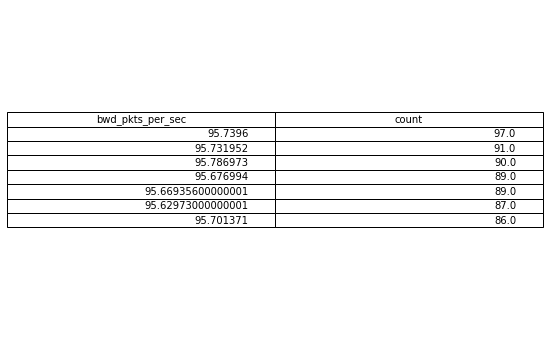

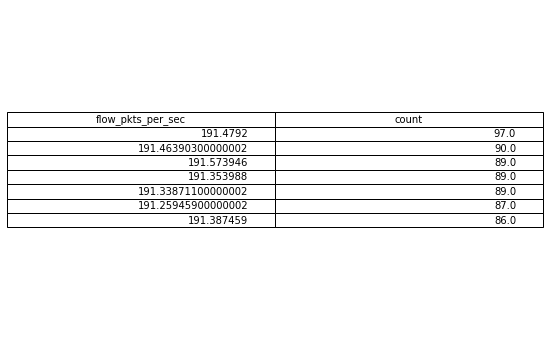

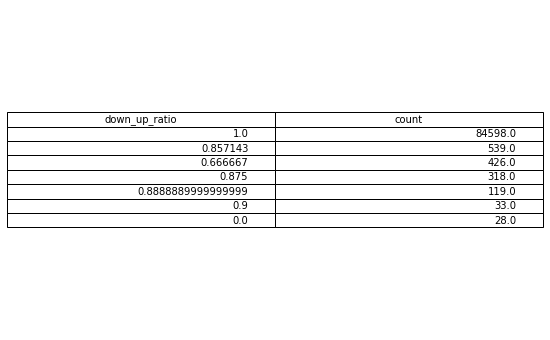

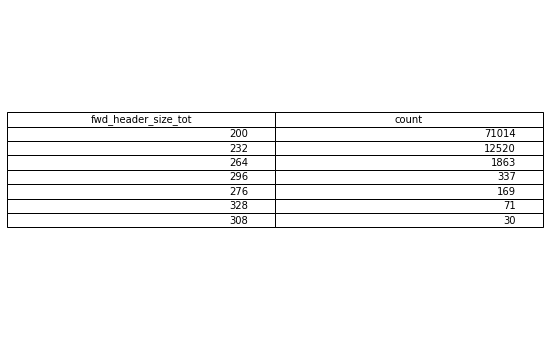

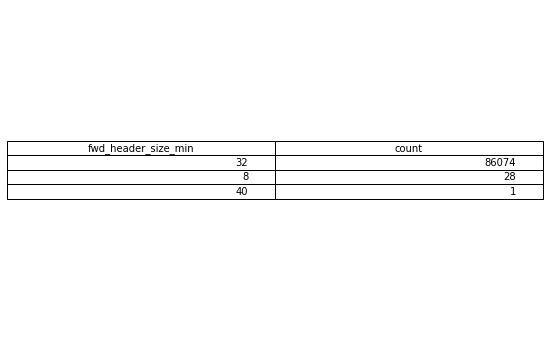

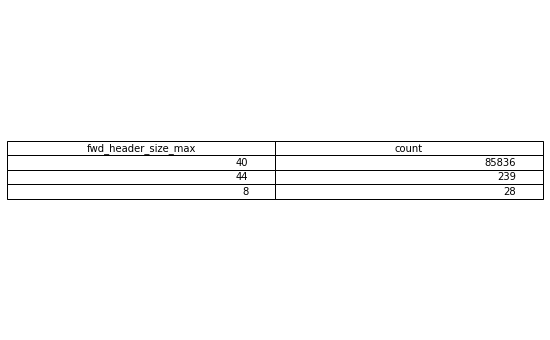

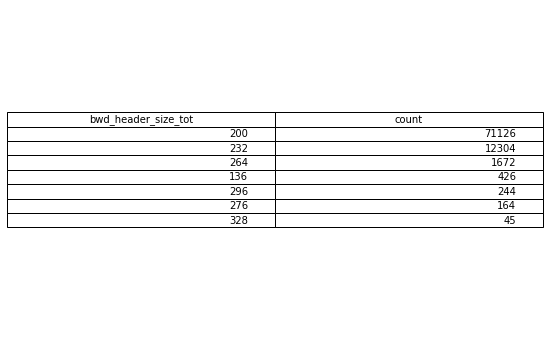

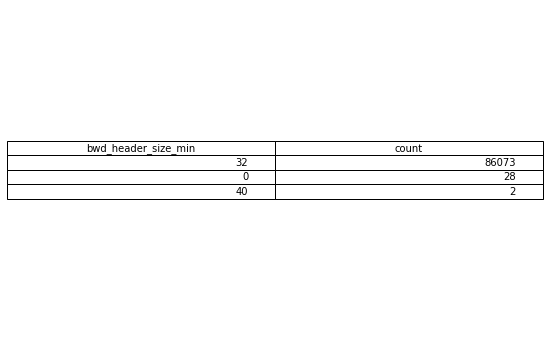

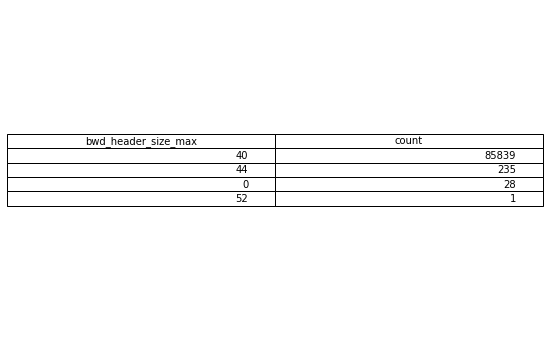

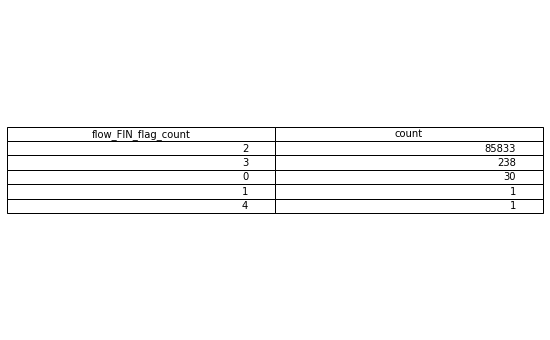

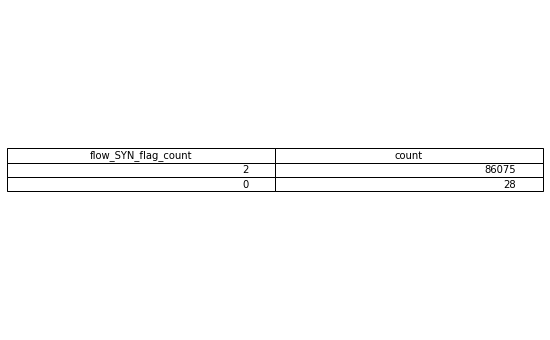

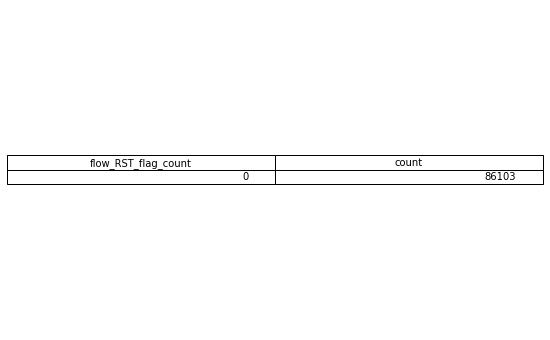

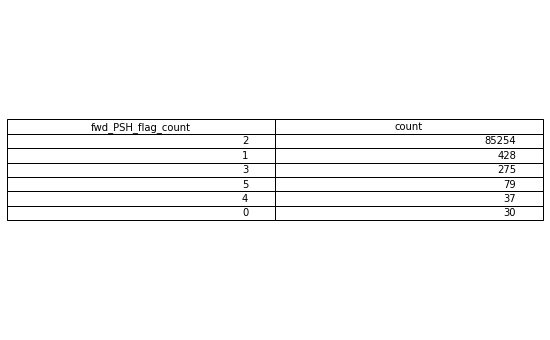

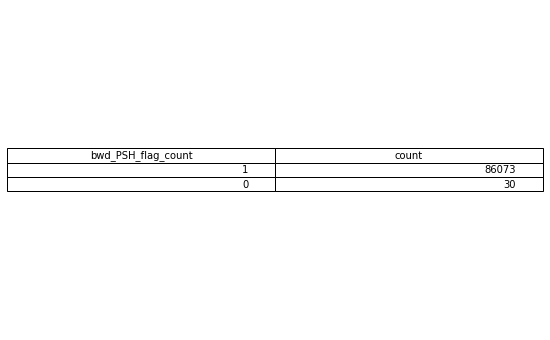

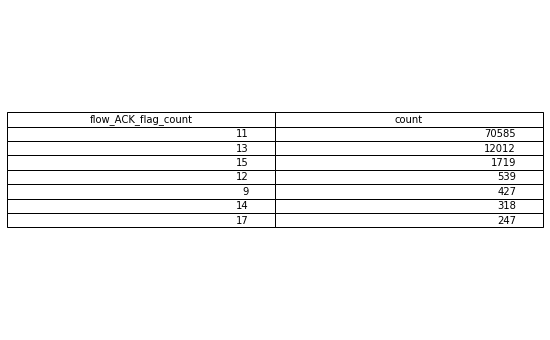

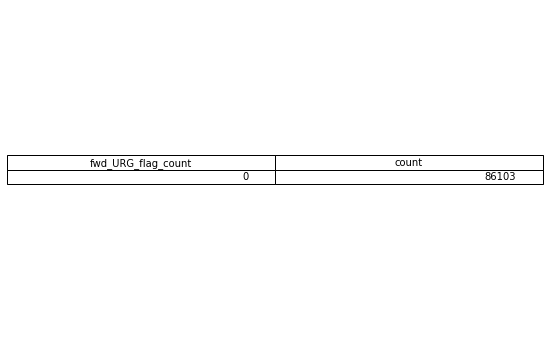

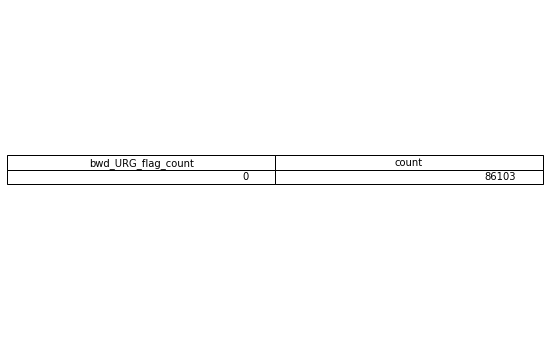

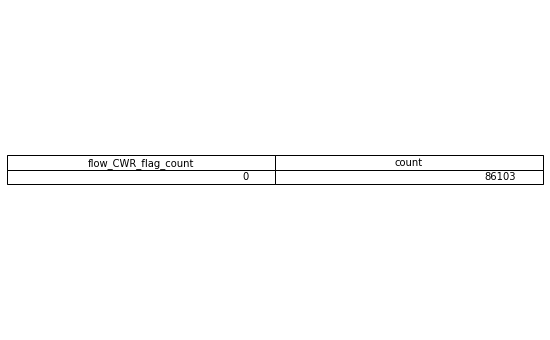

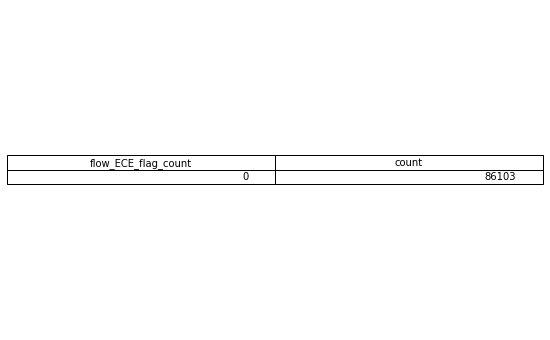

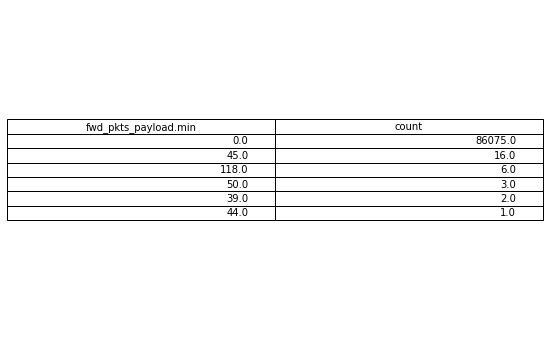

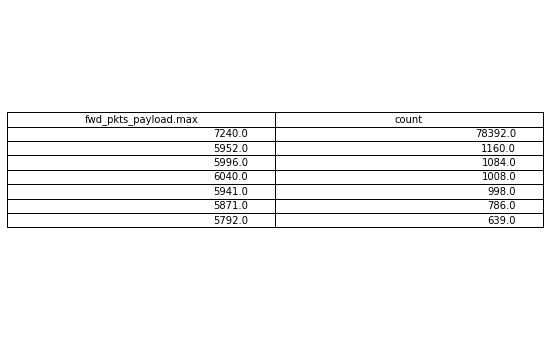

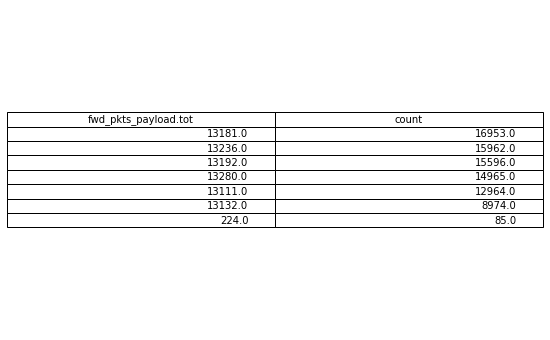

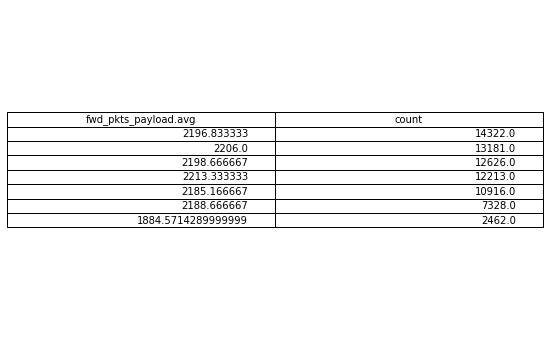

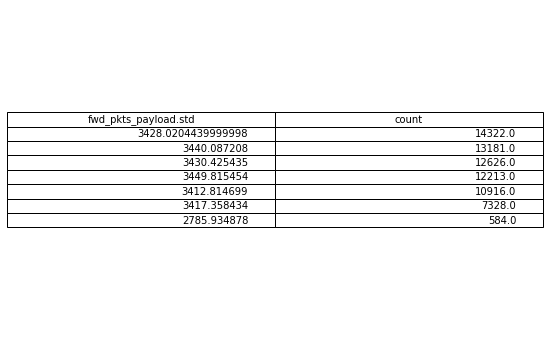

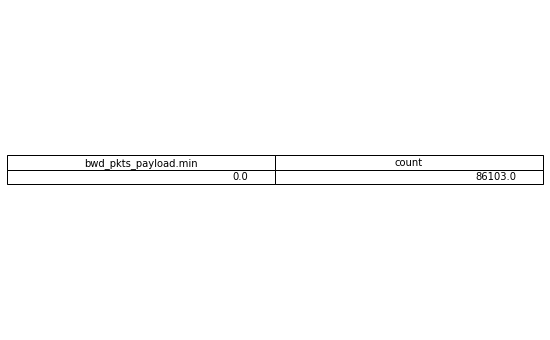

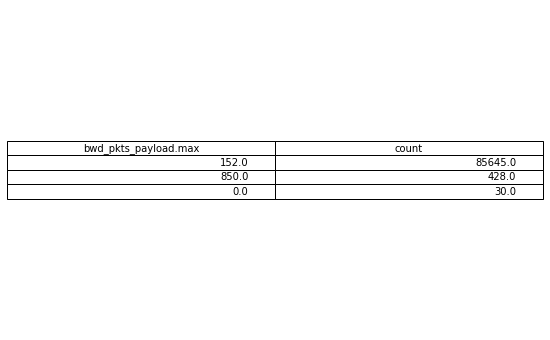

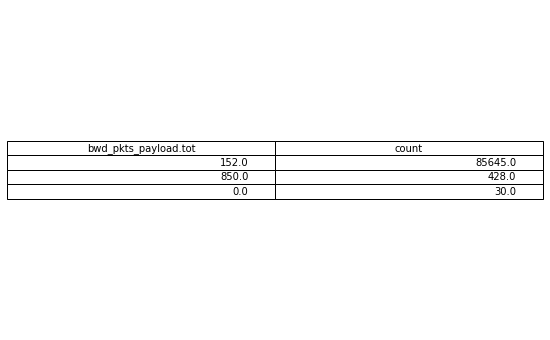

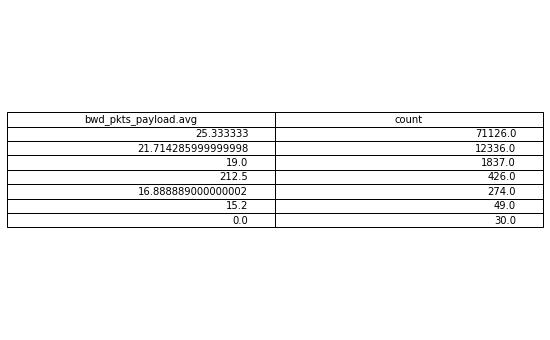

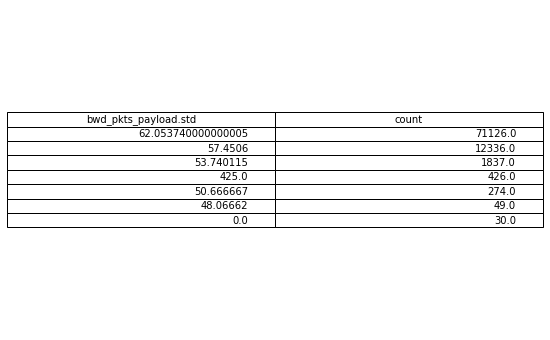

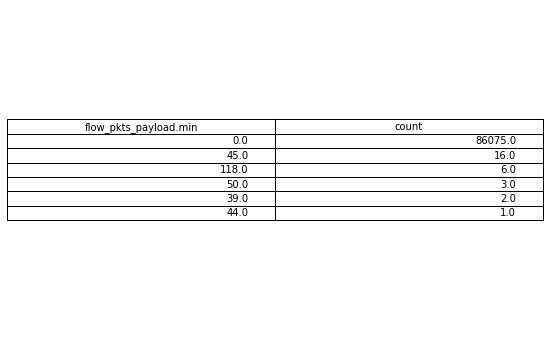

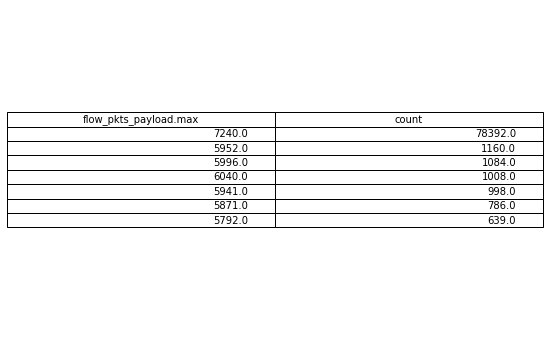

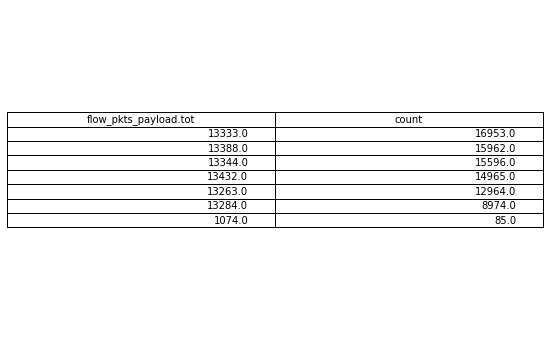

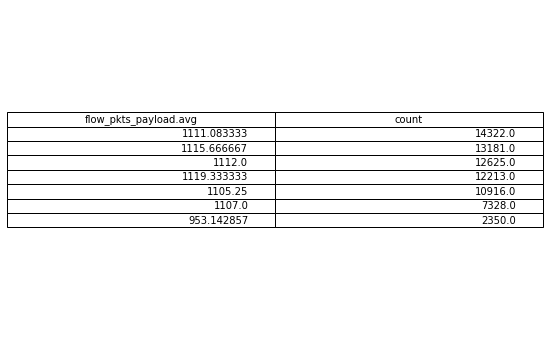

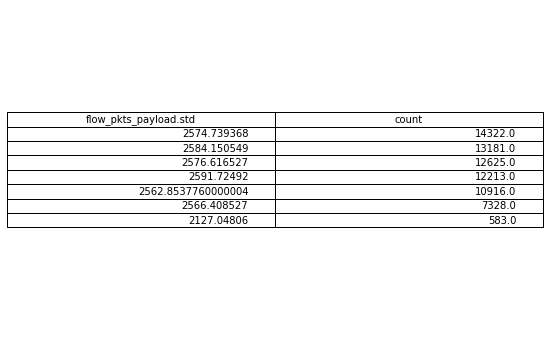

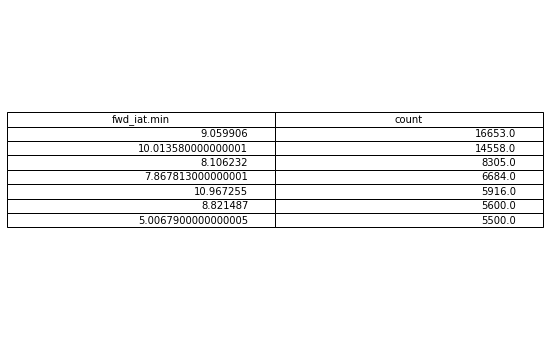

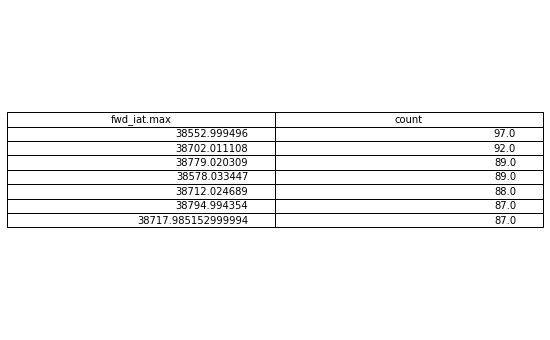

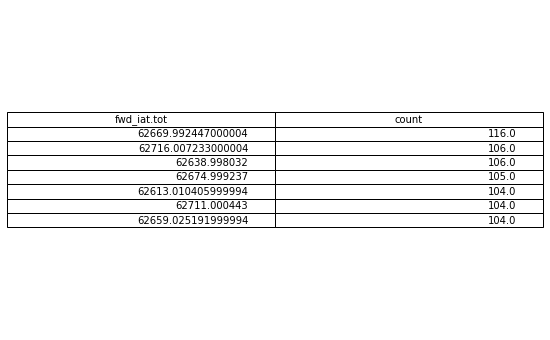

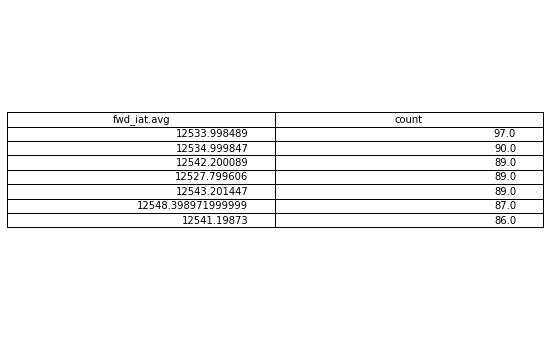

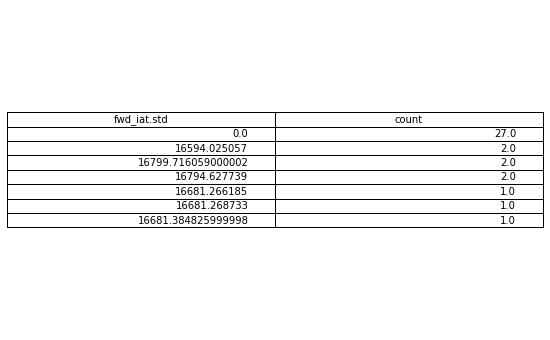

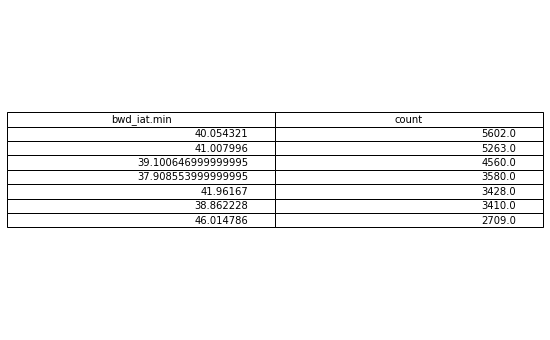

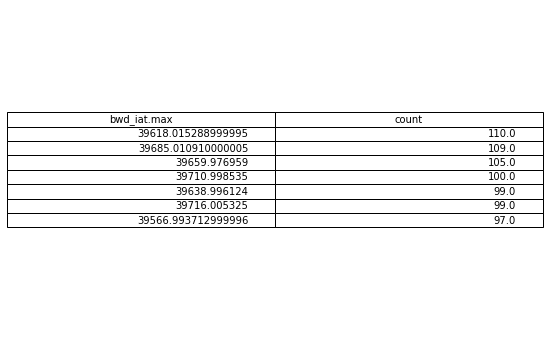

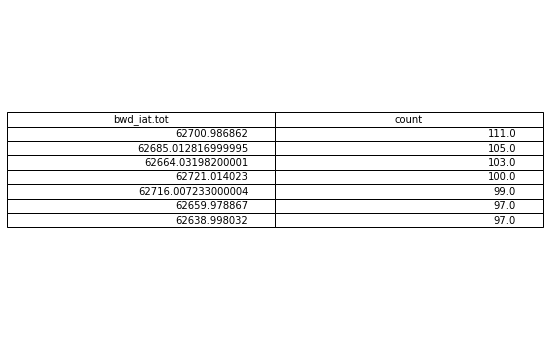

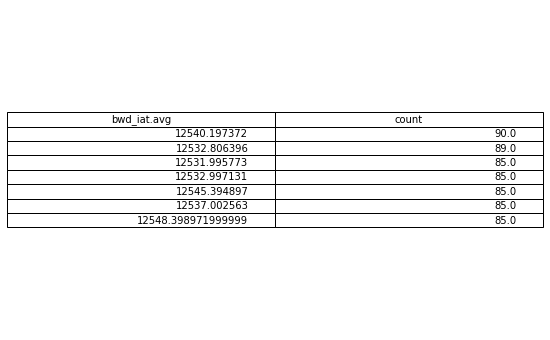

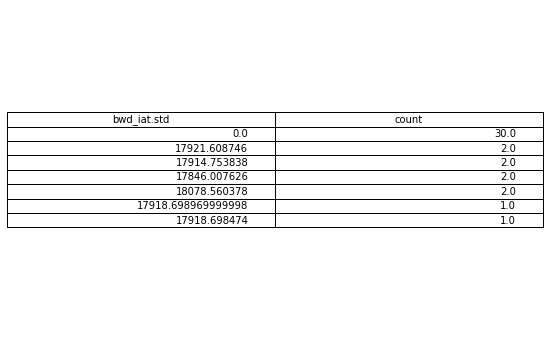

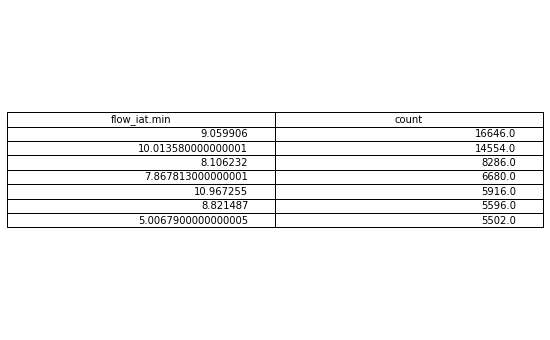

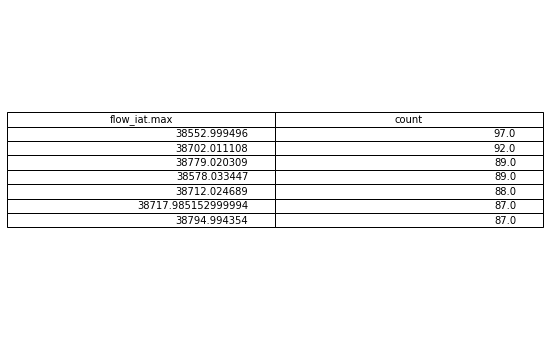

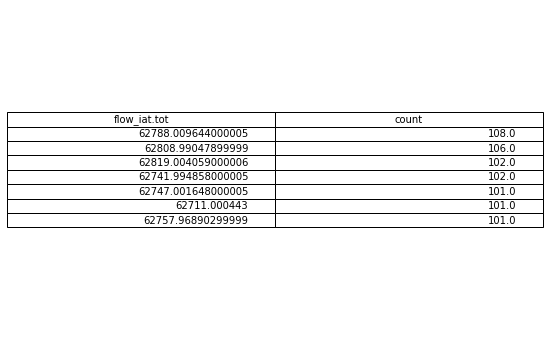

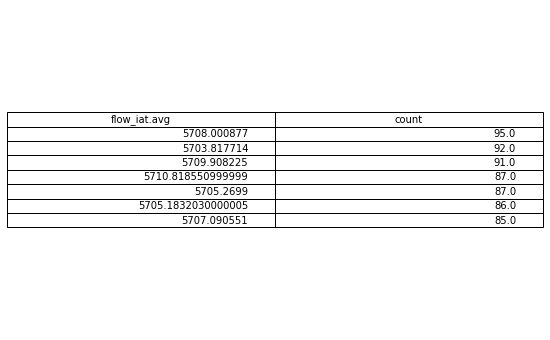

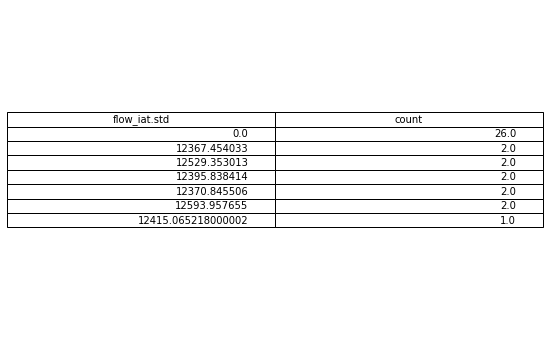

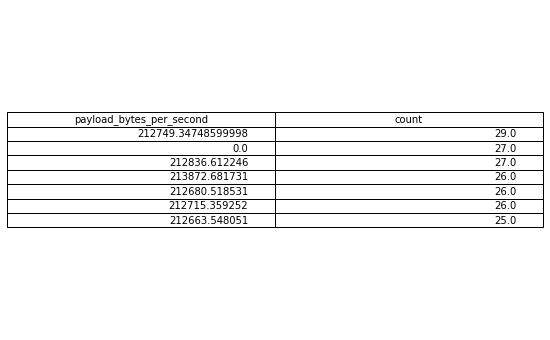

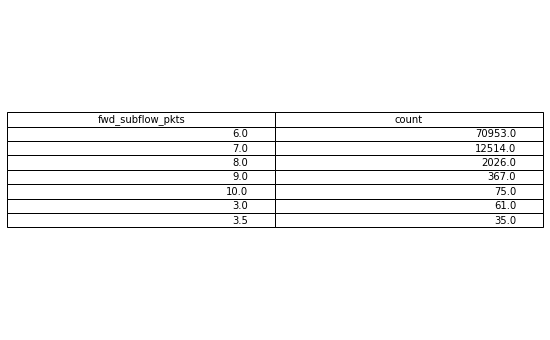

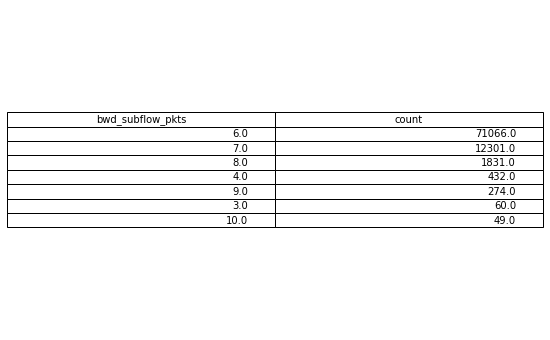

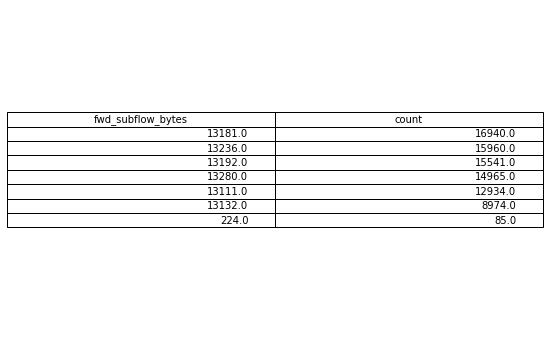

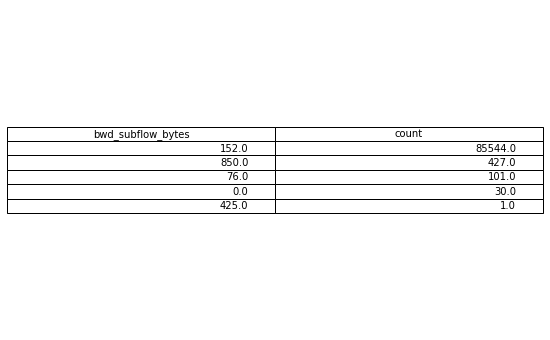

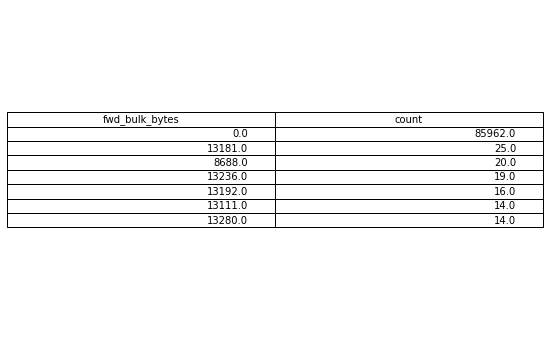

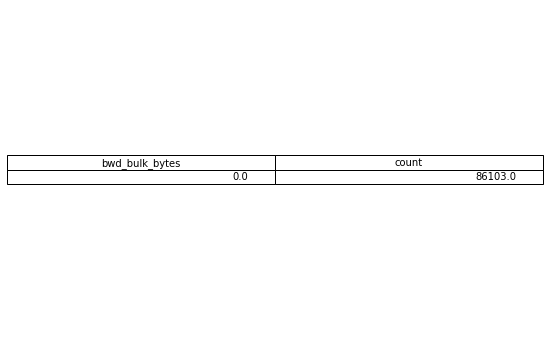

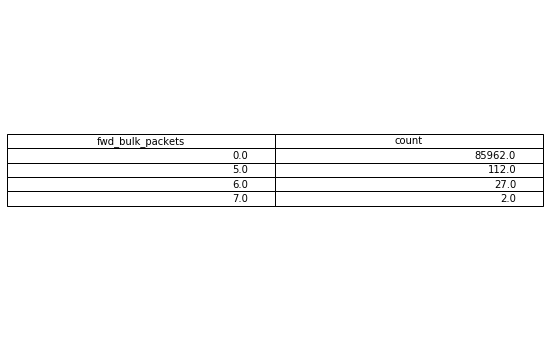

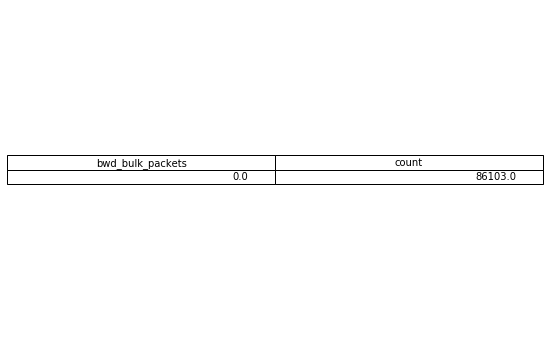

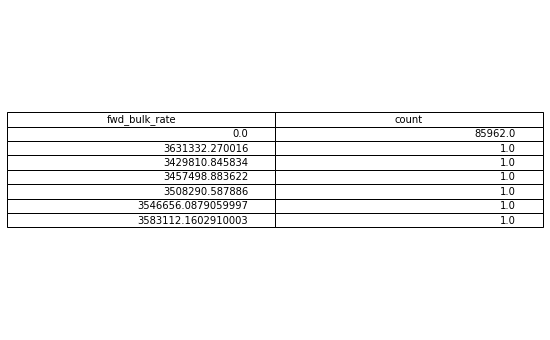

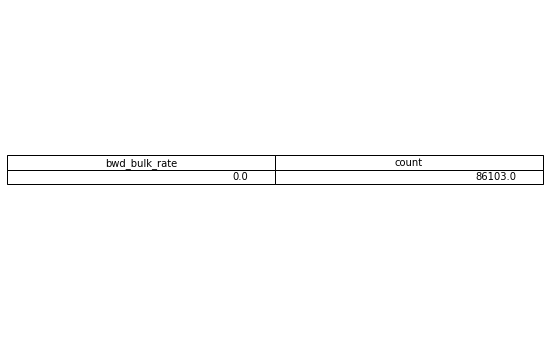

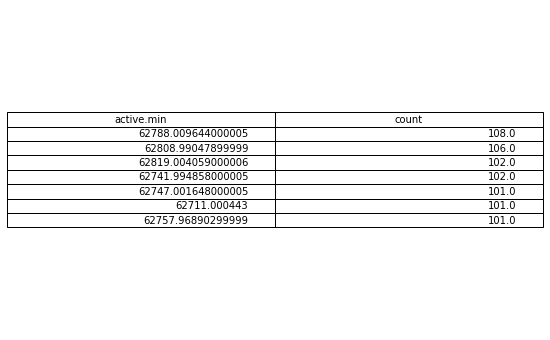

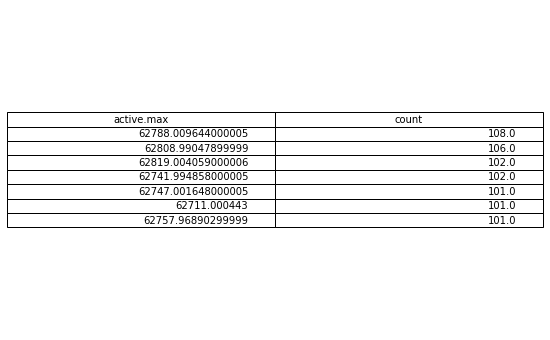

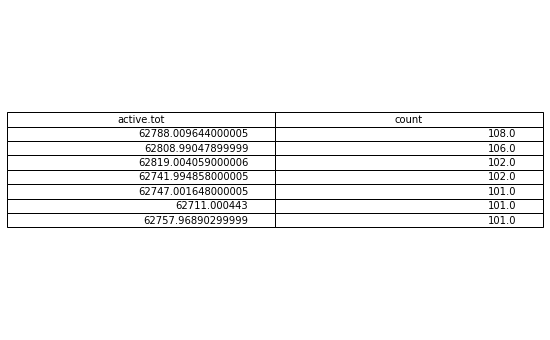

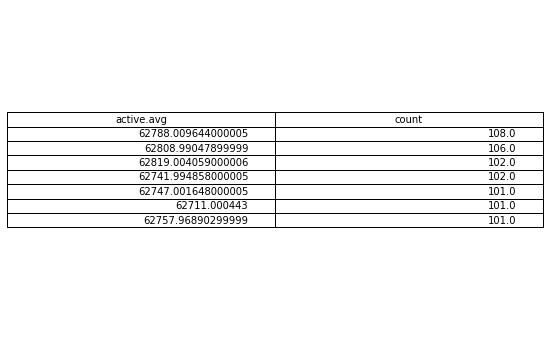

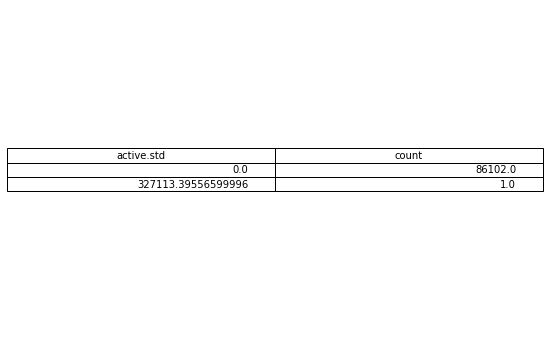

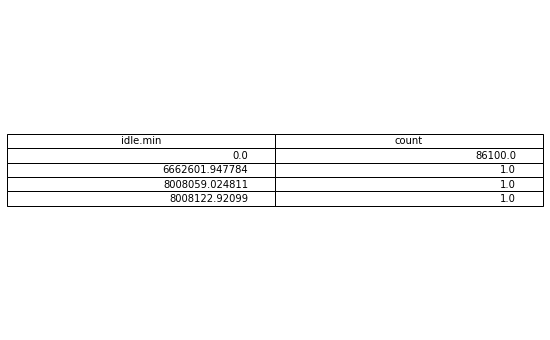

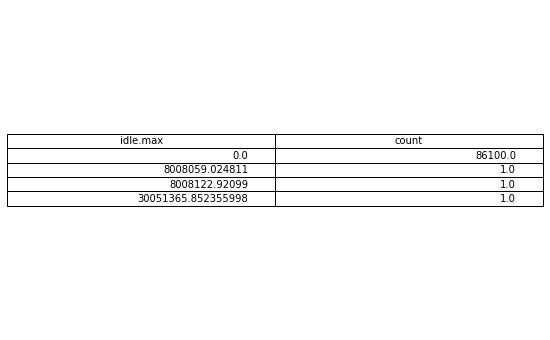

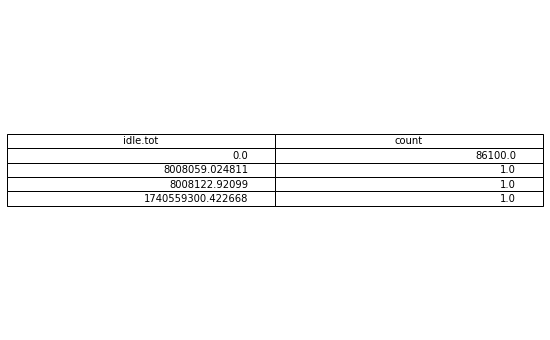

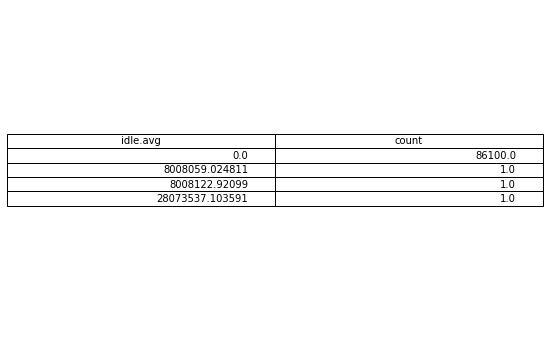

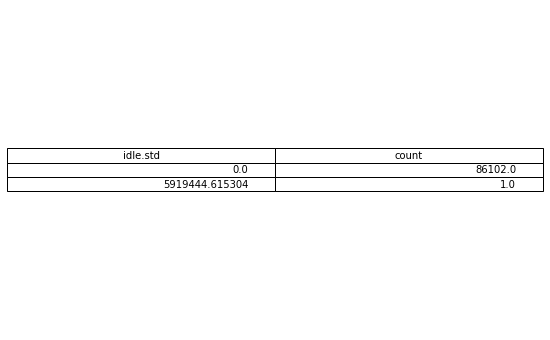

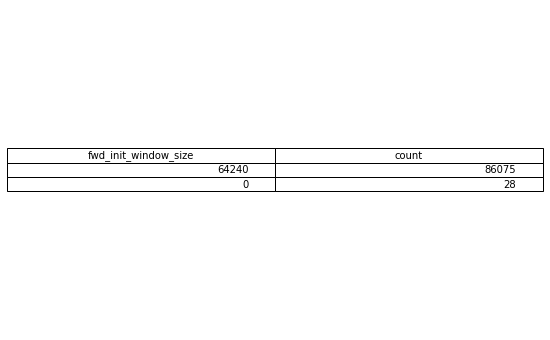

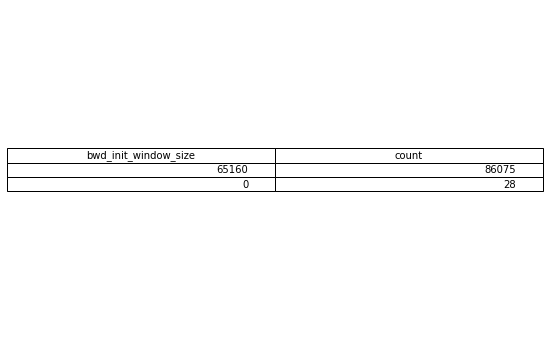

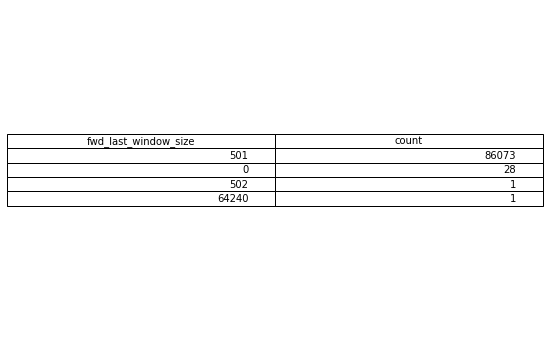

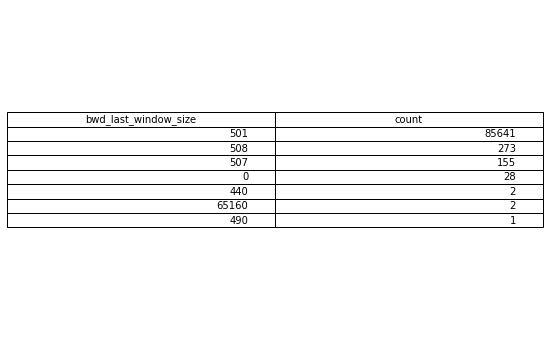

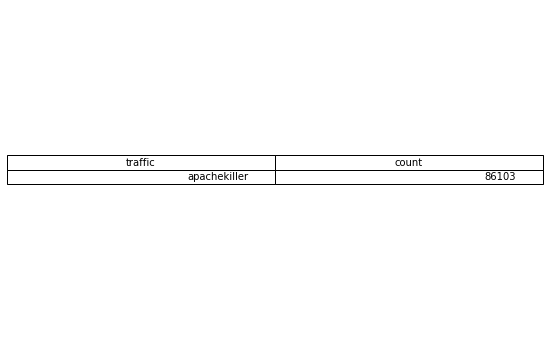

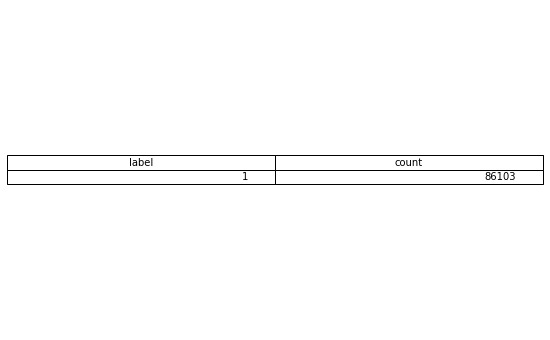

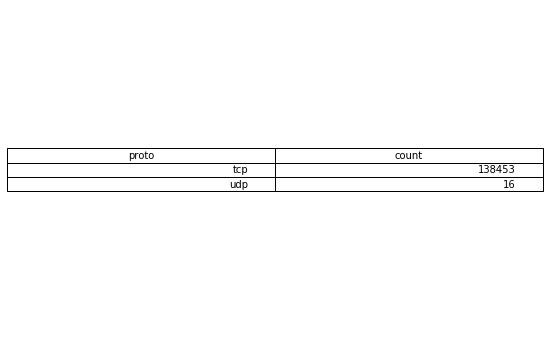

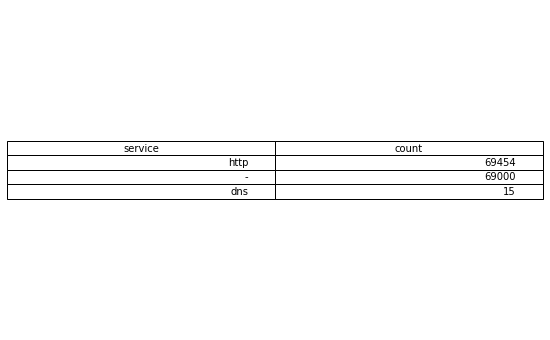

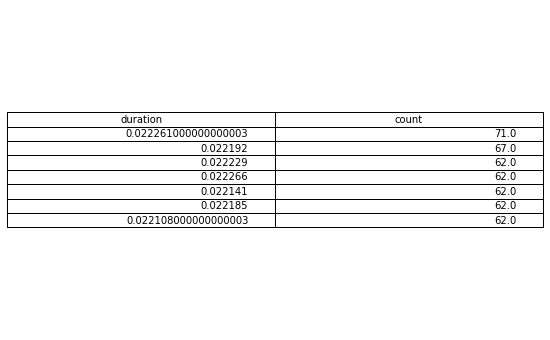

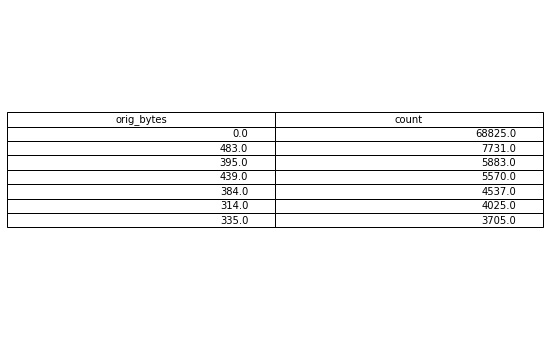

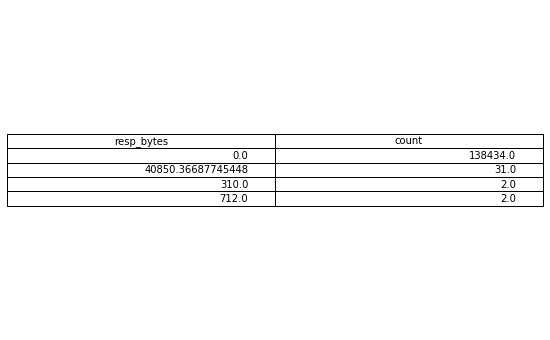

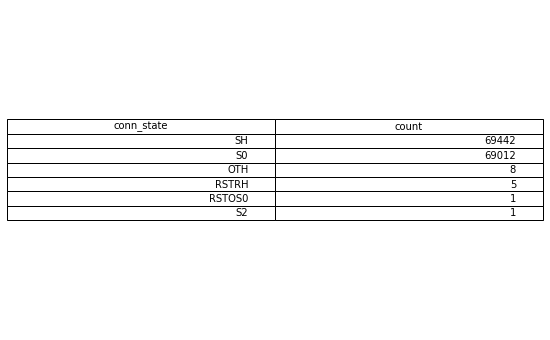

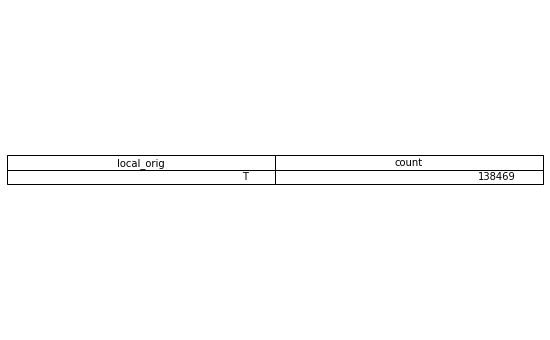

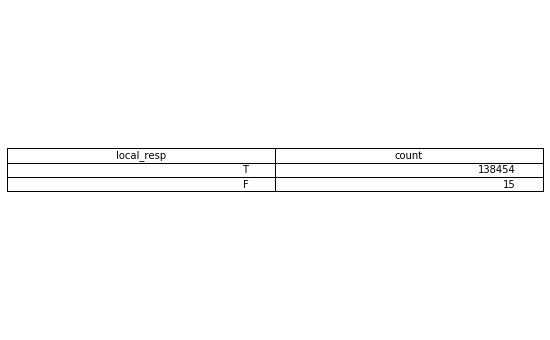

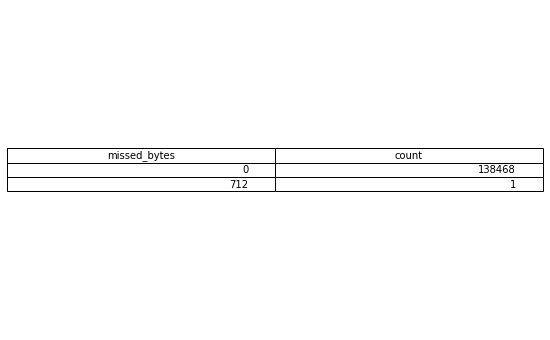

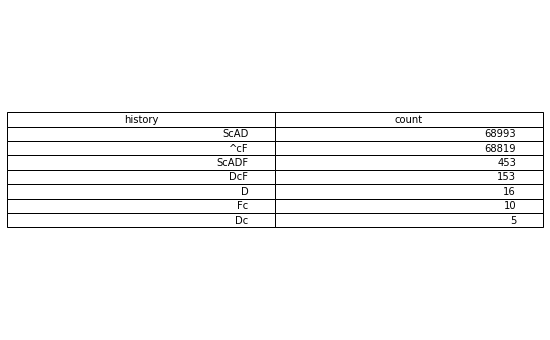

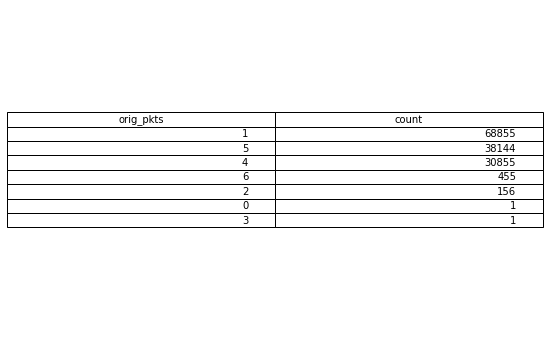

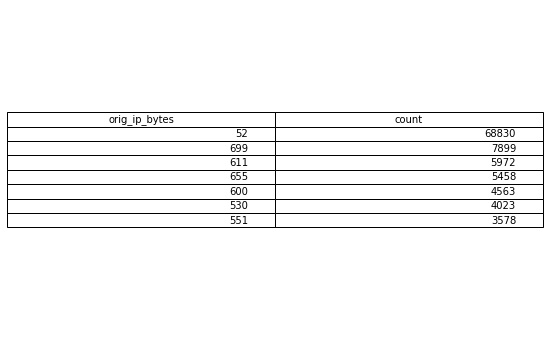

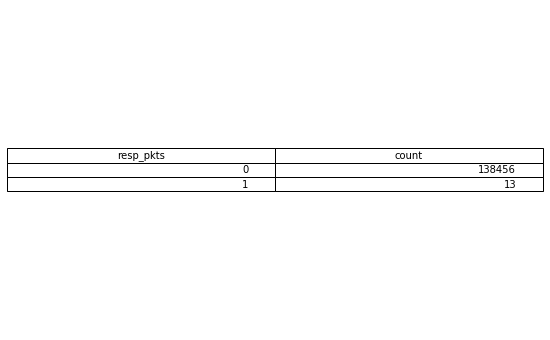

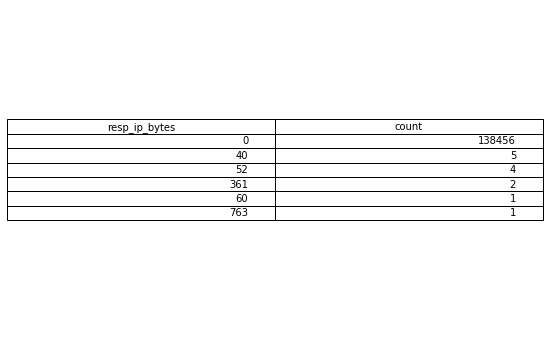

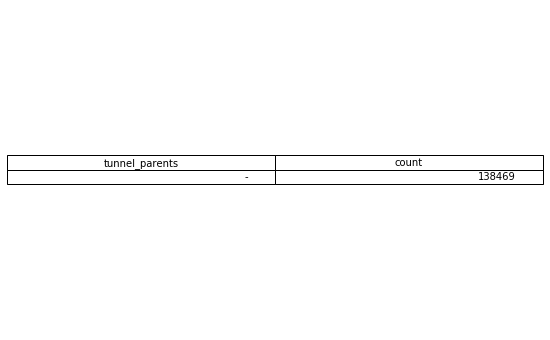

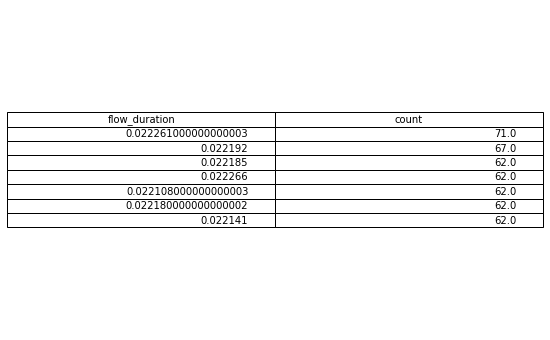

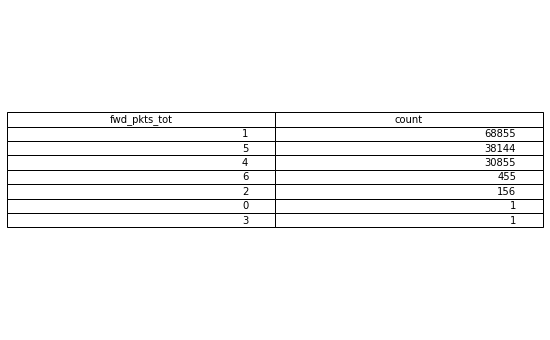

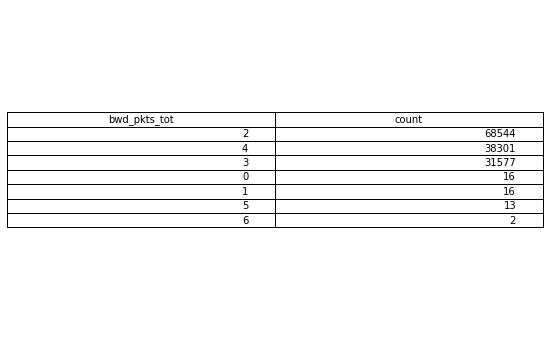

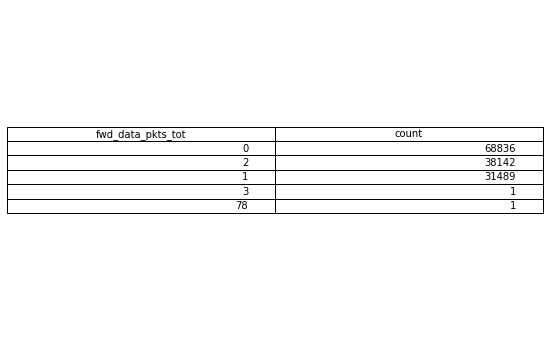

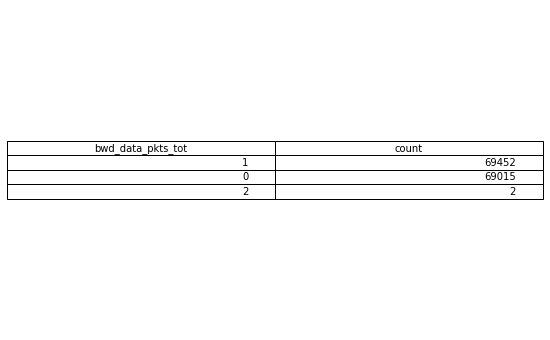

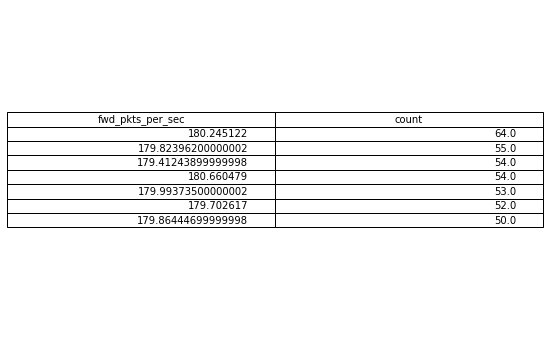

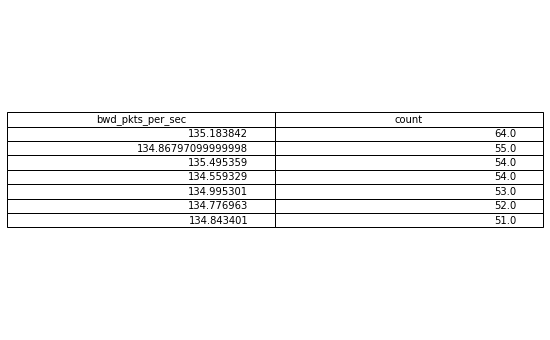

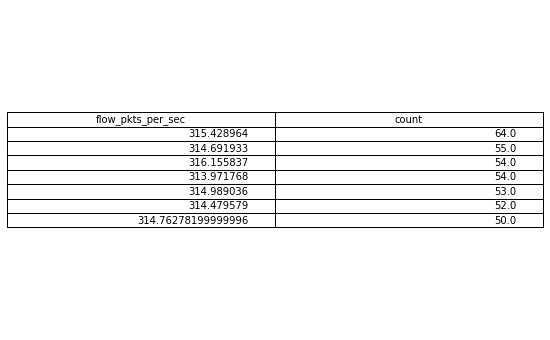

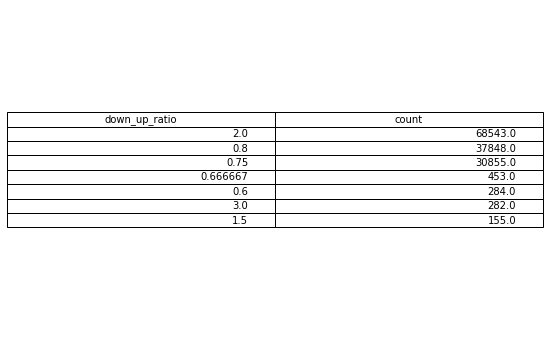

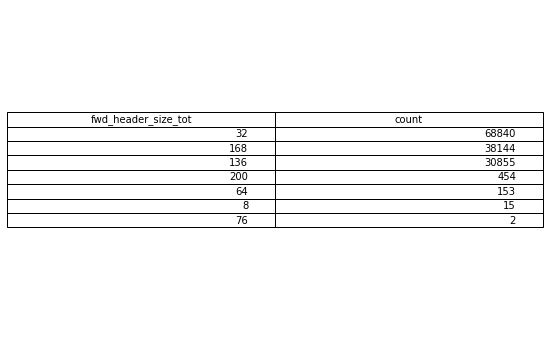

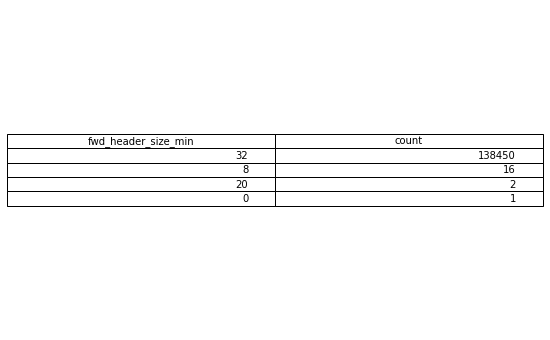

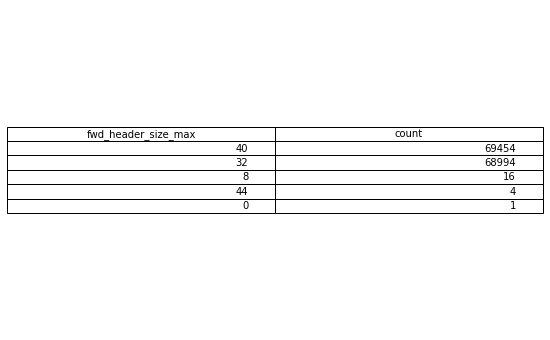

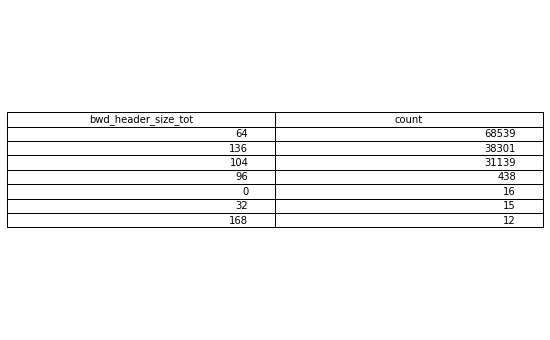

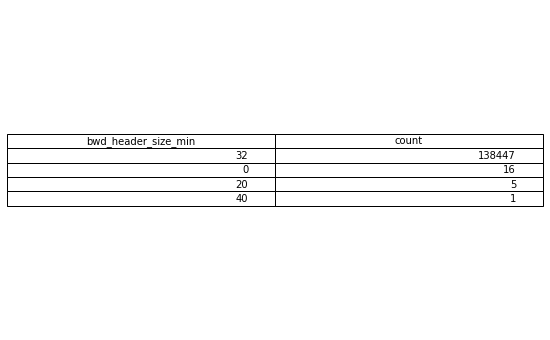

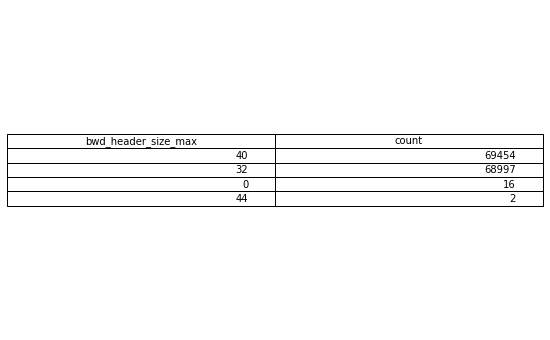

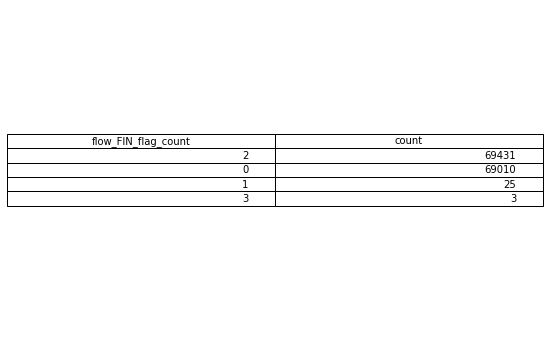

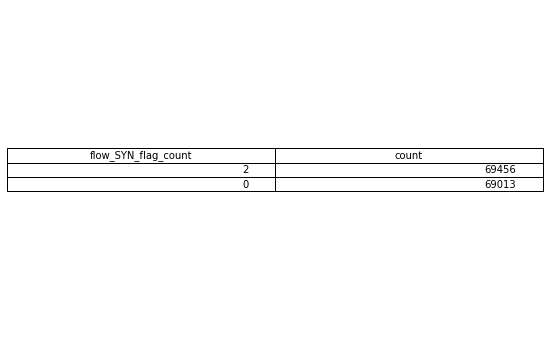

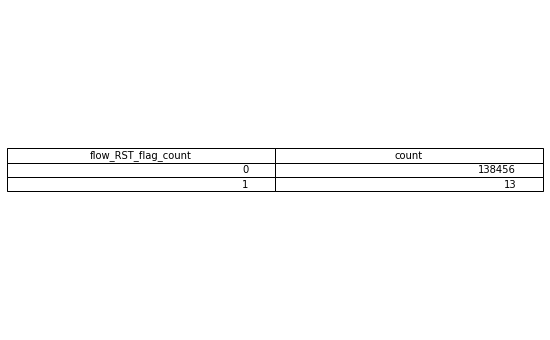

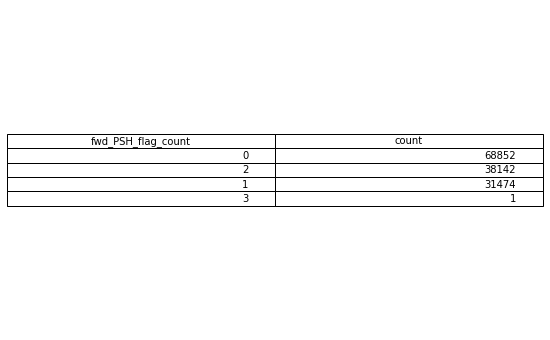

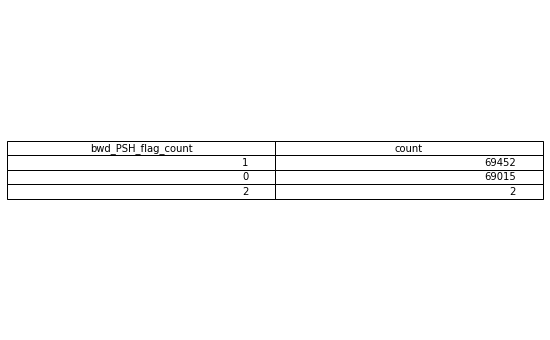

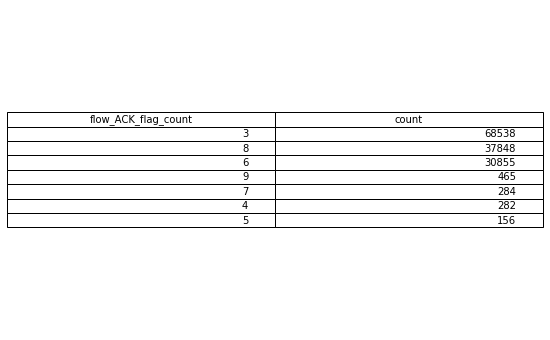

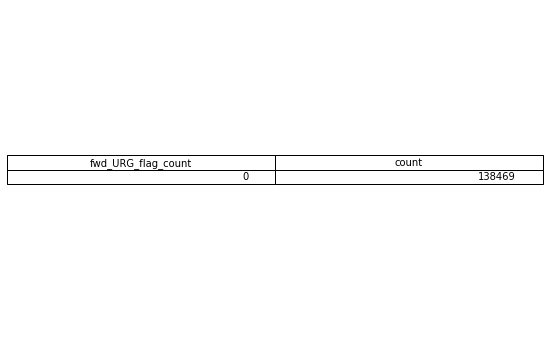

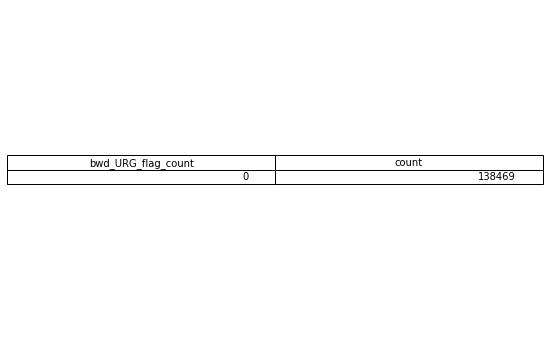

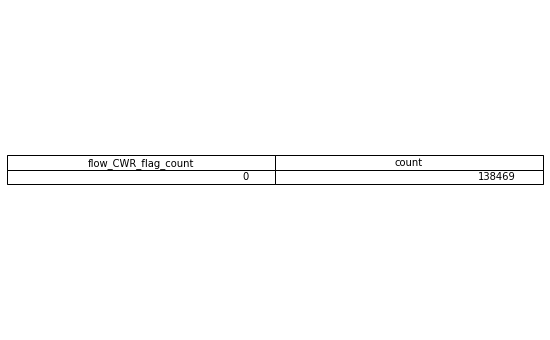

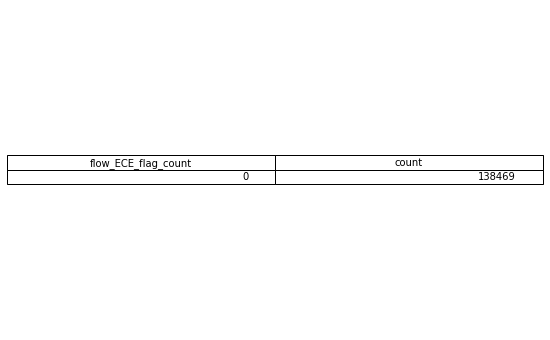

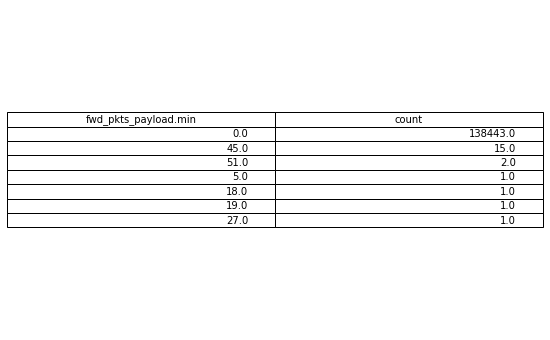

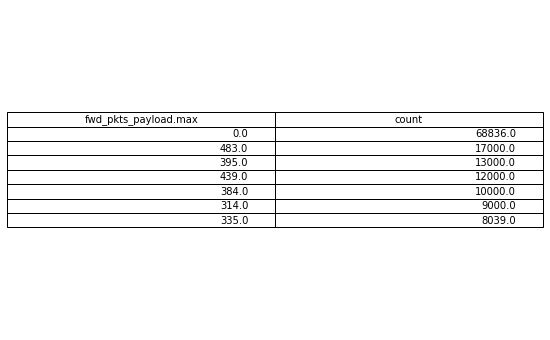

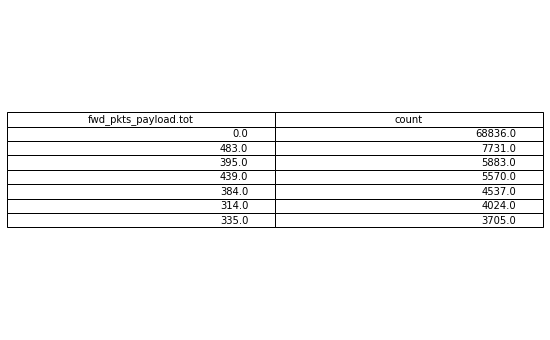

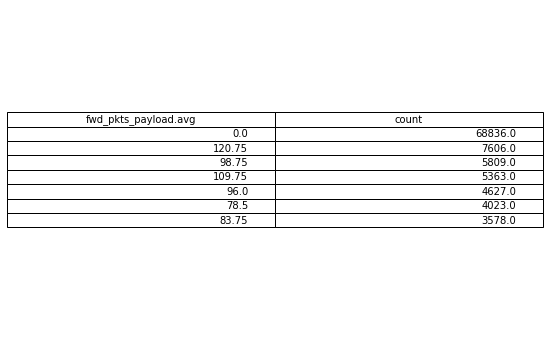

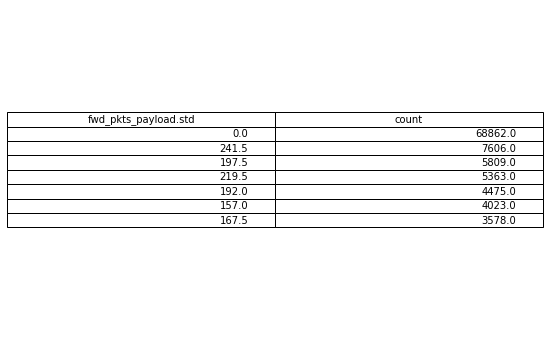

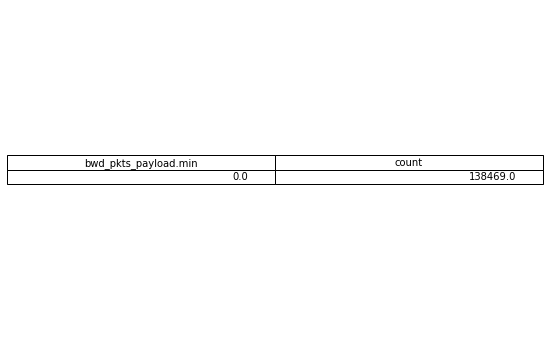

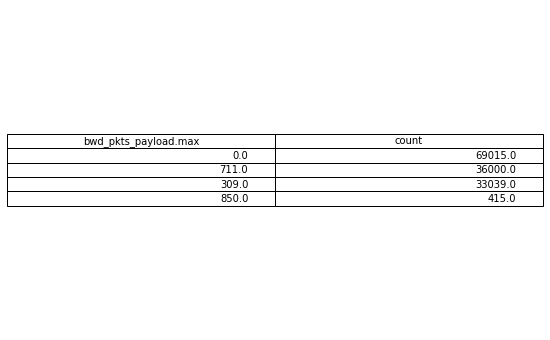

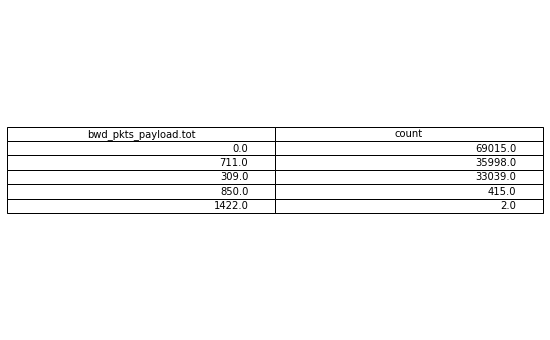

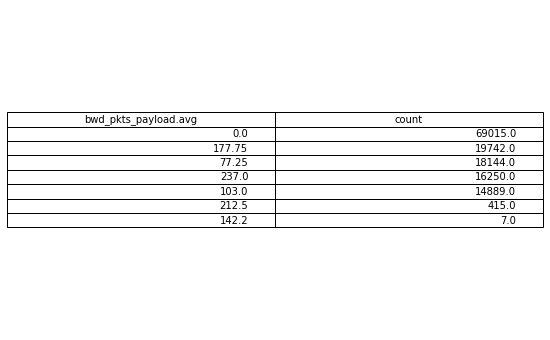

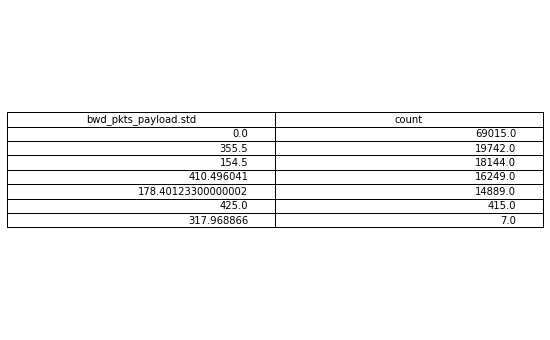

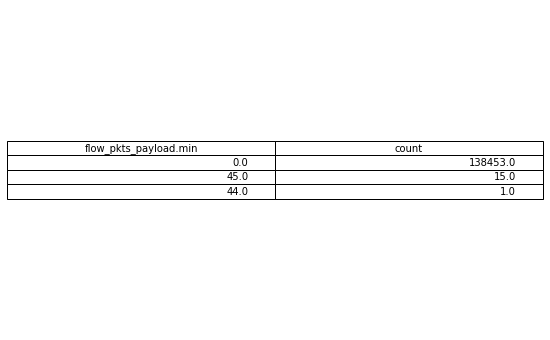

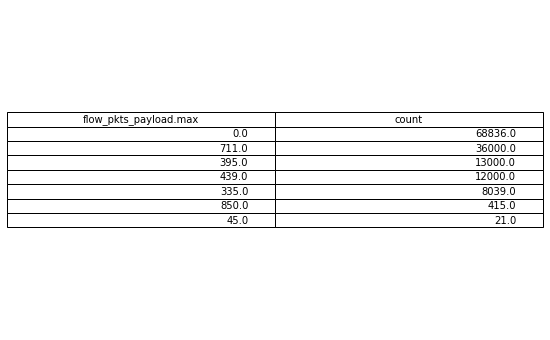

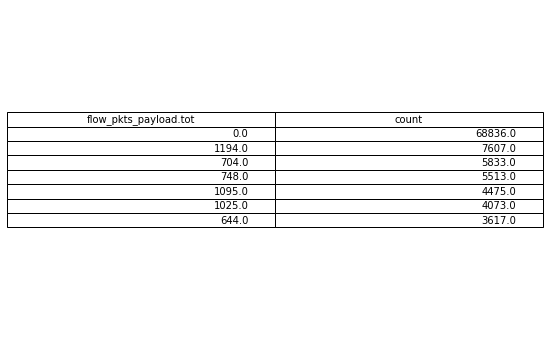

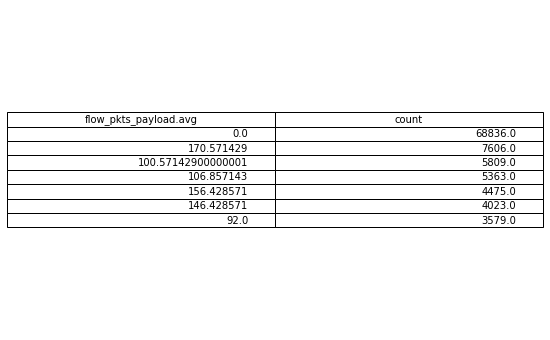

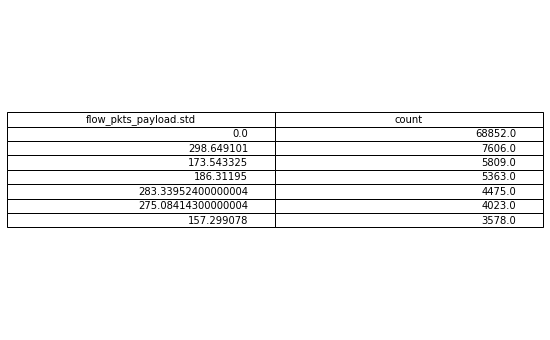

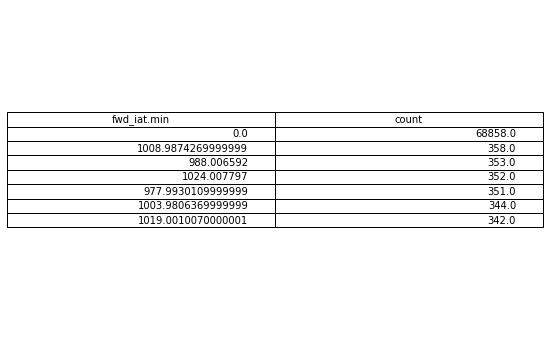

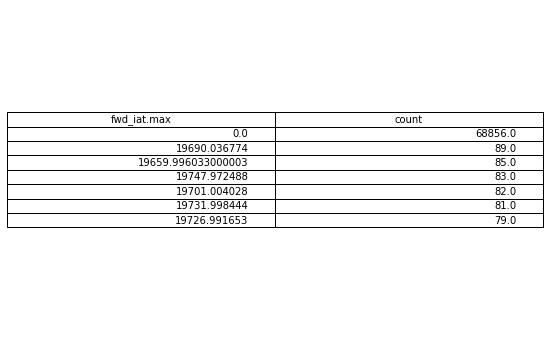

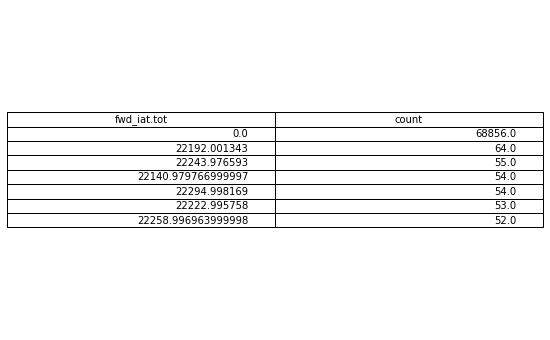

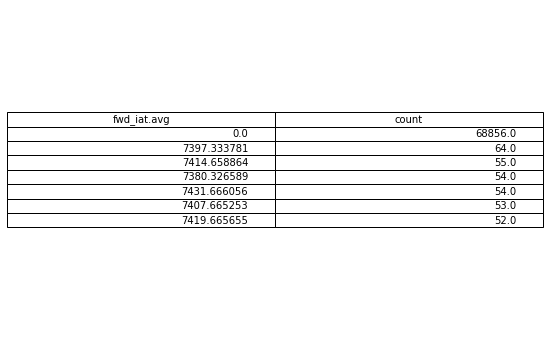

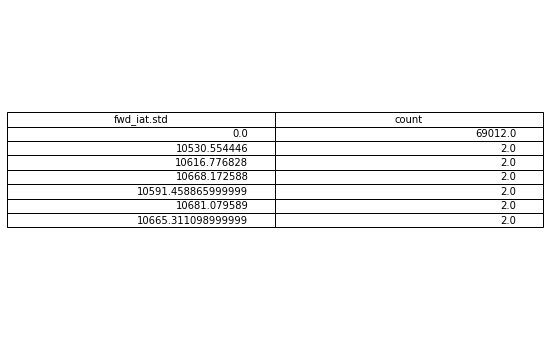

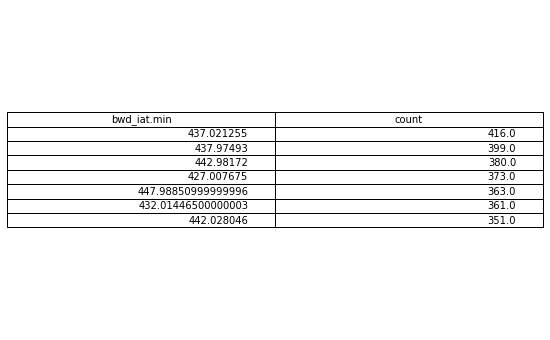

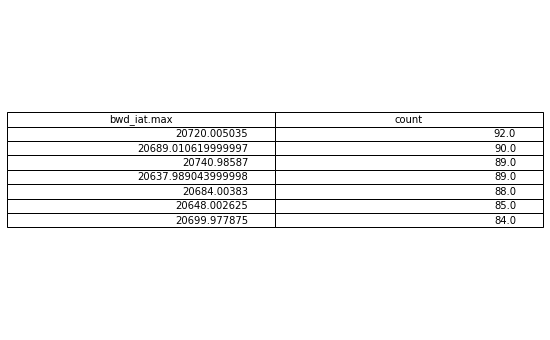

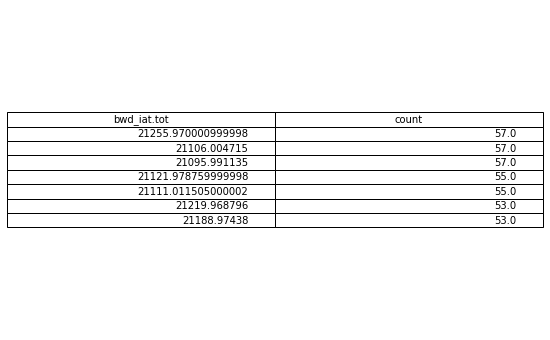

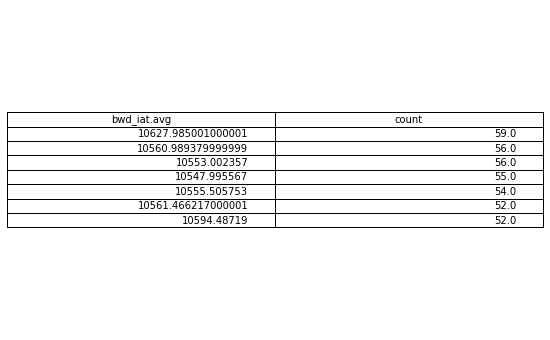

In [7]:
traffics = ['normal','mqttmalaria','arpspoofing','slowread','slowloris','apachekiller','rudeadyet','netscan','camoverflow']

columns_conn = ['proto', 'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'tunnel_parents']
columns_flowmeter = ['flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count', 'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min', 'flow_pkts_payload.max', 'flow_pkts_payload.tot', 'flow_pkts_payload.avg', 'flow_pkts_payload.std', 'fwd_iat.min', 'fwd_iat.max', 'fwd_iat.tot', 'fwd_iat.avg', 'fwd_iat.std', 'bwd_iat.min', 'bwd_iat.max', 'bwd_iat.tot', 'bwd_iat.avg', 'bwd_iat.std', 'flow_iat.min', 'flow_iat.max', 'flow_iat.tot', 'flow_iat.avg', 'flow_iat.std', 'payload_bytes_per_second', 'fwd_subflow_pkts', 'bwd_subflow_pkts', 'fwd_subflow_bytes', 'bwd_subflow_bytes', 'fwd_bulk_bytes', 'bwd_bulk_bytes', 'fwd_bulk_packets', 'bwd_bulk_packets', 'fwd_bulk_rate', 'bwd_bulk_rate', 'active.min', 'active.max', 'active.tot', 'active.avg', 'active.std', 'idle.min', 'idle.max', 'idle.tot', 'idle.avg', 'idle.std', 'fwd_init_window_size', 'bwd_init_window_size', 'fwd_last_window_size', 'bwd_last_window_size', 'traffic', 'label']

for traffic in traffics:
    df_traffic_type = df[df['traffic'] == traffic]

    # Generate and save tables as images
    for column in columns_conn:
        df_table = df_traffic_type.groupby([column])[column].count().reset_index(name='count').sort_values(['count'], ascending=False)
        
        # Create folder if it doesn't exist
        folder_path = os.path.join(column)
        os.makedirs(folder_path, exist_ok=True)
        
        save_table_as_image(df_table, os.path.join(folder_path, f'{traffic}_table.png'))

    for column in columns_flowmeter:
        df_table = df_traffic_type.groupby([column])[column].count().reset_index(name='count').sort_values(['count'], ascending=False)
        
        # Create folder if it doesn't exist
        folder_path = os.path.join(column)
        os.makedirs(folder_path, exist_ok=True)
        
        save_table_as_image(df_table, os.path.join(folder_path, f'{traffic}_table.png'))